In [1]:
import numpy as np
import XNLdyn
import matplotlib.pyplot as plt
import multiprocessing as mp
from multiprocessing import Pool

%matplotlib notebook

In [2]:
import warnings
warnings.filterwarnings('default')

In [3]:

## Set up the problem
PAR = XNLdyn.XNLpars()

N_local_fluences_to_calculate = 30
N_pulse_energies = 20
Nsteps_r = 100

pulse_energy_J = 5e-14# J


PAR.N_photens = 3
PAR.t0_i       = [3, 0,0]   # Arrival time on time-axis / fs
PAR.tdur_sig_i = [1,3,5]  # Rms pulse duration / fs
PAR.E_i_abs    = [848,851.2,858,] # Photon Energies of incident pulses / eV
PAR.lambda_res_Ei = (10,10,10)


PAR.I0_i =  [.4* XNLdyn.photons_per_J(PAR.E_i_abs[0])*pulse_energy_J,
             1*XNLdyn.photons_per_J(PAR.E_i_abs[1])*pulse_energy_J,
             1*XNLdyn.photons_per_J(PAR.E_i_abs[2])*pulse_energy_J]

print(*zip(PAR.E_i_abs,PAR.I0_i))


(848, 147.2054026995463) (851.2, 366.6299973249979) (858, 363.724305038506)


In [4]:
sim = XNLdyn.XNLsim(PAR, DEBUG=True, load_tables = False)

sim.par.I0_i

Starting to generate lookup tables for T between 296.0 to 1740972.7 and mu_chem between -250.0 and 25.0
Lookup tables generated.


[147.2054026995463, 366.6299973249979, 363.724305038506]

In [5]:
tb =  {'size': 400,
                     'chem_pot_minstep': 0.005,
                     'chem_pot_min': -80,
                     'chem_pot_max': 25,
                     'T_max': 1e8} 
N=400
temperatures = np.logspace(0, np.log10(tb['T_max']), N - 1) + 295
fermis_upper = np.logspace(np.log10(tb['chem_pot_minstep']), np.log10(tb['chem_pot_max']), int(N / 2))
fermis_lower = np.logspace(np.log10(tb['chem_pot_minstep']), np.log10(-tb['chem_pot_min']), int(N / 2))
fermis = np.concatenate((-fermis_lower[::-1], fermis_upper[1:]))

<IPython.core.display.Javascript object>


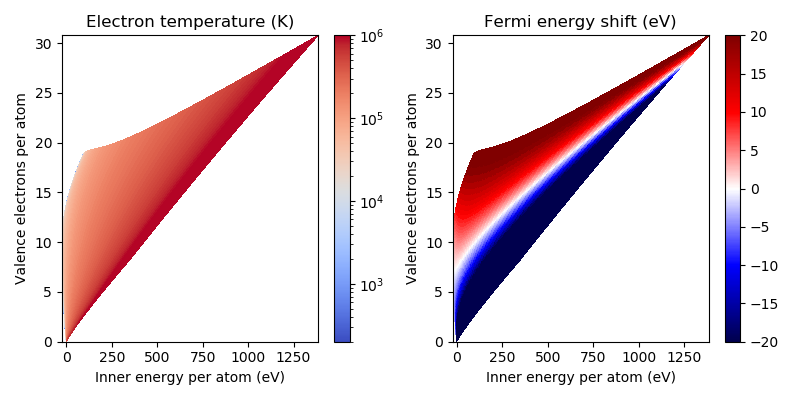

<IPython.core.display.Javascript object>


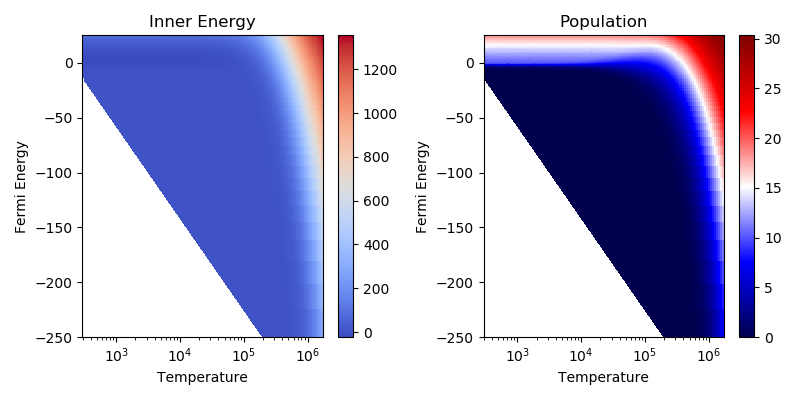

CPU times: user 758 ms, sys: 776 ms, total: 1.53 s
Wall time: 741 ms


In [6]:
%%time

PAR.FermiSolver.plot_lookup_tables()

t:  -25.0
-23.354917792638243 9.99999121602761 -> 307.6811104942512 0.007687527302948638
Photons impinging per atom this timestep:  [3.35271710e-169 4.05832942e-014 1.08151204e-004] i.e.  [3.66818063e-171 4.44018536e-016 1.18327357e-006] /atom
t:  574.9987096881351
-23.35439079302387 10.000058475647194 -> 679.1845812610269 0.12816849689008336
Photons impinging per atom this timestep:  [0. 0. 0.] i.e.  [0. 0. 0.] /atom
Deviation from energy conservation (%):  inf
t:  -24.970898768743904
-23.354917767077627 9.999991219289846 -> 305.96780518181305 0.005938772257451319
Photons impinging per atom this timestep:  [7.56991717e-169 4.39980895e-014 1.11342895e-004] i.e.  [8.28218509e-171 4.81379535e-016 1.21819360e-006] /atom
Deviation from energy conservation (%):  inf
t:  -24.956348153115854
-23.35491775326007 9.999991220978005 -> 305.96780518181305 0.005938772257451319
Photons impinging per atom this timestep:  [1.13710433e-168 4.58101544e-014 1.12972455e-004] i.e.  [1.24409664e-170 5.012051

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:684: UserWarning: Correcting a significant non-zero sum in thermalization
  warnings.warn('Correcting a significant non-zero sum in thermalization')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:798: RuntimeWarning: divide by zero encountered in double_scalars
  ec_error = np.abs(is_new_energy - should_be_new_energy)[check_z_index] / energy_incoming[check_z_index]


 [1.24324289e-167 5.80730445e-014 1.23043078e-004] i.e.  [1.36022198e-169 6.35372478e-016 1.34620436e-006] /atom
t:  -24.854493843719517
-23.35491762201938 9.999991232965442 -> 311.95244740201366 0.01181961520669006
Photons impinging per atom this timestep:  [1.95069801e-167 6.07255208e-014 1.25037414e-004] i.e.  [2.13424290e-169 6.64393007e-016 1.36802422e-006] /atom
t:  -24.854493843719517
-23.354917647586234 9.999991232992409 -> 305.96780518181305 0.005938772257451319
Photons impinging per atom this timestep:  [1.95069801e-167 6.07255208e-014 1.25037414e-004] i.e.  [2.13424290e-169 6.64393007e-016 1.36802422e-006] /atom
t:  -24.781983891832976
-23.354917565277603 9.999991241790957 -> 367.37823682759847 0.06604957168221404
Photons impinging per atom this timestep:  [1.46624004e-166 7.41667693e-014 1.34369810e-004] i.e.  [1.60420136e-168 8.11452618e-016 1.47012922e-006] /atom
t:  -24.745728915889703
-23.35491750109784 9.999991246625155 -> 367.37823682759847 0.06604957168221404
Photons

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -9.032e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -6.306e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


 [3.29850728e-146 7.57646071e-012 7.10614768e-004] i.e.  [3.60887011e-148 8.28934433e-014 7.77477865e-006] /atom
t:  -22.470998069571245
-23.354893989854972 9.999992007680786 -> 467.91527307922433 0.11067512111517885
Photons impinging per atom this timestep:  [7.75960992e-140 3.19854640e-011 1.19346391e-003] i.e.  [8.48972639e-142 3.49950372e-013 1.30575920e-005] /atom
t:  -22.36973263857151
-23.354894172761046 9.999992030745478 -> 467.91527307922433 0.11067512111517885
Photons impinging per atom this timestep:  [1.01812849e-138 4.11633831e-011 1.30692395e-003] i.e.  [1.11392614e-140 4.50365241e-013 1.42989491e-005] /atom
t:  -22.24315084982184
-23.35488912862324 9.999992143468859 -> 480.9311410566562 0.11344199862196547
Photons impinging per atom this timestep:  [2.50606978e-137 5.63330414e-011 1.46319122e-003] i.e.  [2.74187066e-139 6.16335246e-013 1.60086566e-005] /atom
t:  -22.24315084982184
-23.35488348674026 9.999992226929885 -> 480.9311410566562 0.11344199862196547
Photons impin

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:884: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -3.101e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.403e-04 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 4.817e-05 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -5.600133007555019e-05
  warnings.warn(f'negative electron hole density found down t

Photons impinging per atom this timestep:  [1.26752877e-147 5.49893014e-012 6.33178977e-004] i.e.  [1.38679297e-149 6.01633494e-014 6.92755992e-006] /atom
t:  -22.803933571458565
-23.354896482463417 9.999991804213774 -> 467.91527307922433 0.11067512111517885
Photons impinging per atom this timestep:  [1.52358299e-143 1.38440778e-011 8.82838745e-004] i.e.  [1.66693982e-145 1.51466934e-013 9.65906724e-006] /atom
t:  -22.739660974001865
-23.35488571264818 9.999991829339391 -> 480.9311410566562 0.11344199862196547
Photons impinging per atom this timestep:  [7.98436413e-143 1.62888374e-011 9.36066635e-004] i.e.  [8.73562815e-145 1.78214851e-013 1.02414293e-005] /atom
t:  -22.65932022718099
-23.354883573674012 9.99999188093648 -> 480.9311410566562 0.11344199862196547
Photons impinging per atom this timestep:  [6.29412287e-142 1.99476775e-011 1.00690286e-003] i.e.  [6.88634887e-144 2.18245925e-013 1.10164427e-005] /atom
t:  -22.65932022718099
-23.354896512172747 9.999991899480536 -> 467.91527

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -2.609e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.633e-04 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 6.019e-05 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -6.757366135690113e-05
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.691e-04 under minimum of -1e-05.Valen

 [1.80562148e-140 2.77250965e-011 1.13360209e-003] i.e.  [1.97551585e-142 3.03338036e-013 1.24026487e-005] /atom
t:  -22.30960370937477
-23.354885806233913 9.999992164256437 -> 480.9311410566562 0.11344199862196547
Photons impinging per atom this timestep:  [4.67212148e-138 4.77892275e-011 1.37906627e-003] i.e.  [5.11173028e-140 5.22858069e-013 1.50882524e-005] /atom
t:  -22.27074631850741
-23.354885094231662 9.999992194098873 -> 480.9311410566562 0.11344199862196547
Photons impinging per atom this timestep:  [1.24824476e-137 5.26169235e-011 1.42768204e-003] i.e.  [1.36569448e-139 5.75677500e-013 1.56201536e-005] /atom
t:  -22.222174579923212
-23.354882782799223 9.99999223970805 -> 480.9311410566562 0.11344199862196547
Photons impinging per atom this timestep:  [4.25460891e-137 5.93290363e-011 1.49074225e-003] i.e.  [4.65493317e-139 6.49114183e-013 1.63100902e-005] /atom
t:  -22.222174579923212
-23.35488191063395 9.999992246688198 -> 480.9311410566562 0.11344199862196547
Photons imping

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -3.890e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 3.415e-06 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -1.2914410986719638e-05
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -3.364e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 1.066e-06 over maximum of 1.00001.Valence oc

-23.354865029318567 9.999992618430102 -> 509.97585944979687 0.1206183377937009
Photons impinging per atom this timestep:  [2.02104551e-133 1.35791500e-010 2.00844741e-003] i.e.  [2.21120953e-135 1.48568381e-012 2.19742605e-005] /atom
t:  -21.754287006617712
-23.354860347265685 9.999992791071485 -> 509.97585944979687 0.1206183377937009
Photons impinging per atom this timestep:  [5.08736517e-132 1.86086602e-010 2.24969566e-003] i.e.  [5.56604504e-134 2.03595844e-012 2.46137381e-005] /atom
t:  -21.73118144744213
-23.35486536712294 9.999992822143081 -> 509.97585944979687 0.1206183377937009
Photons impinging per atom this timestep:  [9.01107844e-132 1.96769294e-010 2.29536086e-003] i.e.  [9.85894796e-134 2.15283692e-012 2.51133573e-005] /atom
t:  -21.702299498472655
-23.354863598322257 9.999992864300713 -> 509.97585944979687 0.1206183377937009
Photons impinging per atom this timestep:  [1.83994798e-131 2.10971543e-010 2.35367736e-003] i.e.  [2.01307219e-133 2.30822257e-012 2.57513935e-005] 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -6.392e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 1.514e-05 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -2.4204987580156434e-05
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -5.478e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 1.107e-05 over maximum of 1.00001.Valence oc

-23.354858811241254 9.99999277453232 -> 509.97585944979687 0.1206183377937009
Photons impinging per atom this timestep:  [3.74164163e-132 1.80586697e-010 2.22552873e-003] i.e.  [4.09369982e-134 1.97578443e-012 2.43493297e-005] /atom
t:  -21.691486947417147
-23.354854398208804 9.99999288259311 -> 526.1577579539078 0.1206183377937009
Photons impinging per atom this timestep:  [2.40313400e-131 2.16543139e-010 2.37586811e-003] i.e.  [2.62924946e-133 2.36918096e-012 2.59941806e-005] /atom
t:  -21.67811657251439
-23.354854521741395 9.999992902175162 -> 509.97585944979687 0.1206183377937009
Photons impinging per atom this timestep:  [3.34283341e-131 2.23632631e-010 2.40358230e-003] i.e.  [3.65736697e-133 2.44674651e-012 2.62973993e-005] /atom
t:  -21.661403603885947
-23.354851760063912 9.999992927485659 -> 526.1577579539078 0.1206183377937009
Photons impinging per atom this timestep:  [5.04866424e-131 2.32815277e-010 2.43865556e-003] i.e.  [5.52370267e-133 2.54721309e-012 2.66811331e-005] /at

-23.35481904762367 9.999993579054253 -> 543.557718113751 0.1206183377937009
Photons impinging per atom this timestep:  [3.91859240e-127 5.57516089e-010 3.33948117e-003] i.e.  [4.28730022e-129 6.09973839e-012 3.65369932e-005] /atom
t:  -21.214796037446867
-23.354810622962045 9.999993750699161 -> 543.557718113751 0.1206183377937009
Photons impinging per atom this timestep:  [2.77441115e-126 6.74565994e-010 3.57663921e-003] i.e.  [3.03546077e-128 7.38037193e-012 3.91317200e-005] /atom
t:  -21.200450096472217
-23.354809075232314 9.99999378179109 -> 543.557718113751 0.1206183377937009
Photons impinging per atom this timestep:  [3.92638697e-126 6.97759386e-010 3.62043189e-003] i.e.  [4.29582819e-128 7.63412895e-012 3.96108522e-005] /atom
t:  -21.1825176702539
-23.354807214712032 9.999993822118329 -> 543.557718113751 0.1206183377937009
Photons impinging per atom this timestep:  [6.05892055e-126 7.27852329e-010 3.67588498e-003] i.e.  [6.62901592e-128 7.96337340e-012 4.02175599e-005] /atom
t:  

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -5.779e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


-23.354800949853935 9.99999393479319 -> 562.2674270624372 0.1206183377937009
Photons impinging per atom this timestep:  [1.95156714e-125 8.15600071e-010 3.82964172e-003] i.e.  [2.13519381e-127 8.92341435e-012 4.18998000e-005] /atom
t:  -21.05340420148203
-23.35479551021874 9.999994130659486 -> 562.2674270624372 0.1206183377937009
Photons impinging per atom this timestep:  [1.36385475e-124 9.85407443e-010 4.09947305e-003] i.e.  [1.49218244e-126 1.07812631e-011 4.48520027e-005] /atom
t:  -21.03905826050738
-23.354806205166657 9.999994166132455 -> 543.557718113751 0.1206183377937009
Photons impinging per atom this timestep:  [1.92568333e-124 1.01902621e-009 4.14928305e-003] i.e.  [2.10687454e-126 1.11490833e-011 4.53969699e-005] /atom
t:  -21.021125834289066
-23.354801766389656 9.99999421213335 -> 562.2674270624372 0.1206183377937009
Photons impinging per atom this timestep:  [2.96298953e-124 1.06263297e-009 4.21234872e-003] i.e.  [3.24178285e-126 1.16261813e-011 4.60869663e-005] /atom
t:

-23.354784730638144 9.999994222470622 -> 562.2674270624372 0.1206183377937009
Photons impinging per atom this timestep:  [3.23670061e-124 1.07180152e-009 4.22539687e-003] i.e.  [3.54124794e-126 1.17264936e-011 4.62297250e-005] /atom
t:  -21.009705677789636
-23.354783671693763 9.999994242817367 -> 562.2674270624372 0.1206183377937009
Photons impinging per atom this timestep:  [3.89798027e-124 1.09135098e-009 4.25298189e-003] i.e.  [4.26474866e-126 1.19403827e-011 4.65315305e-005] /atom
t:  -20.970997562451693
-23.354778371957735 9.99999434515581 -> 562.2674270624372 0.1206183377937009
Photons impinging per atom this timestep:  [9.86585531e-124 1.19445952e-009 4.39347390e-003] i.e.  [1.07941524e-125 1.30684849e-011 4.80686422e-005] /atom
t:  -20.96411611972495
-23.354777423586786 9.999994363600933 -> 562.2674270624372 0.1206183377937009
Photons impinging per atom this timestep:  [1.16349233e-123 1.21376329e-009 4.41890407e-003] i.e.  [1.27296754e-125 1.32796859e-011 4.83468716e-005] /ato

-23.35472860646193 9.99999522702096 -> 582.3854737991792 0.1206183377937009
Photons impinging per atom this timestep:  [1.02245809e-120 2.34443911e-009 5.60067483e-003] i.e.  [1.11866312e-122 2.56503185e-011 6.12765299e-005] /atom
t:  -20.66618646205488
-23.35472621531459 9.999995273695927 -> 582.3854737991792 0.1206183377937009
Photons impinging per atom this timestep:  [1.40341802e-120 2.41760116e-009 5.66297715e-003] i.e.  [1.53546830e-122 2.64507785e-011 6.19581745e-005] /atom
t:  -20.59929533107991
-23.354714212491082 9.999995509328977 -> 604.0178681629055 0.1206183377937009
Photons impinging per atom this timestep:  [6.81912710e-120 2.81827642e-009 5.98439739e-003] i.e.  [7.46075176e-122 3.08345341e-011 6.54748074e-005] /atom
t:  -20.58740357446214
-23.354714385822067 9.999995551965366 -> 604.0178681629055 0.1206183377937009
Photons impinging per atom this timestep:  [9.02770193e-120 2.89601490e-009 6.04330647e-003] i.e.  [9.87713559e-122 3.16850646e-011 6.61193268e-005] /atom
t:

-23.354646257771652 9.999996649068361 -> 627.2785998294014 0.1236337955640181
Photons impinging per atom this timestep:  [4.95856233e-117 5.33679468e-009 7.53090748e-003] i.e.  [5.42512289e-119 5.83894385e-011 8.23950490e-005] /atom
t:  -20.31242161785431
-23.354643944242028 9.99999667650077 -> 627.2785998294014 0.1236337955640181
Photons impinging per atom this timestep:  [5.70216206e-117 5.40948050e-009 7.56767261e-003] i.e.  [6.23868934e-119 5.91846882e-011 8.27972933e-005] /atom
t:  -20.282456560849074
-23.35463876020902 9.99999681427974 -> 627.2785998294014 0.1236337955640181
Photons impinging per atom this timestep:  [1.14610520e-116 5.78768502e-009 7.75404100e-003] i.e.  [1.25394442e-118 6.33225932e-011 8.48363348e-005] /atom
t:  -20.277129439603698
-23.354645516151265 9.999996839045796 -> 627.2785998294014 0.1236337955640181
Photons impinging per atom this timestep:  [1.29742780e-116 5.85757705e-009 7.78762117e-003] i.e.  [1.41950525e-118 6.40872762e-011 8.52037328e-005] /atom


-23.354625314236163 9.999996965747524 -> 627.2785998294014 0.1236337955640181
Photons impinging per atom this timestep:  [2.42238588e-116 6.22245269e-009 7.95889016e-003] i.e.  [2.65031278e-118 6.80793511e-011 8.70775729e-005] /atom
t:  -20.24569971685416
-23.35462395415909 9.999996987854471 -> 627.2785998294014 0.1236337955640181
Photons impinging per atom this timestep:  [2.69522988e-116 6.28705516e-009 7.98853884e-003] i.e.  [2.94882919e-118 6.87861615e-011 8.74019567e-005] /atom
t:  -20.222744932241596
-23.354617155847816 9.999997098772834 -> 627.2785998294014 0.1236337955640181
Photons impinging per atom this timestep:  [4.59431683e-116 6.62003599e-009 8.13834432e-003] i.e.  [5.02660485e-118 7.24292778e-011 8.90409663e-005] /atom
t:  -20.218664081643805
-23.354615946695116 9.999997118668439 -> 627.2785998294014 0.1236337955640181
Photons impinging per atom this timestep:  [5.05096995e-116 6.68101176e-009 8.16525099e-003] i.e.  [5.52622533e-118 7.30964087e-011 8.93353500e-005] /ato

-23.354526793439213 9.999998733411426 -> 639.5692324088456 0.12353956250944975
Photons impinging per atom this timestep:  [4.46074955e-113 1.28711015e-008 1.03392251e-002] i.e.  [4.88046997e-115 1.40821679e-010 1.13120625e-004] /atom
t:  -19.912470343426968
-23.354522632602308 9.999998809997592 -> 639.5692324088456 0.12353956250944975
Photons impinging per atom this timestep:  [5.89649004e-113 1.32226420e-008 1.04400096e-002] i.e.  [6.45130201e-115 1.44667856e-010 1.14223300e-004] /atom
t:  -19.851593814382422
-23.354501771713043 9.999999196186918 -> 652.2902388307818 0.1236337955640181
Photons impinging per atom this timestep:  [2.37441446e-112 1.51259815e-008 1.09578870e-002] i.e.  [2.59782763e-114 1.65492139e-010 1.19889354e-004] /atom
t:  -19.84077132033006
-23.354500027915073 9.999999265976003 -> 652.2902388307818 0.1236337955640181
Photons impinging per atom this timestep:  [3.04044394e-112 1.54913053e-008 1.10524362e-002] i.e.  [3.32652510e-114 1.69489117e-010 1.20923810e-004] /

Photons impinging per atom this timestep:  [6.40641774e-108 4.04374762e-008 1.56123612e-002] i.e.  [7.00920978e-110 4.42423153e-010 1.70813579e-004] /atom
t:  -19.391395270006615
-23.354284509725034 10.00000277839877 -> 679.1845812610269 0.1236337955640181
Photons impinging per atom this timestep:  [7.88363704e-108 4.12529714e-008 1.57249842e-002] i.e.  [8.62542345e-110 4.51345420e-010 1.72045779e-004] /atom
t:  -19.345072526030112
-23.354260294960728 10.00000321231108 -> 679.1845812610269 0.12664925328436993
Photons impinging per atom this timestep:  [2.22189899e-107 4.55773505e-008 1.62995645e-002] i.e.  [2.43096169e-109 4.98658101e-010 1.78332216e-004] /atom
t:  -19.3368373715454
-23.354254991422753 10.000003290536332 -> 708.1033441643868 0.12664925328436993
Photons impinging per atom this timestep:  [2.67070757e-107 4.63911264e-008 1.64037410e-002] i.e.  [2.92199953e-109 5.07561558e-010 1.79472002e-004] /atom
t:  -19.32654342843951
-23.354255400261398 10.000003389740954 -> 708.1033

Photons impinging per atom this timestep:  [1.12220598e-105 6.64507139e-008 1.86692215e-002] i.e.  [1.22779648e-107 7.27031880e-010 2.04258441e-004] /atom
t:  -19.157330098569247
-23.35413583853811 10.000005133901178 -> 708.1033441643868 0.12664925328436993
Photons impinging per atom this timestep:  [1.44872896e-105 6.81012893e-008 1.88348538e-002] i.e.  [1.58504262e-107 7.45090692e-010 2.06070611e-004] /atom
t:  -19.099713990309063
-23.354097980709074 10.000005778465283 -> 708.1033441643868 0.1314548677744085
Photons impinging per atom this timestep:  [5.18435747e-105 7.69728623e-008 1.96837519e-002] i.e.  [5.67216353e-107 8.42153855e-010 2.15358336e-004] /atom
t:  -19.089471126618363
-23.354088774464874 10.000005894815784 -> 708.1033441643868 0.1314548677744085
Photons impinging per atom this timestep:  [6.50101171e-105 7.86639043e-008 1.98383484e-002] i.e.  [7.11270428e-107 8.60655408e-010 2.17049764e-004] /atom
t:  -19.07666754700499
-23.354082701753644 10.000006043182871 -> 708.10

Photons impinging per atom this timestep:  [4.81377398e-104 9.53320986e-008 2.12594698e-002] i.e.  [5.26671113e-106 1.04302077e-009 2.32598138e-004] /atom
t:  -18.994685557338066
-23.35402756943426 10.000007027835656 -> 739.1989118826076 0.1314548677744085
Photons impinging per atom this timestep:  [5.25218229e-104 9.61327864e-008 2.13235783e-002] i.e.  [5.74637012e-106 1.05178103e-009 2.33299544e-004] /atom
t:  -18.974872947218838
-23.354010994441673 10.00000727434113 -> 739.1989118826076 0.1314548677744085
Photons impinging per atom this timestep:  [8.11910173e-104 1.00235613e-007 2.16468283e-002] i.e.  [8.88304347e-106 1.09666972e-009 2.36836195e-004] /atom
t:  -18.971350705419862
-23.354008050782998 10.000007318487695 -> 739.1989118826076 0.1314548677744085
Photons impinging per atom this timestep:  [8.77243252e-104 1.00982664e-007 2.17047701e-002] i.e.  [9.59784740e-106 1.10484316e-009 2.37470133e-004] /atom
t:  -18.966947903171146
-23.354004384579962 10.0000073739077 -> 739.19891

-23.35389862652069 10.000009078062273 -> 739.1989118826076 0.1314548677744085
Photons impinging per atom this timestep:  [1.62958478e-102 1.33638543e-007 2.40083192e-002] i.e.  [1.78291552e-104 1.46212848e-009 2.62673077e-004] /atom
t:  -18.831528650170956
-23.353893439045496 10.000009168152669 -> 739.1989118826076 0.1314548677744085
Photons impinging per atom this timestep:  [1.87526177e-102 1.35449320e-007 2.41249261e-002] i.e.  [2.05170872e-104 1.48194004e-009 2.63948863e-004] /atom
t:  -18.79937278681668
-23.353867505112873 10.000009620592072 -> 739.1989118826076 0.1314548677744085
Photons impinging per atom this timestep:  [3.78196196e-102 1.44867970e-007 2.47158977e-002] i.e.  [4.13781396e-104 1.58498873e-009 2.70414635e-004] /atom
t:  -18.793656188887027
-23.35386288193563 10.000009701887338 -> 739.1989118826076 0.1314548677744085
Photons impinging per atom this timestep:  [4.28381866e-102 1.46607933e-007 2.48223573e-002] i.e.  [4.68689131e-104 1.60402552e-009 2.71579402e-004] /

-23.353629439098714 10.00001316820051 -> 772.635139245562 0.1314548677744085
Photons impinging per atom this timestep:  [5.75087675e-100 2.34355578e-007 2.93887720e-002] i.e.  [6.29198770e-102 2.56406540e-009 3.21540175e-004] /atom
t:  -18.52458981302382
-23.35358425532316 10.00001394933178 -> 772.635139245562 0.1314548677744085
Photons impinging per atom this timestep:  [1.45474594e-99 2.56108188e-07 3.03430184e-02] i.e.  [1.59162575e-101 2.80205895e-009 3.31980508e-004] /atom
t:  -18.309223017604328
-23.3533497568208 10.000017934620908 -> 808.5882149359508 0.1314548677744085
Photons impinging per atom this timestep:  [1.46543421e-97 3.97943477e-07 3.55600231e-02] i.e.  [1.60331971e-99 4.35386736e-09 3.89059334e-04] /atom
t:  -18.27093558730753
-23.353351237489882 10.000018618167688 -> 808.5882149359508 0.1314548677744085
Photons impinging per atom this timestep:  [3.31114488e-97 4.30143503e-07 3.65701841e-02] i.e.  [3.62269681e-99 4.70616525e-09 4.00111423e-04] /atom
t:  -18.22307629

-23.353715793251137 10.000011934018696 -> 772.635139245562 0.1314548677744085
Photons impinging per atom this timestep:  [1.06491023e-100 1.99431828e-007 2.77301580e-002] i.e.  [1.16510966e-102 2.18196749e-009 3.03393413e-004] /atom
t:  -18.641668957423335
-23.353711337559005 10.000011998849995 -> 772.635139245562 0.1314548677744085
Photons impinging per atom this timestep:  [1.16239443e-100 2.01110773e-007 2.78139747e-002] i.e.  [1.27176634e-102 2.20033669e-009 3.04310445e-004] /atom
t:  -18.621434069336367
-23.353689073963785 10.000012323914358 -> 772.635139245562 0.1314548677744085
Photons impinging per atom this timestep:  [1.80073347e-100 2.09714184e-007 2.82365962e-002] i.e.  [1.97016791e-102 2.29446590e-009 3.08934313e-004] /atom
t:  -18.617836755898683
-23.35368511919076 10.000012382128277 -> 772.635139245562 0.1314548677744085
Photons impinging per atom this timestep:  [1.94637112e-100 2.11280761e-007 2.83123499e-002] i.e.  [2.12950888e-102 2.31160570e-009 3.09763128e-004] /at

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -9.376e-04 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 4.108e-04 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -2.948e-05 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00040508645645442876
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -7.237e-04 under minimum of -

-23.353571243489053 10.000014148759927 -> 772.635139245562 0.1314548677744085
Photons impinging per atom this timestep:  [1.87436509e-99 2.62390527e-07 3.06088962e-02] i.e.  [2.05072766e-101 2.87079351e-009 3.34889455e-004] /atom
t:  -18.501791219698116
-23.35355947866907 10.000014345276666 -> 772.635139245562 0.1314548677744085
Photons impinging per atom this timestep:  [2.37572286e-99 2.68405032e-07 3.08596481e-02] i.e.  [2.59925915e-101 2.93659773e-009 3.37632911e-004] /atom
t:  -18.446686265957776
-23.353500596558426 10.000015334845465 -> 772.635139245562 0.1314548677744085
Photons impinging per atom this timestep:  [7.75733375e-99 3.00548975e-07 3.21422166e-02] i.e.  [8.48723605e-101 3.28828200e-009 3.51665390e-004] /atom
t:  -18.43688982973727
-23.353490007170294 10.000015513303634 -> 772.635139245562 0.1314548677744085
Photons impinging per atom this timestep:  [9.57056073e-99 3.06643082e-07 3.23753354e-02] i.e.  [1.04710730e-100 3.35495714e-009 3.54215923e-004] /atom
t:  -18.42

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -2.288e-04 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 9.958e-05 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.00010548620849804013
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.193e-04 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 5.211e-05 over maximum of 1.00001.Valence oc

-23.353580591501412 10.000013999376181 -> 772.635139245562 0.1314548677744085
Photons impinging per atom this timestep:  [1.55511620e-99 2.57747363e-07 3.04127895e-02] i.e.  [1.70144004e-101 2.81999303e-009 3.32743868e-004] /atom
t:  -18.51480779280111
-23.353573432686865 10.000014116890409 -> 772.635139245562 0.1314548677744085
Photons impinging per atom this timestep:  [1.79559672e-99 2.61315597e-07 3.05636947e-02] i.e.  [1.96454783e-101 2.85903279e-009 3.34394910e-004] /atom
t:  -18.481397127565767
-23.353537643000436 10.000014707095923 -> 772.635139245562 0.1314548677744085
Photons impinging per atom this timestep:  [3.68254212e-99 2.79890735e-07 3.13286876e-02] i.e.  [4.02903951e-101 3.06226187e-009 3.42764635e-004] /atom
t:  -18.475457453746152
-23.35353126277043 10.000014813152806 -> 772.635139245562 0.1314548677744085
Photons impinging per atom this timestep:  [4.18362526e-99 2.83324926e-07 3.14665302e-02] i.e.  [4.57727053e-101 3.09983508e-009 3.44272759e-004] /atom
t:  -18.46

-23.35343643394665 10.00001620845773 -> 808.5882149359508 0.1314548677744085
Photons impinging per atom this timestep:  [2.11777384e-98 3.30819997e-07 3.32720351e-02] i.e.  [2.31703922e-100 3.61947481e-009 3.64026642e-004] /atom
t:  -18.394519716312484
-23.35342870686109 10.000016309554184 -> 808.5882149359508 0.1314548677744085
Photons impinging per atom this timestep:  [2.37142856e-98 3.34414670e-07 3.34017368e-02] i.e.  [2.59456079e-100 3.65880383e-009 3.65445698e-004] /atom
t:  -18.368084651451603
-23.353390107245954 10.000016816837793 -> 808.5882149359508 0.1314548677744085
Photons impinging per atom this timestep:  [4.17330652e-98 3.52966042e-07 3.40572978e-02] i.e.  [4.56598088e-100 3.86177288e-009 3.72618138e-004] /atom
t:  -18.363385084365227
-23.3533832508196 10.000016907831883 -> 808.5882149359508 0.1314548677744085
Photons impinging per atom this timestep:  [4.61410704e-98 3.56367308e-07 3.41750818e-02] i.e.  [5.04825715e-100 3.89898587e-009 3.73906803e-004] /atom
t:  -18.3

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -3.339e-04 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 1.613e-04 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -4.328e-06 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0001649384016435551
  warnings.warn(f'negative electron hole density found down to: {mn}')


-23.353233218612818 10.000019000210072 -> 808.5882149359508 0.1314548677744085
Photons impinging per atom this timestep:  [4.27383374e-97 4.40749090e-07 3.68922588e-02] i.e.  [4.67596689e-99 4.82220011e-09 4.03635217e-04] /atom
t:  -18.2364093984091
-23.353201737983408 10.000019490135227 -> 808.5882149359508 0.1314548677744085
Photons impinging per atom this timestep:  [6.89710893e-97 4.61344203e-07 3.75038073e-02] i.e.  [7.54607103e-99 5.04752958e-09 4.10326119e-04] /atom
t:  -18.123787394131355
-23.353043180103455 10.000021971117867 -> 847.2475900240796 0.1314548677744085
Photons impinging per atom this timestep:  [7.49219916e-96 5.79196668e-07 4.07046208e-02] i.e.  [8.19715444e-98 6.33694386e-09 4.45345961e-04] /atom
t:  -18.103765704481976
-23.353047962600897 10.000022417173874 -> 847.2475900240796 0.1314548677744085
Photons impinging per atom this timestep:  [1.14340512e-95 6.03012894e-07 4.12994159e-02] i.e.  [1.25099028e-97 6.59751525e-09 4.51853565e-04] /atom
t:  -18.0787385924

-23.353185896064055 10.000019728077499 -> 808.5882149359508 0.1314548677744085
Photons impinging per atom this timestep:  [8.74752168e-97 4.71925191e-07 3.78112184e-02] i.e.  [9.57059265e-99 5.16329530e-09 4.13689479e-04] /atom
t:  -18.221628257590137
-23.353180852939424 10.000019805370925 -> 808.5882149359508 0.1314548677744085
Photons impinging per atom this timestep:  [9.43939080e-97 4.75364948e-07 3.79102030e-02] i.e.  [1.03275611e-98 5.20092940e-09 4.14772461e-04] /atom
t:  -18.203694999189878
-23.35315564571158 10.000020192776136 -> 808.5882149359508 0.1314548677744085
Photons impinging per atom this timestep:  [1.38087657e-96 4.92932912e-07 3.84087300e-02] i.e.  [1.51080588e-98 5.39313908e-09 4.20226805e-04] /atom
t:  -18.200506864363167
-23.353151165170495 10.000020262092935 -> 808.5882149359508 0.1314548677744085
Photons impinging per atom this timestep:  [1.47744412e-96 4.96121543e-07 3.84979891e-02] i.e.  [1.61645965e-98 5.42802564e-09 4.21203381e-04] /atom
t:  -18.196521695

-23.353048501440934 10.000021906775757 -> 847.2475900240796 0.1314548677744085
Photons impinging per atom this timestep:  [7.00933690e-96 5.75529866e-07 4.06116622e-02] i.e.  [7.66885875e-98 6.29682566e-09 4.44328908e-04] /atom
t:  -18.12526805943141
-23.35304419127357 10.000021945251111 -> 847.2475900240796 0.1314548677744085
Photons impinging per atom this timestep:  [7.26148252e-96 5.77472182e-07 4.06609497e-02] i.e.  [7.94472923e-98 6.31807639e-09 4.44868159e-04] /atom
t:  -18.116903784690994
-23.35303624282534 10.000022137847864 -> 847.2475900240796 0.1314548677744085
Photons impinging per atom this timestep:  [8.66460708e-96 5.87279792e-07 4.09082173e-02] i.e.  [9.47987646e-98 6.42538066e-09 4.47573494e-04] /atom
t:  -18.11541680251492
-23.353051038252538 10.000022172197186 -> 808.5882149359508 0.1314548677744085
Photons impinging per atom this timestep:  [8.94098651e-96 5.89040246e-07 4.09523212e-02] i.e.  [9.78226095e-98 6.44464164e-09 4.48056030e-04] /atom
t:  -18.113558074794

-23.352726387786834 10.000026079357959 -> 847.2475900240796 0.1314548677744085
Photons impinging per atom this timestep:  [2.58369287e-94 8.11546017e-07 4.59598993e-02] i.e.  [2.82679745e-96 8.87905927e-09 5.02843537e-04] /atom
t:  -17.94865212065492
-23.352713845331117 10.000026258455746 -> 847.2475900240796 0.1314548677744085
Photons impinging per atom this timestep:  [2.98284124e-94 8.22721258e-07 4.61867403e-02] i.e.  [3.26350245e-96 9.00132668e-09 5.05325387e-04] /atom
t:  -17.914369949160605
-23.35265114906674 10.00002715790756 -> 847.2475900240796 0.1314548677744085
Photons impinging per atom this timestep:  [6.11322179e-94 8.80879564e-07 4.73365156e-02] i.e.  [6.68842646e-96 9.63763199e-09 5.17904984e-04] /atom
t:  -17.90827534089495
-23.35263997999233 10.000027319499193 -> 847.2475900240796 0.1314548677744085
Photons impinging per atom this timestep:  [6.94415467e-94 8.91628958e-07 4.75436624e-02] i.e.  [7.59754341e-96 9.75524024e-09 5.20171361e-04] /atom
t:  -17.9006570805628

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -6.867e-04 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 3.049e-04 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.903e-05 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0003031685910014348
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -3.971e-04 under minimum of -1

-23.35242723836254 10.000030567755159 -> 888.8169758915548 0.1314548677744085
Photons impinging per atom this timestep:  [8.06737064e-93 1.12590408e-06 5.17090829e-02] i.e.  [8.82644490e-95 1.23184254e-08 5.65744889e-04] /atom
t:  -17.768543983215107
-23.35235509748746 10.000031230673866 -> 888.8169758915548 0.1314548677744085
Photons impinging per atom this timestep:  [1.27699459e-92 1.17615273e-06 5.25282912e-02] i.e.  [1.39714944e-94 1.28681918e-08 5.74707781e-04] /atom
t:  -17.65803489369512
-23.352238305410403 10.000034585485503 -> 888.8169758915548 0.1314548677744085
Photons impinging per atom this timestep:  [1.25977232e-91 1.46191385e-06 5.68065187e-02] i.e.  [1.37830669e-93 1.59946811e-08 6.21515521e-04] /atom
t:  -17.63838883333601
-23.352520503189 10.00003518835635 -> 847.2475900240796 0.1314548677744085
Photons impinging per atom this timestep:  [1.89001926e-91 1.51933181e-06 5.75998404e-02] i.e.  [2.06785477e-93 1.66228863e-08 6.30195191e-04] /atom
t:  -17.613831257887124


-23.35211667330986 10.000034165855151 -> 888.8169758915548 0.1314548677744085
Photons impinging per atom this timestep:  [9.54424477e-92 1.42387487e-06 5.62699061e-02] i.e.  [1.04422809e-93 1.55784996e-08 6.15644487e-04] /atom
t:  -17.658151158337525
-23.352085427182985 10.000034592414762 -> 888.8169758915548 0.1314548677744085
Photons impinging per atom this timestep:  [1.25675022e-91 1.46158041e-06 5.68018539e-02] i.e.  [1.37500024e-93 1.59910329e-08 6.21464484e-04] /atom
t:  -17.591570345430597
-23.351928987168062 10.000036742106804 -> 888.8169758915548 0.13474123859560905
Photons impinging per atom this timestep:  [4.96170381e-91 1.66513253e-06 5.95316477e-02] i.e.  [5.42855997e-93 1.82180801e-08 6.51330938e-04] /atom
t:  -17.579733756469366
-23.351896214235513 10.000037129725596 -> 888.8169758915548 0.13474123859560905
Photons impinging per atom this timestep:  [6.33071443e-91 1.70409291e-06 6.00293873e-02] i.e.  [6.92638341e-93 1.86443426e-08 6.56776667e-04] /atom
t:  -17.5649380

-23.352166808117662 10.000033516595298 -> 888.8169758915548 0.1314548677744085
Photons impinging per atom this timestep:  [6.16866274e-92 1.36604703e-06 5.54362657e-02] i.e.  [6.74908396e-94 1.49458099e-08 6.06523695e-04] /atom
t:  -17.689805920006222
-23.352160257229162 10.000033602367875 -> 888.8169758915548 0.1314548677744085
Photons impinging per atom this timestep:  [6.53181222e-92 1.37349073e-06 5.55448243e-02] i.e.  [7.14640287e-94 1.50272509e-08 6.07711426e-04] /atom
t:  -17.67598304321379
-23.35212751583409 10.000034032011756 -> 888.8169758915548 0.1314548677744085
Photons impinging per atom this timestep:  [8.69355137e-92 1.41130414e-06 5.60905573e-02] i.e.  [9.51154417e-94 1.54409643e-08 6.13682246e-04] /atom
t:  -17.673525642895136
-23.352121699507805 10.00003410877204 -> 888.8169758915548 0.1314548677744085
Photons impinging per atom this timestep:  [9.14664986e-92 1.41813154e-06 5.61880914e-02] i.e.  [1.00072756e-93 1.55156624e-08 6.14749359e-04] /atom
t:  -17.67045389249

-23.351897809940663 10.000037269832813 -> 888.8169758915548 0.13474123859560905
Photons impinging per atom this timestep:  [6.87464023e-91 1.71747677e-06 6.01986910e-02] i.e.  [7.52148822e-93 1.87907743e-08 6.58629004e-04] /atom
t:  -17.570577944735895
-23.351886430140716 10.000037443381789 -> 888.8169758915548 0.13474123859560905
Photons impinging per atom this timestep:  [7.64303937e-91 1.73483512e-06 6.04170182e-02] i.e.  [8.36218750e-93 1.89806906e-08 6.61017705e-04] /atom
t:  -17.54482690035718
-23.351829545001557 10.000038313983328 -> 888.8169758915548 0.13474123859560905
Photons impinging per atom this timestep:  [1.29769883e-90 1.82421353e-06 6.15196103e-02] i.e.  [1.41980178e-92 1.99585725e-08 6.73081076e-04] /atom
t:  -17.540248936912075
-23.351819422491253 10.000038470045638 -> 888.8169758915548 0.13474123859560905
Photons impinging per atom this timestep:  [1.42566098e-90 1.84056425e-06 6.17175515e-02] i.e.  [1.55980413e-92 2.01374645e-08 6.75246734e-04] /atom
t:  -17.53452

-23.351672592592674 10.000040430675728 -> 933.5154181497247 0.13474123859560905
Photons impinging per atom this timestep:  [4.51959513e-90 2.05344948e-06 6.41978645e-02] i.e.  [4.94485244e-92 2.24666245e-08 7.02383638e-04] /atom
t:  -17.47978937137386
-23.351659922777728 10.00004058129201 -> 933.5154181497247 0.13474123859560905
Photons impinging per atom this timestep:  [4.92666553e-90 2.07031290e-06 6.43871630e-02] i.e.  [5.39022487e-92 2.26511259e-08 7.04454737e-04] /atom
t:  -17.458736636284694
-23.35159662963418 10.000041336405484 -> 933.5154181497247 0.13474123859560905
Photons impinging per atom this timestep:  [7.58063045e-90 2.15666647e-06 6.53413660e-02] i.e.  [8.29390640e-92 2.35959133e-08 7.14894595e-04] /atom
t:  -17.4549939278244
-23.351585394257913 10.000041471592247 -> 933.5154181497247 0.13474123859560905
Photons impinging per atom this timestep:  [8.18383160e-90 2.17237987e-06 6.55123549e-02] i.e.  [8.95386389e-92 2.37678323e-08 7.16765371e-04] /atom
t:  -17.450315542

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -3.814e-03 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 1.620e-03 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.493e-04 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015696142670343916
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -3.544e-03 under minimum of -1

-23.35120388707208 10.000046325898266 -> 933.5154181497247 0.13474123859560905
Photons impinging per atom this timestep:  [1.14204271e-88 2.78877836e-06 7.16762662e-02] i.e.  [1.24949968e-90 3.05117982e-08 7.84204225e-04] /atom
t:  -17.299933032431753
-23.351130165620336 10.000047387416299 -> 933.5154181497247 0.13474123859560905
Photons impinging per atom this timestep:  [1.92849132e-88 2.93063581e-06 7.29680265e-02] i.e.  [2.10994674e-90 3.20638491e-08 7.98337270e-04] /atom
t:  -17.17097032568976
-23.350757926183423 10.00005276459251 -> 981.5784505496695 0.13474123859560905
Photons impinging per atom this timestep:  [2.62156515e-87 3.75162640e-06 7.97526980e-02] i.e.  [2.86823321e-89 4.10462407e-08 8.72567812e-04] /atom
t:  -17.148043622268958
-23.35076470555955 10.000053726164 -> 981.5784505496695 0.13474123859560905
Photons impinging per atom this timestep:  [4.16186197e-87 3.91925576e-06 8.10176481e-02] i.e.  [4.55345949e-89 4.28802600e-08 8.86407529e-04] /atom
t:  -17.11938524299

-23.350896678410173 10.00005073040497 -> 933.5154181497247 0.13474123859560905
Photons impinging per atom this timestep:  [9.99537168e-88 3.42454225e-06 7.71761739e-02] i.e.  [1.09358552e-89 3.74676395e-08 8.44378270e-04] /atom
t:  -17.210831020359734
-23.3508742004891 10.00005106853097 -> 933.5154181497247 0.13474123859560905
Photons impinging per atom this timestep:  [1.17227722e-87 3.47658864e-06 7.75963913e-02] i.e.  [1.28257902e-89 3.80370749e-08 8.48975835e-04] /atom
t:  -17.171401655697693
-23.350761764742483 10.000052767255271 -> 981.5784505496695 0.13474123859560905
Photons impinging per atom this timestep:  [2.59885532e-87 3.74854032e-06 7.97290741e-02] i.e.  [2.84338657e-89 4.10124761e-08 8.72309345e-04] /atom
t:  -17.164391990868886
-23.350765440737646 10.000053072564132 -> 981.5784505496695 0.13474123859560905
Photons impinging per atom this timestep:  [2.99349405e-87 3.79899956e-06 8.01137870e-02] i.e.  [3.27515761e-89 4.15645467e-08 8.76518458e-04] /atom
t:  -17.15562990

-23.34996472925461 10.000062769996402 -> 981.5784505496695 0.13802760935217862
Photons impinging per atom this timestep:  [1.88814903e-85 5.62014063e-06 9.22434037e-02] i.e.  [2.06580857e-87 6.14895037e-08 1.00922761e-03] /atom
t:  -16.95308937662489
-23.349948049061354 10.00006300834641 -> 981.5784505496695 0.13802760935217862
Photons impinging per atom this timestep:  [2.07453171e-85 5.67031140e-06 9.25390041e-02] i.e.  [2.26972834e-87 6.20384180e-08 1.01246175e-03] /atom
t:  -16.929502223206796
-23.349864677527744 10.00006420355294 -> 981.5784505496695 0.13802760935217862
Photons impinging per atom this timestep:  [3.32042852e-85 5.92774398e-06 9.40300206e-02] i.e.  [3.63285396e-87 6.48549669e-08 1.02877484e-03] /atom
t:  -16.925308951488024
-23.349849851346423 10.00006441761329 -> 981.5784505496695 0.13802760935217862
Photons impinging per atom this timestep:  [3.60980904e-85 5.97467976e-06 9.42973746e-02] i.e.  [3.94946285e-87 6.53684875e-08 1.03169994e-03] /atom
t:  -16.920067361

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.660e-03 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 7.572e-04 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -5.959e-05 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0007385883542352367
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -9.696e-04 under minimum of -1

-23.349180470582922 10.00007257225996 -> 1033.259336211207 0.14326496764655872
Photons impinging per atom this timestep:  [7.34333133e-84 7.93818386e-06 1.04454210e-01] i.e.  [8.03427935e-86 8.68510269e-08 1.14282506e-03] /atom
t:  -16.763372040752852
-23.349136468480367 10.000073154654968 -> 1033.259336211207 0.14326496764655872
Photons impinging per atom this timestep:  [8.97641854e-84 8.08985292e-06 1.05168326e-01] i.e.  [9.82102685e-86 8.85104258e-08 1.15063813e-03] /atom
t:  -16.712581926540356
-23.34891660113849 10.000076083608217 -> 1033.259336211207 0.14326496764655872
Photons impinging per atom this timestep:  [2.44613686e-83 8.89125978e-06 1.08806069e-01] i.e.  [2.67629854e-85 9.72785534e-08 1.19043840e-03] /atom
t:  -16.70355257290258
-23.348877284653 10.000076610628225 -> 1033.259336211207 0.14326496764655872
Photons impinging per atom this timestep:  [2.92256337e-83 9.04155622e-06 1.09464647e-01] i.e.  [3.19755292e-85 9.89229345e-08 1.19764384e-03] /atom
t:  -16.6922658808

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 3.304e-07 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -1.2192804484056907e-05
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -1.0090303029119951e-05
  warnings.warn(f'negative electron hole density found down to: {mn}')


-23.348743138949068 10.000078491289923 -> 1033.259336211207 0.14326496764655872
Photons impinging per atom this timestep:  [5.44472873e-83 9.58720055e-06 1.11798348e-01] i.e.  [5.95703362e-85 1.04892785e-07 1.22317667e-03] /atom
t:  -16.661791812327863
-23.348700260788192 10.000079112322986 -> 1033.259336211207 0.14326496764655872
Photons impinging per atom this timestep:  [6.64872069e-83 9.76925605e-06 1.12558027e-01] i.e.  [7.27431147e-85 1.06884639e-07 1.23148826e-03] /atom
t:  -16.611001698115366
-23.348485882146665 10.000082235452084 -> 1088.8304021661202 0.14326496764655872
Photons impinging per atom this timestep:  [1.80249930e-82 1.07308767e-05 1.16427349e-01] i.e.  [1.97209989e-84 1.17405653e-07 1.27382220e-03] /atom
t:  -16.60197234447759
-23.348497323963603 10.000082797353123 -> 1088.8304021661202 0.14326496764655872
Photons impinging per atom this timestep:  [2.15159215e-82 1.09111577e-05 1.17127759e-01] i.e.  [2.35403955e-84 1.19378093e-07 1.28148533e-03] /atom
t:  -16.590

t:  -16.558526020831174
-23.34816821844139 10.000085572919454 -> 1088.8304021661202 0.14326496764655872
Photons impinging per atom this timestep:  [5.03743965e-82 1.18203769e-05 1.20551775e-01] i.e.  [5.51142194e-84 1.29325786e-07 1.31894721e-03] /atom
t:  -16.527741008584762
-23.34799099161109 10.000087562042342 -> 1088.8304021661202 0.14326496764655872
Photons impinging per atom this timestep:  [9.19383869e-82 1.25085402e-05 1.23032747e-01] i.e.  [1.00589045e-83 1.36854925e-07 1.34609132e-03] /atom
t:  -16.512348502461556
-23.34790447555312 10.000088600558191 -> 1088.8304021661202 0.14326496764655872
Photons impinging per atom this timestep:  [1.24161241e-81 1.28669949e-05 1.24290547e-01] i.e.  [1.35843809e-83 1.40776750e-07 1.35985282e-03] /atom
t:  -16.43538597184553
-23.347471676099634 10.000093835666886 -> 1088.8304021661202 0.14326496764655872
Photons impinging per atom this timestep:  [5.55761451e-81 1.48135159e-05 1.30756494e-01] i.e.  [6.08054104e-83 1.62073478e-07 1.43059621

-23.346991377016025 10.000100131776328 -> 1088.8304021661202 0.14326496764655872
Photons impinging per atom this timestep:  [3.04504945e-80 1.73795489e-05 1.38496945e-01] i.e.  [3.33156395e-82 1.90148237e-07 1.51528386e-03] /atom
t:  -16.342797269568788
-23.346964906786603 10.000100491338854 -> 1088.8304021661202 0.14326496764655872
Photons impinging per atom this timestep:  [3.34609739e-80 1.75340547e-05 1.38938940e-01] i.e.  [3.66093807e-82 1.91838673e-07 1.52011970e-03] /atom
t:  -16.342797269568788
-23.3469649788077 10.00010049189006 -> 1088.8304021661202 0.14326496764655872
Photons impinging per atom this timestep:  [3.34609739e-80 1.75340547e-05 1.38938940e-01] i.e.  [3.66093807e-82 1.91838673e-07 1.52011970e-03] /atom
t:  -16.37929149172647
-23.34716386060788 10.000097824535715 -> 1088.8304021661202 0.14326496764655872
Photons impinging per atom this timestep:  [1.65074789e-80 1.64085469e-05 1.35659927e-01] i.e.  [1.80606991e-82 1.79524583e-07 1.48424427e-03] /atom
t:  -16.37560

t:  -16.32148629116794
-23.346738606334803 10.000102076776692 -> 1148.5844742655158 0.14326496764655872
Photons impinging per atom this timestep:  [5.05198667e-80 1.82254256e-05 1.40886798e-01] i.e.  [5.52733771e-82 1.99402906e-07 1.54143105e-03] /atom
t:  -16.32008684666896
-23.3465441441522 10.000102181567557 -> 1148.5844742655158 0.14326496764655872
Photons impinging per atom this timestep:  [5.19044759e-80 1.82717365e-05 1.41015571e-01] i.e.  [5.67882668e-82 1.99909590e-07 1.54283994e-03] /atom
t:  -16.31833754104524
-23.346553754226452 10.000102312706677 -> 1148.5844742655158 0.14326496764655872
Photons impinging per atom this timestep:  [5.36885756e-80 1.83297850e-05 1.41176687e-01] i.e.  [5.87402358e-82 2.00544694e-07 1.54460271e-03] /atom
t:  -16.31833754104524
-23.346804313122075 10.000102312725868 -> 1148.5844742655158 0.14326496764655872
Photons impinging per atom this timestep:  [5.36885756e-80 1.83297850e-05 1.41176687e-01] i.e.  [5.87402358e-82 2.00544694e-07 1.54460271e-

-23.346368438781266 10.000106883147291 -> 1148.5844742655158 0.14326496764655872
Photons impinging per atom this timestep:  [1.70217258e-79 2.04257220e-05 1.46787882e-01] i.e.  [1.86233324e-81 2.23476170e-07 1.60599433e-03] /atom
t:  -16.241605651255682
-23.346246744548427 10.000108205649747 -> 1148.5844742655158 0.14326496764655872
Photons impinging per atom this timestep:  [2.35706854e-79 2.10589691e-05 1.48410180e-01] i.e.  [2.57884961e-81 2.30404476e-07 1.62374377e-03] /atom
t:  -16.238599477449174
-23.346225147669234 10.000108442018908 -> 1148.5844742655158 0.14326496764655872
Photons impinging per atom this timestep:  [2.49741899e-79 2.11735140e-05 1.48700282e-01] i.e.  [2.73240590e-81 2.31657702e-07 1.62691775e-03] /atom
t:  -16.234841760191035
-23.34619822112061 10.00010873835982 -> 1148.5844742655158 0.14326496764655872
Photons impinging per atom this timestep:  [2.68463278e-79 2.13175416e-05 1.49063631e-01] i.e.  [2.93723499e-81 2.33233497e-07 1.63089312e-03] /atom
t:  -16.23

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -2.294e-03 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 1.114e-03 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -8.601e-05 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0010819982886335344
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -2.258e-03 under minimum of -1

 [4.68298911e-79 2.24592450e-05 1.51889792e-01] i.e.  [5.12362047e-81 2.45724781e-07 1.66181392e-03] /atom
t:  -16.191419647177348
-23.34588926244129 10.00011221302162 -> 1148.5844742655158 0.14326496764655872
Photons impinging per atom this timestep:  [6.18309333e-79 2.30520209e-05 1.53320976e-01] i.e.  [6.76487235e-81 2.52210294e-07 1.67747239e-03] /atom
t:  -16.119049458821205
-23.34538068201324 10.000118203156411 -> 1148.5844742655158 0.14326496764655872
Photons impinging per atom this timestep:  [2.47317197e-78 2.62498379e-05 1.60661538e-01] i.e.  [2.70587743e-80 2.87197351e-07 1.75778488e-03] /atom
t:  -16.106183647557888
-23.34528893212688 10.00011928134766 -> 1148.5844742655158 0.14326496764655872
Photons impinging per atom this timestep:  [3.16262014e-78 2.68614818e-05 1.61999294e-01] i.e.  [3.46019709e-80 2.93889297e-07 1.77242116e-03] /atom
t:  -16.090101383478746
-23.34517784383917 10.000120662774084 -> 1148.5844742655158 0.14326496764655872
Photons impinging per atom this 

-23.345987174030206 10.000111096131407 -> 1148.5844742655158 0.14326496764655872
Photons impinging per atom this timestep:  [4.74172199e-79 2.24855048e-05 1.51953702e-01] i.e.  [5.18787964e-81 2.46012088e-07 1.66251315e-03] /atom
t:  -16.203309244038017
-23.345973447876982 10.000111252180794 -> 1148.5844742655158 0.14326496764655872
Photons impinging per atom this timestep:  [4.92128542e-79 2.25639984e-05 1.52144450e-01] i.e.  [5.38433854e-81 2.46870880e-07 1.66460011e-03] /atom
t:  -16.193631868202043
-23.345904848610683 10.000112033331606 -> 1148.5844742655158 0.14326496764655872
Photons impinging per atom this timestep:  [5.92606594e-79 2.29604525e-05 1.53101446e-01] i.e.  [6.48366076e-81 2.51208452e-07 1.67507053e-03] /atom
t:  -16.191911445831202
-23.34589266702351 10.000112172651665 -> 1148.5844742655158 0.14326496764655872
Photons impinging per atom this timestep:  [6.12500915e-79 2.30316339e-05 1.53272148e-01] i.e.  [6.70132292e-81 2.51987241e-07 1.67693816e-03] /atom
t:  -16.1

-23.34531339526035 10.000119048062276 -> 1148.5844742655158 0.14326496764655872
Photons impinging per atom this timestep:  [2.98577137e-78 2.67170931e-05 1.61685267e-01] i.e.  [3.26670828e-80 2.92309553e-07 1.76898541e-03] /atom
t:  -16.10491826838314
-23.345283727327203 10.000119412560995 -> 1148.5844742655158 0.14326496764655872
Photons impinging per atom this timestep:  [3.24001062e-78 2.69223759e-05 1.62131407e-01] i.e.  [3.54486939e-80 2.94555535e-07 1.77386660e-03] /atom
t:  -16.10277983123137
-23.34526892334724 10.000119595876386 -> 1148.5844742655158 0.14326496764655872
Photons impinging per atom this timestep:  [3.37511362e-78 2.70255874e-05 1.62354894e-01] i.e.  [3.69268449e-80 2.95684764e-07 1.77631175e-03] /atom
t:  -16.092087645472517
-23.345194929349965 10.00012051361541 -> 1148.5844742655158 0.14326496764655872
Photons impinging per atom this timestep:  [4.13969576e-78 2.75474007e-05 1.63476511e-01] i.e.  [4.52920762e-80 3.01393881e-07 1.78858327e-03] /atom
t:  -16.09018

-23.344689061557393 10.000126741559821 -> 1212.8364203894141 0.14326496764655872
Photons impinging per atom this timestep:  [1.59517617e-77 3.12555153e-05 1.71080272e-01] i.e.  [1.74526933e-79 3.41964063e-07 1.87177541e-03] /atom
t:  -16.01758606202933
-23.344655161954975 10.00012707549767 -> 1212.8364203894141 0.14326496764655872
Photons impinging per atom this timestep:  [1.71198364e-77 3.14629096e-05 1.71488077e-01] i.e.  [1.87306744e-79 3.44233147e-07 1.87623717e-03] /atom
t:  -16.015728264782744
-23.344638258678042 10.000127243309077 -> 1212.8364203894141 0.14326496764655872
Photons impinging per atom this timestep:  [1.77354757e-77 3.15671041e-05 1.71692309e-01] i.e.  [1.94042403e-79 3.45373130e-07 1.87847165e-03] /atom
t:  -16.006439278549824
-23.344553787225568 10.000128083286686 -> 1212.8364203894141 0.14326496764655872
Photons impinging per atom this timestep:  [2.11610157e-77 3.20930906e-05 1.72716763e-01] i.e.  [2.31520959e-79 3.51127906e-07 1.88968012e-03] /atom
t:  -16.00

-23.344241888490664 10.000131247097723 -> 1212.8364203894141 0.14326496764655872
Photons impinging per atom this timestep:  [4.07667915e-77 3.41235214e-05 1.76573578e-01] i.e.  [4.46026165e-79 3.73342685e-07 1.93187722e-03] /atom
t:  -15.971908697542585
-23.344241926653346 10.000131247334394 -> 1212.8364203894141 0.14326496764655872
Photons impinging per atom this timestep:  [4.07667915e-77 3.41235214e-05 1.76573578e-01] i.e.  [4.46026165e-79 3.73342685e-07 1.93187722e-03] /atom
t:  -15.96574570023977
-23.344186554369738 10.000131817923961 -> 1212.8364203894141 0.14326496764655872
Photons impinging per atom this timestep:  [4.58223813e-77 3.44987130e-05 1.77270053e-01] i.e.  [5.01338964e-79 3.77447625e-07 1.93949730e-03] /atom
t:  -15.962664201588364
-23.3441589804195 10.000132105601393 -> 1212.8364203894141 0.14326496764655872
Photons impinging per atom this timestep:  [4.85799463e-77 3.46877980e-05 1.77619219e-01] i.e.  [5.31509259e-79 3.79516389e-07 1.94331750e-03] /atom
t:  -15.947

-23.343120377255932 10.000143863757062 -> 1212.8364203894141 0.15042821368464843
Photons impinging per atom this timestep:  [4.85254679e-76 4.30137466e-05 1.91922084e-01] i.e.  [5.30913215e-78 4.70609919e-07 2.09980399e-03] /atom
t:  -15.838218321988395
-23.34309885037058 10.000144132981685 -> 1212.8364203894141 0.15042821368464843
Photons impinging per atom this timestep:  [5.10450085e-76 4.32176281e-05 1.92249079e-01] i.e.  [5.58479305e-78 4.72840570e-07 2.10338161e-03] /atom
t:  -15.838218321988395
-23.343098869069042 10.000144133105136 -> 1212.8364203894141 0.15042821368464843
Photons impinging per atom this timestep:  [5.10450085e-76 4.32176281e-05 1.92249079e-01] i.e.  [5.58479305e-78 4.72840570e-07 2.10338161e-03] /atom
t:  -15.833155126236356
-23.34305831521217 10.000144640829724 -> 1212.8364203894141 0.15042821368464843
Photons impinging per atom this timestep:  [5.61527992e-76 4.36043654e-05 1.92866644e-01] i.e.  [6.14363229e-78 4.77071831e-07 2.11013833e-03] /atom
t:  -15.83

-23.342703622750815 10.000149187738359 -> 1212.8364203894141 0.15042821368464843
Photons impinging per atom this timestep:  [1.29947374e-75 4.71586354e-05 1.98384792e-01] i.e.  [1.42174370e-77 5.15958811e-07 2.17051195e-03] /atom
t:  -15.785844623650643
-23.342682206563723 10.000149467218705 -> 1212.8364203894141 0.15042821368464843
Photons impinging per atom this timestep:  [1.36723881e-75 4.73829956e-05 1.98724054e-01] i.e.  [1.49588491e-77 5.18413519e-07 2.17422379e-03] /atom
t:  -15.782462408703449
-23.342655491878254 10.0001498174504 -> 1212.8364203894141 0.15042821368464843
Photons impinging per atom this timestep:  [1.45692097e-75 4.76648931e-05 1.99148866e-01] i.e.  [1.59400544e-77 5.21497737e-07 2.17887162e-03] /atom
t:  -15.782462408703449
-23.3426555283572 10.00014981770372 -> 1212.8364203894141 0.15042821368464843
Photons impinging per atom this timestep:  [1.45692097e-75 4.76648931e-05 1.99148866e-01] i.e.  [1.59400544e-77 5.21497737e-07 2.17887162e-03] /atom
t:  -15.80813

-23.34202531559918 10.00015677178663 -> 1281.9248094525656 0.1561361043699776
Photons impinging per atom this timestep:  [5.00277125e-75 5.34815562e-05 2.07577266e-01] i.e.  [5.47349152e-77 5.85137377e-07 2.27108606e-03] /atom
t:  -15.703866219434977
-23.341869672889143 10.000158156091253 -> 1281.9248094525656 0.1561361043699776
Photons impinging per atom this timestep:  [6.35642793e-75 5.46898847e-05 2.09253561e-01] i.e.  [6.95451633e-77 5.98357601e-07 2.28942627e-03] /atom
t:  -15.701590823871792
-23.34178758023072 10.000158403199658 -> 1281.9248094525656 0.1561361043699776
Photons impinging per atom this timestep:  [6.63277108e-75 5.49074346e-05 2.09552839e-01] i.e.  [7.25686114e-77 6.00737797e-07 2.29270065e-03] /atom
t:  -15.69874657941781
-23.341762105474167 10.000158712680902 -> 1281.9248094525656 0.1561361043699776
Photons impinging per atom this timestep:  [6.99510438e-75 5.51805447e-05 2.09927478e-01] i.e.  [7.65328706e-77 6.03725872e-07 2.29679954e-03] /atom
t:  -15.69874657

-23.341378964144035 10.000163893689543 -> 1281.9248094525656 0.1561361043699776
Photons impinging per atom this timestep:  [1.68204902e-74 5.98856848e-05 2.16203451e-01] i.e.  [1.84031621e-76 6.55204428e-07 2.36546445e-03] /atom
t:  -15.644765962263003
-23.341310657934283 10.000164685272145 -> 1281.9248094525656 0.1561361043699776
Photons impinging per atom this timestep:  [1.91657236e-74 6.06189304e-05 2.17152738e-01] i.e.  [2.09690631e-76 6.63226809e-07 2.37585053e-03] /atom
t:  -15.60976923372243
-23.340969608303666 10.000168658231088 -> 1281.9248094525656 0.1561361043699776
Photons impinging per atom this timestep:  [3.67823049e-74 6.44167861e-05 2.21955542e-01] i.e.  [4.02432220e-76 7.04778842e-07 2.42839761e-03] /atom
t:  -15.603547593092994
-23.340909001620826 10.000169370853229 -> 1281.9248094525656 0.1561361043699776
Photons impinging per atom this timestep:  [4.12966270e-74 6.51155272e-05 2.22819285e-01] i.e.  [4.51823052e-76 7.12423711e-07 2.43784775e-03] /atom
t:  -15.59577

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -3.372e-03 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 1.652e-03 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.309e-04 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015994995201424889
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -3.045e-03 under minimum of -1

-23.33843753769617 10.00019604110622 -> 1356.2136954213481 0.1561361043699776
Photons impinging per atom this timestep:  [2.30152122e-72 9.46729030e-05 2.54957378e-01] i.e.  [2.51807573e-74 1.03580857e-06 2.78946803e-03] /atom
t:  -15.377324115366171
-23.338329183322077 10.00019720968371 -> 1356.2136954213481 0.1561361043699776
Photons impinging per atom this timestep:  [2.70742027e-72 9.61134947e-05 2.56347276e-01] i.e.  [2.96216659e-74 1.05156996e-06 2.80467479e-03] /atom
t:  -15.333142790011724
-23.33778812257133 10.000203079418323 -> 1356.2136954213481 0.1561361043699776
Photons impinging per atom this timestep:  [6.09186815e-72 1.03638525e-04 2.63398911e-01] i.e.  [6.66506362e-74 1.13390071e-06 2.88182616e-03] /atom
t:  -15.325288332170933
-23.337691793706725 10.00020413337735 -> 1356.2136954213481 0.1561361043699776
Photons impinging per atom this timestep:  [7.03516288e-72 1.05034325e-04 2.64670528e-01] i.e.  [7.69711474e-74 1.14917205e-06 2.89573882e-03] /atom
t:  -15.315470259

-23.337369571214 10.000207796503936 -> 1356.2136954213481 0.1561361043699776
Photons impinging per atom this timestep:  [1.14972070e-71 1.09938603e-04 2.69054593e-01] i.e.  [1.25790011e-73 1.20282935e-06 2.94370452e-03] /atom
t:  -15.335686038764104
-23.337819455658305 10.000202738839771 -> 1356.2136954213481 0.1561361043699776
Photons impinging per atom this timestep:  [5.81433148e-72 1.03190405e-04 2.62988337e-01] i.e.  [6.36141300e-74 1.12899787e-06 2.87733410e-03] /atom
t:  -15.33291489867036
-23.33778583992057 10.000203112792045 -> 1356.2136954213481 0.1561361043699776
Photons impinging per atom this timestep:  [6.11737284e-72 1.03678771e-04 2.63435729e-01] i.e.  [6.69296810e-74 1.13434104e-06 2.88222898e-03] /atom
t:  -15.319059198201638
-23.337617879786492 10.00020498542705 -> 1356.2136954213481 0.1561361043699776
Photons impinging per atom this timestep:  [7.88570887e-72 1.06154128e-04 2.65682906e-01] i.e.  [8.62769023e-74 1.16142372e-06 2.90681517e-03] /atom
t:  -15.3165959625

-23.33574167362335 10.000224688823469 -> 1436.0945358896568 0.1561361043699776
Photons impinging per atom this timestep:  [1.00608618e-70 1.34463683e-04 2.89283814e-01] i.e.  [1.10075075e-72 1.47115626e-06 3.16503078e-03] /atom
t:  -15.179536800937992
-23.33574180595034 10.000224689502321 -> 1436.0945358896568 0.1561361043699776
Photons impinging per atom this timestep:  [1.00608618e-70 1.34463683e-04 2.89283814e-01] i.e.  [1.10075075e-72 1.47115626e-06 3.16503078e-03] /atom
t:  -15.169628651413857
-23.335587740498028 10.000226144810348 -> 1436.0945358896568 0.1561361043699776
Photons impinging per atom this timestep:  [1.20459597e-70 1.36728872e-04 2.91028832e-01] i.e.  [1.31793870e-72 1.49593951e-06 3.18412289e-03] /atom
t:  -15.16467457665179
-23.335511313430217 10.000226881673658 -> 1436.0945358896568 0.1561361043699776
Photons impinging per atom this timestep:  [1.31803982e-70 1.37875172e-04 2.91904855e-01] i.e.  [1.44205669e-72 1.50848110e-06 3.19370738e-03] /atom
t:  -15.1399042

-23.335116230646715 10.000230708426859 -> 1436.0945358896568 0.1561361043699776
Photons impinging per atom this timestep:  [2.09959682e-70 1.43959490e-04 2.96478252e-01] i.e.  [2.29715188e-72 1.57504912e-06 3.24374455e-03] /atom
t:  -15.139024315030149
-23.335116234505726 10.000230708448663 -> 1436.0945358896568 0.1561361043699776
Photons impinging per atom this timestep:  [2.09959682e-70 1.43959490e-04 2.96478252e-01] i.e.  [2.29715188e-72 1.57504912e-06 3.24374455e-03] /atom
t:  -15.149035513233484
-23.33527001736514 10.000229208118991 -> 1436.0945358896568 0.1561361043699776
Photons impinging per atom this timestep:  [1.75085082e-70 1.41554725e-04 2.94685731e-01] i.e.  [1.91559171e-72 1.54873879e-06 3.22413273e-03] /atom
t:  -15.148055744352405
-23.335254953525936 10.000229354725173 -> 1436.0945358896568 0.1561361043699776
Photons impinging per atom this timestep:  [1.78226181e-70 1.41788359e-04 2.94860733e-01] i.e.  [1.94995821e-72 1.55129495e-06 3.22604741e-03] /atom
t:  -15.14315

-23.333738479024266 10.000244731276956 -> 1436.0945358896568 0.1561361043699776
Photons impinging per atom this timestep:  [1.08950902e-69 1.67695435e-04 3.13223242e-01] i.e.  [1.19202300e-71 1.83474217e-06 3.42695013e-03] /atom
t:  -15.038963548251717
-23.333603493985894 10.000246167784015 -> 1436.0945358896568 0.1561361043699776
Photons impinging per atom this timestep:  [1.28294581e-69 1.70253637e-04 3.14935079e-01] i.e.  [1.40366062e-71 1.86273125e-06 3.44567920e-03] /atom
t:  -15.038963548251717
-23.333604705001402 10.000246174866238 -> 1436.0945358896568 0.1561361043699776
Photons impinging per atom this timestep:  [1.28294581e-69 1.70253637e-04 3.14935079e-01] i.e.  [1.40366062e-71 1.86273125e-06 3.44567920e-03] /atom
t:  -15.109949822063568
-23.334672127010865 10.000235108678961 -> 1436.0945358896568 0.1561361043699776
Photons impinging per atom this timestep:  [3.55624640e-70 1.51167967e-04 3.01739281e-01] i.e.  [3.89086039e-72 1.65391649e-06 3.30130505e-03] /atom
t:  -15.1046

-23.334106174476805 10.000240897117246 -> 1436.0945358896568 0.1561361043699776
Photons impinging per atom this timestep:  [7.00449589e-70 1.60970070e-04 3.08641685e-01] i.e.  [7.66356225e-72 1.76116050e-06 3.37682369e-03] /atom
t:  -15.071168193677025
-23.334086433450782 10.00024110203015 -> 1436.0945358896568 0.1561361043699776
Photons impinging per atom this timestep:  [7.17273436e-70 1.61324498e-04 3.08886160e-01] i.e.  [7.84763059e-72 1.76503827e-06 3.37949847e-03] /atom
t:  -15.069526499373858
-23.33406177415764 10.000241358425251 -> 1436.0945358896568 0.1561361043699776
Photons impinging per atom this timestep:  [7.38870830e-70 1.61768588e-04 3.09191997e-01] i.e.  [8.08392593e-72 1.76989702e-06 3.38284460e-03] /atom
t:  -15.069526499373858
-23.334061781009666 10.000241358467711 -> 1436.0945358896568 0.1561361043699776
Photons impinging per atom this timestep:  [7.38870830e-70 1.61768588e-04 3.09191997e-01] i.e.  [8.08392593e-72 1.76989702e-06 3.38284460e-03] /atom
t:  -15.066588

-23.334033996947284 10.000241647766256 -> 1436.0945358896568 0.1561361043699776
Photons impinging per atom this timestep:  [7.63994560e-70 1.62270592e-04 3.09537071e-01] i.e.  [8.35880262e-72 1.77538941e-06 3.38662004e-03] /atom
t:  -15.064591595575733
-23.333987721681808 10.000242130595325 -> 1436.0945358896568 0.1561361043699776
Photons impinging per atom this timestep:  [8.07773998e-70 1.63110593e-04 3.10112958e-01] i.e.  [8.83778991e-72 1.78457979e-06 3.39292076e-03] /atom
t:  -15.064043272931498
-23.333979498769214 10.000242216516774 -> 1436.0945358896568 0.1561361043699776
Photons impinging per atom this timestep:  [8.15814816e-70 1.63260362e-04 3.10215437e-01] i.e.  [8.92576385e-72 1.78621841e-06 3.39404199e-03] /atom
t:  -15.063357869626202
-23.33396922236041 10.000242323958734 -> 1436.0945358896568 0.1561361043699776
Photons impinging per atom this timestep:  [8.25978140e-70 1.63447761e-04 3.10343579e-01] i.e.  [9.03695995e-72 1.78826872e-06 3.39544397e-03] /atom
t:  -15.06335

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -2.876e-03 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 1.556e-03 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.103e-04 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0015075172181822083
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -2.135e-03 under minimum of -1

-23.3304631851358 10.000276624144073 -> 1521.9882544841494 0.16394290655392751
Photons impinging per atom this timestep:  [3.36736567e-68 2.30365077e-04 3.51152953e-01] i.e.  [3.68420752e-70 2.52040566e-06 3.84193603e-03] /atom
t:  -14.945809201069531
-23.33203293827468 10.000261365841132 -> 1520.2713556027954 0.16004331743124567
Photons impinging per atom this timestep:  [6.85671080e-69 1.98833491e-04 3.33029394e-01] i.e.  [7.50187177e-71 2.17542113e-06 3.64364764e-03] /atom
t:  -14.940355828490365
-23.331933188409103 10.000262285585315 -> 1521.9882544841494 0.16394290655392751
Photons impinging per atom this timestep:  [7.56156490e-69 2.00641997e-04 3.34116711e-01] i.e.  [8.27304693e-71 2.19520785e-06 3.65554388e-03] /atom
t:  -14.913088965594529
-23.331517137275615 10.000266897355873 -> 1521.9882544841494 0.16394290655392751
Photons impinging per atom this timestep:  [1.23281301e-68 2.09923878e-04 3.39600715e-01] i.e.  [1.34881073e-70 2.29676015e-06 3.71554393e-03] /atom
t:  -14.908

-23.332029171986296 10.000261409291793 -> 1520.2713556027954 0.16004331743124567
Photons impinging per atom this timestep:  [6.88466824e-69 1.98908374e-04 3.33074541e-01] i.e.  [7.53245979e-71 2.17624041e-06 3.64414158e-03] /atom
t:  -14.943355758207488
-23.331988237647025 10.000261782058605 -> 1520.2713556027954 0.16004331743124567
Photons impinging per atom this timestep:  [7.16532815e-69 1.99645184e-04 3.33518182e-01] i.e.  [7.83952752e-71 2.18430179e-06 3.64899543e-03] /atom
t:  -14.94224240920579
-23.331967807579232 10.000261968959773 -> 1521.9882544841494 0.16394290655392751
Photons impinging per atom this timestep:  [7.30990631e-69 2.00014570e-04 3.33740200e-01] i.e.  [7.99770931e-71 2.18834322e-06 3.65142451e-03] /atom
t:  -14.936675664197299
-23.331882379174427 10.000262904034505 -> 1521.9882544841494 0.16394290655392751
Photons impinging per atom this timestep:  [8.07760042e-69 2.01871363e-04 3.34852258e-01] i.e.  [8.83763722e-71 2.20865824e-06 3.66359144e-03] /atom
t:  -14.9

-23.330579706538987 10.00027543712967 -> 1521.9882544841494 0.16394290655392751
Photons impinging per atom this timestep:  [2.98419031e-68 2.27806696e-04 3.49743997e-01] i.e.  [3.26497846e-70 2.49241462e-06 3.82652075e-03] /atom
t:  -14.863669737270778
-23.330579729296616 10.00027543725077 -> 1521.9882544841494 0.16394290655392751
Photons impinging per atom this timestep:  [2.98419031e-68 2.27806696e-04 3.49743997e-01] i.e.  [3.26497846e-70 2.49241462e-06 3.82652075e-03] /atom
t:  -14.852555289079175
-23.33038600569559 10.000277383968502 -> 1521.9882544841494 0.16394290655392751
Photons impinging per atom this timestep:  [3.63937340e-68 2.32025274e-04 3.52061909e-01] i.e.  [3.98180897e-70 2.53856973e-06 3.85188084e-03] /atom
t:  -14.846998064983374
-23.33028997636173 10.000278370809301 -> 1521.9882544841494 0.16394290655392751
Photons impinging per atom this timestep:  [4.01889397e-68 2.34162563e-04 3.53225965e-01] i.e.  [4.39703936e-70 2.56195364e-06 3.86461668e-03] /atom
t:  -14.8192

-23.32762640449426 10.000296460586513 -> 1614.3474592557848 0.17016360306570277
Photons impinging per atom this timestep:  [2.36440265e-67 2.75813619e-04 3.74669196e-01] i.e.  [2.58687380e-69 3.01765447e-06 4.09922534e-03] /atom
t:  -14.747426077921043
-23.32849394317352 10.00029646070249 -> 1614.3474592557848 0.17016360306570277
Photons impinging per atom this timestep:  [2.36440265e-67 2.75813619e-04 3.74669196e-01] i.e.  [2.58687380e-69 3.01765447e-06 4.09922534e-03] /atom
t:  -14.766646321045974
-23.328914873183006 10.000292890839543 -> 1521.9882544841494 0.16394290655392751
Photons impinging per atom this timestep:  [1.68073443e-67 2.67256928e-04 3.70442464e-01] i.e.  [1.83887793e-69 2.92403641e-06 4.05298100e-03] /atom
t:  -14.76458920863002
-23.328880144473786 10.000293271895828 -> 1521.9882544841494 0.16394290655392751
Photons impinging per atom this timestep:  [1.74329453e-67 2.68160430e-04 3.70892818e-01] i.e.  [1.90732443e-69 2.93392156e-06 4.05790829e-03] /atom
t:  -14.7543

-23.326964221968 10.000310677262043 -> 1614.3474592557848 0.17016360306570277
Photons impinging per atom this timestep:  [8.86558346e-67 3.11593623e-04 3.91487785e-01] i.e.  [9.69976308e-69 3.40912060e-06 4.28323616e-03] /atom
t:  -14.672799147431851
-23.326964253379714 10.000310677410354 -> 1614.3474592557848 0.17016360306570277
Photons impinging per atom this timestep:  [8.86558346e-67 3.11593623e-04 3.91487785e-01] i.e.  [9.69976308e-69 3.40912060e-06 4.28323616e-03] /atom
t:  -14.668599841458215
-23.326877214148777 10.000311493698407 -> 1614.3474592557848 0.17016360306570277
Photons impinging per atom this timestep:  [9.54847473e-67 3.13733859e-04 3.92453706e-01] i.e.  [1.04469089e-68 3.43253675e-06 4.29380422e-03] /atom
t:  -14.666500188471398
-23.326833855685027 10.000311903935742 -> 1614.3474592557848 0.17016360306570277
Photons impinging per atom this timestep:  [9.90933410e-67 3.14809252e-04 3.92937456e-01] i.e.  [1.08417222e-68 3.44430254e-06 4.29909690e-03] /atom
t:  -14.656

-23.325913335120507 10.000320768978291 -> 1614.3474592557848 0.17016360306570277
Photons impinging per atom this timestep:  [2.18829953e-66 3.38669876e-04 4.03409293e-01] i.e.  [2.39420080e-68 3.70535969e-06 4.41366841e-03] /atom
t:  -14.621599345207247
-23.325913341154468 10.000320769008963 -> 1614.3474592557848 0.17016360306570277
Photons impinging per atom this timestep:  [2.18829953e-66 3.38669876e-04 4.03409293e-01] i.e.  [2.39420080e-68 3.70535969e-06 4.41366841e-03] /atom
t:  -14.596999093273798
-23.32541319582028 10.000325685112038 -> 1614.3474592557848 0.17016360306570277
Photons impinging per atom this timestep:  [3.37473894e-66 3.52467461e-04 4.09250468e-01] i.e.  [3.69227455e-68 3.85631795e-06 4.47757624e-03] /atom
t:  -14.584698967307073
-23.32516813371993 10.000328217591324 -> 1614.3474592557848 0.17016360306570277
Photons impinging per atom this timestep:  [4.18994509e-66 3.59566572e-04 4.12198954e-01] i.e.  [4.58418499e-68 3.93398876e-06 4.50983538e-03] /atom
t:  -14.52

-23.32448288981363 10.00033527858494 -> 1614.3474592557848 0.17016360306570277
Photons impinging per atom this timestep:  [7.65776585e-66 3.80110040e-04 4.20526817e-01] i.e.  [8.37829962e-68 4.15875317e-06 4.60094986e-03] /atom
t:  -14.546589709077374
-23.324407882021333 10.000336064882568 -> 1614.3474592557848 0.17016360306570277
Photons impinging per atom this timestep:  [8.18334756e-66 3.82441443e-04 4.21453549e-01] i.e.  [8.95333431e-68 4.18426086e-06 4.61108916e-03] /atom
t:  -14.546589709077374
-23.32440800639211 10.0003360655528 -> 1614.3474592557848 0.17016360306570277
Photons impinging per atom this timestep:  [8.18334756e-66 3.82441443e-04 4.21453549e-01] i.e.  [8.95333431e-68 4.18426086e-06 4.61108916e-03] /atom
t:  -14.53978080933912
-23.32427305690113 10.000337482231242 -> 1614.3474592557848 0.17016360306570277
Photons impinging per atom this timestep:  [9.22162338e-66 3.86672514e-04 4.23126205e-01] i.e.  [1.00893035e-67 4.23055267e-06 4.62938955e-03] /atom
t:  -14.5363763

-23.322616442015143 10.000353207245805 -> 1713.658827271701 0.17441769124846473
Photons impinging per atom this timestep:  [3.35669019e-65 4.35514118e-04 4.41638717e-01] i.e.  [3.67252756e-67 4.76492471e-06 4.83193345e-03] /atom
t:  -14.464000392054375
-23.32256749230278 10.000353634209226 -> 1713.658827271701 0.17441769124846473
Photons impinging per atom this timestep:  [3.47386071e-65 4.36891425e-04 4.42141012e-01] i.e.  [3.80072288e-67 4.77999371e-06 4.83742902e-03] /atom
t:  -14.464000392054375
-23.32256751429993 10.000353634307356 -> 1713.658827271701 0.17441769124846473
Photons impinging per atom this timestep:  [3.47386071e-65 4.36891425e-04 4.42141012e-01] i.e.  [3.80072288e-67 4.77999371e-06 4.83742902e-03] /atom
t:  -14.459856545014874
-23.322464302884107 10.00035453535228 -> 1713.658827271701 0.17441769124846473
Photons impinging per atom this timestep:  [3.73454554e-65 4.39810247e-04 4.43202149e-01] i.e.  [4.08593603e-67 4.81192830e-06 4.84903883e-03] /atom
t:  -14.4577846

-23.32085680415673 10.000369057723294 -> 1713.658827271701 0.17441769124846473
Photons impinging per atom this timestep:  [1.16912173e-64 4.88488732e-04 4.60271381e-01] i.e.  [1.27912661e-66 5.34451567e-06 5.03579191e-03] /atom
t:  -14.380318533539366
-23.320516909856956 10.000372240047987 -> 1713.658827271701 0.17441769124846473
Photons impinging per atom this timestep:  [1.49272031e-64 4.99586982e-04 4.64008925e-01] i.e.  [1.63317320e-66 5.46594072e-06 5.07668408e-03] /atom
t:  -14.377820191776927
-23.320456608337977 10.000372807999291 -> 1713.658827271701 0.17441769124846473
Photons impinging per atom this timestep:  [1.55896013e-64 5.01585086e-04 4.64676164e-01] i.e.  [1.70564566e-66 5.48780182e-06 5.08398429e-03] /atom
t:  -14.374697264573879
-23.320381388865442 10.000373519399552 -> 1713.658827271701 0.17441769124846473
Photons impinging per atom this timestep:  [1.64589418e-64 5.04093468e-04 4.65511398e-01] i.e.  [1.80075949e-66 5.51524582e-06 5.09312251e-03] /atom
t:  -14.37469

Photons impinging per atom this timestep:  [2.22789200e-63 6.40368962e-04 5.07389216e-01] i.e.  [2.43751860e-65 7.00622497e-06 5.55130433e-03] /atom
t:  -14.245813295779323
-23.31734312212464 10.000403920412504 -> 1713.658827271701 0.17441769124846473
Photons impinging per atom this timestep:  [1.53221303e-63 6.18743537e-04 5.01152818e-01] i.e.  [1.67638188e-65 6.76962294e-06 5.48307241e-03] /atom
t:  -14.244091985011002
-23.31730337315642 10.000404341249997 -> 1713.658827271701 0.17441769124846473
Photons impinging per atom this timestep:  [1.57837690e-63 6.20431567e-04 5.01644590e-01] i.e.  [1.72688939e-65 6.78809154e-06 5.48845284e-03] /atom
t:  -14.235485431169398
-23.317104710240628 10.000406447290572 -> 1713.658827271701 0.17441769124846473
Photons impinging per atom this timestep:  [1.83083512e-63 6.28937942e-04 5.04109800e-01] i.e.  [2.00310188e-65 6.88115910e-06 5.51542451e-03] /atom
t:  -14.233955377153112
-23.317069429255568 10.000406822621683 -> 1713.658827271701 0.17441769

t:  -14.208377555404002
-23.316352271221998 10.000413142795013 -> 1820.4456694517555 0.18545135300473703
Photons impinging per atom this timestep:  [2.92011264e-63 6.56464654e-04 5.11943954e-01] i.e.  [3.19487159e-65 7.18232663e-06 5.60113736e-03] /atom
t:  -14.207839876525208
-23.316337219787943 10.000413276632331 -> 1820.4456694517555 0.18545135300473703
Photons impinging per atom this timestep:  [2.94725617e-63 6.57022112e-04 5.12100416e-01] i.e.  [3.22456912e-65 7.18842573e-06 5.60284919e-03] /atom
t:  -14.205151482131232
-23.3162619796809 10.000413946004901 -> 1820.4456694517555 0.18545135300473703
Photons impinging per atom this timestep:  [3.08679234e-63 6.59816195e-04 5.12883353e-01] i.e.  [3.37723450e-65 7.21899557e-06 5.61141524e-03] /atom
t:  -14.20467354535008
-23.316248612327637 10.000414065100397 -> 1820.4456694517555 0.18545135300473703
Photons impinging per atom this timestep:  [3.11227924e-63 6.60314107e-04 5.13022652e-01] i.e.  [3.40511952e-65 7.22444319e-06 5.6129393

Photons impinging per atom this timestep:  [1.95159209e-62 7.81348657e-04 5.45067750e-01] i.e.  [2.13522110e-64 8.54867240e-06 5.96354212e-03] /atom
t:  -14.097632622459136
-23.31332038248051 10.000441496259468 -> 1820.4456694517555 0.18545135300473703
Photons impinging per atom this timestep:  [1.95159209e-62 7.81348657e-04 5.45067750e-01] i.e.  [2.13522110e-64 8.54867240e-06 5.96354212e-03] /atom
t:  -14.086030468042278
-23.313009628051443 10.000444552536607 -> 1820.4456694517555 0.18545135300473703
Photons impinging per atom this timestep:  [2.37963607e-62 7.95672487e-04 5.48644079e-01] i.e.  [2.60354056e-64 8.70538826e-06 6.00267045e-03] /atom
t:  -14.08022939083385
-23.312855769640883 10.000446101372964 -> 1820.4456694517555 0.18545135300473703
Photons impinging per atom this timestep:  [2.62754019e-62 8.02928070e-04 5.50439922e-01] i.e.  [2.87477045e-64 8.78477100e-06 6.02231862e-03] /atom
t:  -14.051224004791708
-23.312087546460788 10.000453867097312 -> 1917.263453968459 0.18777

Photons impinging per atom this timestep:  [3.40905003e-62 8.22306317e-04 5.55185915e-01] i.e.  [3.72981404e-64 8.99678684e-06 6.07424414e-03] /atom
t:  -14.06305685456381
-23.312400137437333 10.000450685764523 -> 1820.4456694517555 0.18545135300473703
Photons impinging per atom this timestep:  [3.52264289e-62 8.24778336e-04 5.55786178e-01] i.e.  [3.85409507e-64 9.02383300e-06 6.08081158e-03] /atom
t:  -14.06305685456381
-23.31240016012935 10.00045068587554 -> 1820.4456694517555 0.18545135300473703
Photons impinging per atom this timestep:  [3.52264289e-62 8.24778336e-04 5.55786178e-01] i.e.  [3.85409507e-64 9.02383300e-06 6.08081158e-03] /atom
t:  -14.058615932171774
-23.31228270338668 10.000451876719689 -> 1820.4456694517555 0.18545135300473703
Photons impinging per atom this timestep:  [3.79990999e-62 8.30520645e-04 5.57176113e-01] i.e.  [4.15745076e-64 9.08665913e-06 6.09601874e-03] /atom
t:  -14.056395470975756
-23.312224183492386 10.000452475206906 -> 1820.4456694517555 0.1854513

-23.310669456813102 10.000465333950764 -> 1935.2706879176842 0.18545135300473703
Photons impinging per atom this timestep:  [8.82012505e-62 8.97072573e-04 5.72854412e-01] i.e.  [9.65002741e-64 9.81479839e-06 6.26755374e-03] /atom
t:  -14.008009562617161
-23.31062915707582 10.00046565709694 -> 1935.2706879176842 0.18545135300473703
Photons impinging per atom this timestep:  [8.99772259e-62 8.98710647e-04 5.73230768e-01] i.e.  [9.84433544e-64 9.83272042e-06 6.27167142e-03] /atom
t:  -14.006544461341145
-23.310578821372346 10.000466061351727 -> 1935.2706879176842 0.18545135300473703
Photons impinging per atom this timestep:  [9.22473888e-62 9.00762253e-04 5.73701517e-01] i.e.  [1.00927121e-63 9.85516688e-06 6.27682185e-03] /atom
t:  -14.006544461341145
-23.3105788333271 10.000466061402266 -> 1935.2706879176842 0.18545135300473703
Photons impinging per atom this timestep:  [9.22473888e-62 9.00762253e-04 5.73701517e-01] i.e.  [1.00927121e-63 9.85516688e-06 6.27682185e-03] /atom
t:  -14.0174

-23.309302632843497 10.000476493492437 -> 1935.2706879176842 0.18545135300473703
Photons impinging per atom this timestep:  [1.74236339e-61 9.54724564e-04 5.85844623e-01] i.e.  [1.90630568e-63 1.04455642e-05 6.40967859e-03] /atom
t:  -13.967305810937123
-23.30924158482029 10.000477001036186 -> 1935.2706879176842 0.18545135300473703
Photons impinging per atom this timestep:  [1.79651344e-61 9.57400930e-04 5.86435318e-01] i.e.  [1.96555081e-63 1.04748461e-05 6.41614134e-03] /atom
t:  -13.965051201407146
-23.30916537596318 10.000477636306833 -> 1935.2706879176842 0.18545135300473703
Photons impinging per atom this timestep:  [1.86656513e-61 9.60756453e-04 5.87174417e-01] i.e.  [2.04219380e-63 1.05115586e-05 6.42422776e-03] /atom
t:  -13.965051201407146
-23.309165418275168 10.000477636494233 -> 1935.2706879176842 0.18545135300473703
Photons impinging per atom this timestep:  [1.86656513e-61 9.60756453e-04 5.87174417e-01] i.e.  [2.04219380e-63 1.05115586e-05 6.42422776e-03] /atom
t:  -13.96

-23.29947214060701 10.000547496181902 -> 2058.73894095391 0.2021125770239678
Photons impinging per atom this timestep:  [9.53812570e-60 1.37606110e-03 6.68245299e-01] i.e.  [1.04355861e-61 1.50553731e-05 7.31121771e-03] /atom
t:  -13.724749041829039
-23.29532903919308 10.000549656507573 -> 2191.5010316782323 0.20716538827610975
Photons impinging per atom this timestep:  [1.06907694e-59 1.39045054e-03 6.70752546e-01] i.e.  [1.16966843e-61 1.52128068e-05 7.33864930e-03] /atom
t:  -13.716224216988534
-23.295685450726168 10.000552376988887 -> 2191.5010316782323 0.20716538827610975
Photons impinging per atom this timestep:  [1.23285772e-59 1.40863888e-03 6.73898075e-01] i.e.  [1.34885965e-61 1.54118039e-05 7.37306427e-03] /atom
t:  -13.716224216988534
-23.300933040629353 10.00055238388808 -> 2058.73894095391 0.2021125770239678
Photons impinging per atom this timestep:  [1.23285772e-59 1.40863888e-03 6.73898075e-01] i.e.  [1.34885965e-61 1.54118039e-05 7.37306427e-03] /atom
t:  -13.782629939

-23.298374583493363 10.000575725594604 -> 2058.73894095391 0.2021125770239678
Photons impinging per atom this timestep:  [4.08066309e-59 1.57097536e-03 7.00885876e-01] i.e.  [4.46462045e-61 1.71879142e-05 7.66833562e-03] /atom
t:  -13.641695552033006
-23.29827575533395 10.000576643495046 -> 2058.73894095391 0.2021125770239678
Photons impinging per atom this timestep:  [4.27333879e-59 1.57759078e-03 7.01946970e-01] i.e.  [4.67542537e-61 1.72602930e-05 7.67994496e-03] /atom
t:  -13.638230452886216
-23.2981525492464 10.00057779341995 -> 2058.73894095391 0.2021125770239678
Photons impinging per atom this timestep:  [4.52697778e-59 1.58589735e-03 7.03275293e-01] i.e.  [4.95292974e-61 1.73511745e-05 7.69447804e-03] /atom
t:  -13.638230452886216
-23.29815273159586 10.000577794206276 -> 2058.73894095391 0.2021125770239678
Photons impinging per atom this timestep:  [4.52697778e-59 1.58589735e-03 7.03275293e-01] i.e.  [4.95292974e-61 1.73511745e-05 7.69447804e-03] /atom
t:  -13.665761831081266
-

-23.296817229835156 10.000588869016273 -> 2162.6099971980484 0.20464391706502738
Photons impinging per atom this timestep:  [7.84421519e-59 1.66730144e-03 7.16063305e-01] i.e.  [8.58229233e-61 1.82418100e-05 7.83439065e-03] /atom
t:  -13.559936224809153
-23.295589409821048 10.000604297045147 -> 2191.5010316782323 0.20716538827610975
Photons impinging per atom this timestep:  [1.66043877e-58 1.78506299e-03 7.33874184e-01] i.e.  [1.81667261e-60 1.95302296e-05 8.02925803e-03] /atom
t:  -13.551896815043701
-23.29685449504125 10.000607059006663 -> 2162.6099971980484 0.20464391706502738
Photons impinging per atom this timestep:  [1.89682547e-58 1.80680983e-03 7.37080317e-01] i.e.  [2.07530138e-60 1.97681601e-05 8.06433607e-03] /atom
t:  -13.541847552836888
-23.29627237820837 10.00061055071821 -> 2162.6099971980484 0.20464391706502738
Photons impinging per atom this timestep:  [2.23997687e-58 1.83434780e-03 7.41104994e-01] i.e.  [2.45074055e-60 2.00694508e-05 8.10836974e-03] /atom
t:  -13.541

-23.288826045302958 10.00065539108208 -> 2191.5010316782323 0.20716538827610975
Photons impinging per atom this timestep:  [1.75418476e-57 2.21165076e-03 7.92728171e-01] i.e.  [1.91923934e-59 2.41974919e-05 8.67317473e-03] /atom
t:  -13.408342502497263
-23.288468641337573 10.000658612098764 -> 2191.5010316782323 0.20716538827610975
Photons impinging per atom this timestep:  [2.02058856e-57 2.24022685e-03 7.96400370e-01] i.e.  [2.21070959e-59 2.45101406e-05 8.71335197e-03] /atom
t:  -13.365270659362706
-23.286684325407794 10.000674777049285 -> 2191.5010316782323 0.20716538827610975
Photons impinging per atom this timestep:  [4.09267504e-57 2.38844656e-03 8.14981827e-01] i.e.  [4.47776262e-59 2.61318005e-05 8.91665018e-03] /atom
t:  -13.35761344280545
-23.286367045176696 10.000677673802626 -> 2334.256536021021 0.2202706700674355
Photons impinging per atom this timestep:  [4.6389215e-57 2.4157532e-03 8.1832394e-01] i.e.  [5.07540646e-59 2.64305601e-05 8.95321597e-03] /atom
t:  -13.3480419

-23.282371860550356 10.000709536179915 -> 2334.256536021021 0.2202706700674355
Photons impinging per atom this timestep:  [1.76857082e-56 2.72745408e-03 8.54867910e-01] i.e.  [1.93497902e-58 2.98408543e-05 9.35304059e-03] /atom
t:  -13.27056293476491
-23.28213012532865 10.000711540606416 -> 2334.256536021021 0.2202706700674355
Photons impinging per atom this timestep:  [1.91946495e-56 2.74776730e-03 8.57154514e-01] i.e.  [2.10007106e-58 3.00630996e-05 9.37805813e-03] /atom
t:  -13.245406446982342
-23.28092331588821 10.00072158523973 -> 2334.256536021021 0.2202706700674355
Photons impinging per atom this timestep:  [2.88937515e-56 2.85150507e-03 8.68666408e-01] i.e.  [3.16124196e-58 3.11980862e-05 9.50400884e-03] /atom
t:  -13.240934182487662
-23.280709390376664 10.000723380973136 -> 2334.256536021021 0.2202706700674355
Photons impinging per atom this timestep:  [3.10708200e-56 2.87033206e-03 8.70726787e-01] i.e.  [3.39943326e-58 3.14040707e-05 9.52655128e-03] /atom
t:  -13.235343851869

-23.27175638936919 10.000794431255736 -> 2487.757689164266 0.2312841950506197
Photons impinging per atom this timestep:  [4.80596920e-55 3.67748254e-03 9.51972837e-01] i.e.  [5.25817199e-57 4.02350387e-05 1.04154577e-02] /atom
t:  -13.067657553004963
-23.271550272053634 10.000796077425981 -> 2487.757689164266 0.2312841950506197
Photons impinging per atom this timestep:  [5.10520634e-55 3.69761065e-03 9.53845331e-01] i.e.  [5.58556492e-57 4.04552588e-05 1.04359445e-02] /atom
t:  -13.048863563674354
-23.270520974929017 10.000804322017927 -> 2487.757689164266 0.2312841950506197
Photons impinging per atom this timestep:  [6.90371483e-55 3.79982638e-03 9.63255029e-01] i.e.  [7.55329850e-57 4.15735928e-05 1.05388953e-02] /atom
t:  -13.045522410015579
-23.270338500123845 10.000805794120955 -> 2487.757689164266 0.2312841950506197
Photons impinging per atom this timestep:  [7.28396812e-55 3.81827598e-03 9.64936129e-01] i.e.  [7.96933055e-57 4.17754484e-05 1.05572881e-02] /atom
t:  -13.041345967

t:  -12.975845966101202
-23.266593634580623 10.000837049308695 -> 2536.115676433927 0.2430550010293473
Photons impinging per atom this timestep:  [2.22255677e-54 4.22291427e-03 1.00056832e+00] i.e.  [2.43168137e-56 4.62025631e-05 1.09471370e-02] /atom
t:  -12.973846107667525
-23.26649117695608 10.000837961052392 -> 2536.115676433927 0.2430550010293473
Photons impinging per atom this timestep:  [2.29470814e-54 4.23510690e-03 1.00160737e+00] i.e.  [2.51062159e-56 4.63359617e-05 1.09585051e-02] /atom
t:  -12.97134628462543
-23.266354932808376 10.000839102313199 -> 2536.115676433927 0.2430550010293473
Photons impinging per atom this timestep:  [2.38818658e-54 4.25039455e-03 1.00290746e+00] i.e.  [2.61289560e-56 4.65032226e-05 1.09727293e-02] /atom
t:  -12.97134628462543
-23.266349314669935 10.000839102707141 -> 2536.115676433927 0.2430550010293473
Photons impinging per atom this timestep:  [2.38818658e-54 4.25039455e-03 1.00290746e+00] i.e.  [2.61289560e-56 4.65032226e-05 1.09727293e-02] /

-23.255195778512253 10.000924840066991 -> 2652.8133493142595 0.24606161057261033
Photons impinging per atom this timestep:  [4.16773345e-53 5.49978506e-03 1.10040053e+00] i.e.  [4.55988342e-55 6.01727031e-05 1.20393931e-02] /atom
t:  -12.838210822075366
-23.25802639961085 10.000901810072008 -> 2652.8133493142595 0.24606161057261033
Photons impinging per atom this timestep:  [1.98464346e-53 5.14440645e-03 1.07425413e+00] i.e.  [2.17138234e-55 5.62845344e-05 1.17533275e-02] /atom
t:  -12.834488938852806
-23.25780055969532 10.00090362491292 -> 2652.8133493142595 0.24606161057261033
Photons impinging per atom this timestep:  [2.10513653e-53 5.17178751e-03 1.07630901e+00] i.e.  [2.30321284e-55 5.65841084e-05 1.17758097e-02] /atom
t:  -12.815879522740003
-23.25667272581873 10.000912713757517 -> 2652.8133493142595 0.24606161057261033
Photons impinging per atom this timestep:  [2.82604375e-53 5.31077180e-03 1.08663349e+00] i.e.  [3.09195159e-55 5.81047243e-05 1.18887690e-02] /atom
t:  -12.8125

-23.252626802318122 10.000945296979706 -> 2830.2932600686804 0.26162746890670974
Photons impinging per atom this timestep:  [7.93904647e-53 5.82809876e-03 1.12361109e+00] i.e.  [8.68604646e-55 6.37647567e-05 1.22933380e-02] /atom
t:  -12.74441247345114
-23.252193296512658 10.000948340217917 -> 2830.2932600686804 0.26162746890670974
Photons impinging per atom this timestep:  [8.72889020e-53 5.87802924e-03 1.12706707e+00] i.e.  [9.55020810e-55 6.43110421e-05 1.23311496e-02] /atom
t:  -12.741401026560968
-23.251977915521067 10.000949871161291 -> 2830.2932600686804 0.26162746890670974
Photons impinging per atom this timestep:  [9.15268396e-53 5.90314575e-03 1.12879843e+00] i.e.  [1.00138774e-54 6.45858397e-05 1.23500922e-02] /atom
t:  -12.726343792110114
-23.250902302759094 10.000957535846066 -> 2830.2932600686804 0.26162746890670974
Photons impinging per atom this timestep:  [1.15994278e-52 6.03025613e-03 1.13748900e+00] i.e.  [1.26908401e-54 6.59765441e-05 1.24451751e-02] /atom
t:  -12.7

-23.24200309601328 10.001025102929635 -> 2830.2932600686804 0.26162746890670974
Photons impinging per atom this timestep:  [8.68107172e-52 7.22533479e-03 1.21399027e+00] i.e.  [9.49789028e-54 7.90518029e-05 1.32821692e-02] /atom
t:  -12.59378247493929
-23.24173027792858 10.001027295426931 -> 2830.2932600686804 0.26162746890670974
Photons impinging per atom this timestep:  [9.24690844e-52 7.26639287e-03 1.21646923e+00] i.e.  [1.01169677e-53 7.95010161e-05 1.33092914e-02] /atom
t:  -12.59378247493929
-23.241730783918154 10.001027297358462 -> 2830.2932600686804 0.26162746890670974
Photons impinging per atom this timestep:  [9.24690844e-52 7.26639287e-03 1.21646923e+00] i.e.  [1.01169677e-53 7.95010161e-05 1.33092914e-02] /atom
t:  -12.58649463726856
-23.241240024813145 10.001031247137716 -> 2830.2932600686804 0.26162746890670974
Photons impinging per atom this timestep:  [1.03595383e-51 7.34085257e-03 1.22094212e+00] i.e.  [1.13342870e-53 8.03156736e-05 1.33582288e-02] /atom
t:  -12.58285

t:  -12.51007914803169
-23.235333498636653 10.001073511475193 -> 3021.1326331939586 0.2851324679181175
Photons impinging per atom this timestep:  [3.39890231e-51 8.16615030e-03 1.26868144e+00] i.e.  [3.71871150e-53 8.93451893e-05 1.38805409e-02] /atom
t:  -12.506900229940921
-23.23508989636615 10.00107530042751 -> 3021.1326331939586 0.2851324679181175
Photons impinging per atom this timestep:  [3.57066819e-51 8.20230950e-03 1.27070093e+00] i.e.  [3.90663916e-53 8.97408042e-05 1.39026360e-02] /atom
t:  -12.506335088947008
-23.235046625220072 10.001075618718199 -> 3021.1326331939586 0.2851324679181175
Photons impinging per atom this timestep:  [3.60209699e-51 8.20875358e-03 1.27106024e+00] i.e.  [3.94102515e-53 8.98113084e-05 1.39065671e-02] /atom
t:  -12.505628662704614
-23.234992555692155 10.00107601670332 -> 3021.1326331939586 0.2851324679181175
Photons impinging per atom this timestep:  [3.64177065e-51 8.21681539e-03 1.27150949e+00] i.e.  [3.98443178e-53 8.98995120e-05 1.39114823e-02

-23.23387473307963 10.001084302028426 -> 3021.1326331939586 0.2851324679181175
Photons impinging per atom this timestep:  [4.57052350e-51 8.38577496e-03 1.28086066e+00] i.e.  [5.00057275e-53 9.17480849e-05 1.40137928e-02] /atom
t:  -12.489243515478945
-23.233743378311214 10.001085282097694 -> 3021.1326331939586 0.2851324679181175
Photons impinging per atom this timestep:  [4.69452895e-51 8.40591137e-03 1.28196705e+00] i.e.  [5.13624612e-53 9.19683958e-05 1.40258977e-02] /atom
t:  -12.4883794147029
-23.233677818963834 10.00108577296952 -> 3021.1326331939586 0.2851324679181175
Photons impinging per atom this timestep:  [4.75778237e-51 8.41599666e-03 1.28252055e+00] i.e.  [5.20545117e-53 9.20787381e-05 1.40319535e-02] /atom
t:  -12.484058910822672
-23.233350147519644 10.00108822824845 -> 3021.1326331939586 0.2851324679181175
Photons impinging per atom this timestep:  [5.08700852e-51 8.46659434e-03 1.28529105e+00] i.e.  [5.56565484e-53 9.26323232e-05 1.40622654e-02] /atom
t:  -12.483290821

-23.226733543685004 10.00113520066258 -> 3117.1676241477708 0.2842466509492283
Photons impinging per atom this timestep:  [1.78067974e-50 9.47158173e-03 1.33825365e+00] i.e.  [1.94822728e-52 1.03627809e-04 1.46417249e-02] /atom
t:  -12.398728026746209
-23.22637944895746 10.001137680230581 -> 3149.5454057434795 0.2887035806265885
Photons impinging per atom this timestep:  [1.89976958e-50 9.52659917e-03 1.34104693e+00] i.e.  [2.07852251e-52 1.04229750e-04 1.46722859e-02] /atom
t:  -12.398728026746209
-23.22637032642614 10.001137682548801 -> 3149.5454057434795 0.2887035806265885
Photons impinging per atom this timestep:  [1.89976958e-50 9.52659917e-03 1.34104693e+00] i.e.  [2.07852251e-52 1.04229750e-04 1.46722859e-02] /atom
t:  -12.431817195213288
-23.22918477612305 10.001118284198213 -> 3117.1676241477708 0.2842466509492283
Photons impinging per atom this timestep:  [1.14071362e-50 9.10152632e-03 1.31919032e+00] i.e.  [1.24804554e-52 9.95790626e-05 1.44331545e-02] /atom
t:  -12.42944601

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -5.937e-04 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -2.416e-06 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -5.023e-04 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -5.370e-07 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)


-23.22779528862384 10.001127826394612 -> 3117.1676241477708 0.2842466509492283
Photons impinging per atom this timestep:  [1.46755280e-50 9.30908470e-03 1.32994245e+00] i.e.  [1.60563764e-52 1.01849942e-04 1.45507926e-02] /atom
t:  -12.412847752545003
-23.22757206971238 10.001129371491103 -> 3117.1676241477708 0.2842466509492283
Photons impinging per atom this timestep:  [1.52837809e-50 9.34297641e-03 1.33168352e+00] i.e.  [1.67218610e-52 1.02220748e-04 1.45698416e-02] /atom
t:  -12.412847752545003
-23.227572240612623 10.00112937206073 -> 3117.1676241477708 0.2842466509492283
Photons impinging per atom this timestep:  [1.52837809e-50 9.34297641e-03 1.33168352e+00] i.e.  [1.67218610e-52 1.02220748e-04 1.45698416e-02] /atom
t:  -12.433208595312365
-23.22930382362655 10.001117476131311 -> 3117.1676241477708 0.2842466509492283
Photons impinging per atom this timestep:  [1.11648042e-50 9.08404939e-03 1.31827783e+00] i.e.  [1.22153218e-52 9.93878489e-05 1.44231710e-02] /atom
t:  -12.43153311

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -8.508e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -3.110e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


 [1.30379461e-50 9.21103459e-03 1.32488250e+00] i.e.  [1.42647113e-52 1.00777184e-04 1.44954321e-02] /atom
t:  -12.421666397800383
-23.228320369724486 10.001124207201622 -> 3117.1676241477708 0.2842466509492283
Photons impinging per atom this timestep:  [1.33408783e-50 9.22998877e-03 1.32586332e+00] i.e.  [1.45961469e-52 1.00984560e-04 1.45061632e-02] /atom
t:  -12.419804753040387
-23.228162191105792 10.001125295843933 -> 3117.1676241477708 0.2842466509492283
Photons impinging per atom this timestep:  [1.37294177e-50 9.25373315e-03 1.32709020e+00] i.e.  [1.50212447e-52 1.01244345e-04 1.45195865e-02] /atom
t:  -12.419804753040387
-23.228162251251423 10.001125296044693 -> 3117.1676241477708 0.2842466509492283
Photons impinging per atom this timestep:  [1.37294177e-50 9.25373315e-03 1.32709020e+00] i.e.  [1.50212447e-52 1.01244345e-04 1.45195865e-02] /atom
t:  -12.434023500963837
-23.22937354655058 10.00111700286824 -> 3117.1676241477708 0.2842466509492283
Photons impinging per atom this 

-23.22866855340566 10.001121817815845 -> 3117.1676241477708 0.2842466509492283
Photons impinging per atom this timestep:  [1.25249616e-50 9.17800251e-03 1.32317009e+00] i.e.  [1.37034591e-52 1.00415782e-04 1.44766968e-02] /atom
t:  -12.42525467250962
-23.228625686707435 10.001122111590135 -> 3117.1676241477708 0.2842466509492283
Photons impinging per atom this timestep:  [1.26226051e-50 9.18438384e-03 1.32350121e+00] i.e.  [1.38102900e-52 1.00485600e-04 1.44803196e-02] /atom
t:  -12.424625383618308
-23.228572118821273 10.001122478906066 -> 3117.1676241477708 0.2842466509492283
Photons impinging per atom this timestep:  [1.27457261e-50 9.19236637e-03 1.32391521e+00] i.e.  [1.39449957e-52 1.00572936e-04 1.44848491e-02] /atom
t:  -12.424625383618308
-23.22857212112163 10.001122478913828 -> 3117.1676241477708 0.2842466509492283
Photons impinging per atom this timestep:  [1.27457261e-50 9.19236637e-03 1.32391521e+00] i.e.  [1.39449957e-52 1.00572936e-04 1.44848491e-02] /atom
t:  -12.4215633

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -3.134e-04 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -2.438e-04 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -12.393597781707962
-23.225948735787245 10.00114071458134 -> 3149.5454057434795 0.2887035806265885
Photons impinging per atom this timestep:  [2.05591025e-50 9.59415395e-03 1.34446264e+00] i.e.  [2.24935476e-52 1.04968862e-04 1.47096569e-02] /atom
t:  -12.39185137939433
-23.225813333028455 10.001141748062821 -> 3149.5454057434795 0.2887035806265885
Photons impinging per atom this timestep:  [2.11192654e-50 9.61725319e-03 1.34562706e+00] i.e.  [2.31064173e-52 1.05221588e-04 1.47223967e-02] /atom
t:  -12.389668376502287
-23.22561875650405 10.001143041335819 -> 3149.5454057434795 0.2887035806265885
Photons impinging per atom this timestep:  [2.18408867e-50 9.64620085e-03 1.34708376e+00] i.e.  [2.38959373e-52 1.05538303e-04 1.47383344e-02] /atom
t:  -12.389668376502287
-23.225601195885517 10.001143041662692 -> 3149.5454057434795 0.2887035806265885
Photons impinging per atom this timestep:  [2.18408867e-50 9.64620085e-03 1.34708376e+00] i.e.  [2.38959373e-52 1.05538303e-04 1.47383344e-0

t:  -12.408541544659249
-23.227207909039254 10.001131901109444 -> 3117.1676241477708 0.2842466509492283
Photons impinging per atom this timestep:  [1.63324488e-50 9.39862112e-03 1.33453333e+00] i.e.  [1.78692000e-52 1.02829553e-04 1.46010211e-02] /atom
t:  -12.408154615723541
-23.22717521701039 10.001132128668683 -> 3117.1676241477708 0.2842466509492283
Photons impinging per atom this timestep:  [1.64301126e-50 9.40363625e-03 1.33478965e+00] i.e.  [1.79760532e-52 1.02884423e-04 1.46038255e-02] /atom
t:  -12.406219971045005
-23.227011783294643 10.001133266654868 -> 3117.1676241477708 0.2842466509492283
Photons impinging per atom this timestep:  [1.69272241e-50 9.42874975e-03 1.33607185e+00] i.e.  [1.85199389e-52 1.03159188e-04 1.46178539e-02] /atom
t:  -12.405876034213264
-23.226982741993922 10.001133469061859 -> 3117.1676241477708 0.2842466509492283
Photons impinging per atom this timestep:  [1.70171546e-50 9.43322098e-03 1.33629990e+00] i.e.  [1.86183310e-52 1.03208107e-04 1.46203490e

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -5.044e-04 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -5.802e-07 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -4.069e-02 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 1.503e-02 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.686e-03 under minimum of -1e-05.valence occupatio

-23.217220481334135 10.001203228530516 -> 3226.3370767374186 0.299389072833236
Photons impinging per atom this timestep:  [1.00432338e-49 1.10555581e-02 1.41486621e+00] i.e.  [1.09882208e-51 1.20957967e-04 1.54799367e-02] /atom
t:  -12.29020901550941
-23.217020587252737 10.001203274149503 -> 3226.3370767374186 0.299389072833236
Photons impinging per atom this timestep:  [1.00432338e-49 1.10555581e-02 1.41486621e+00] i.e.  [1.09882208e-51 1.20957967e-04 1.54799367e-02] /atom
t:  -12.373487108150929
-23.2242024297247 10.001152624331995 -> 3149.5454057434795 0.2887035806265885
Photons impinging per atom this timestep:  [2.80132381e-50 9.86334355e-03 1.35792265e+00] i.e.  [3.06490569e-52 1.07914043e-04 1.48569217e-02] /atom
t:  -12.364493526583242
-23.22344380920239 10.00115804491482 -> 3149.5454057434795 0.2887035806265885
Photons impinging per atom this timestep:  [3.21656610e-50 9.98601269e-03 1.36397841e+00] i.e.  [3.51921892e-52 1.09256156e-04 1.49231773e-02] /atom
t:  -12.31952561874

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -3.650e-04 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -2.549e-02 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 9.255e-03 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.052e-03 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.008918706290606426
 

-23.218159568403493 10.001196250331848 -> 3226.3370767374186 0.299389072833236
Photons impinging per atom this timestep:  [8.44526113e-50 1.08857536e-02 1.40700420e+00] i.e.  [9.23989183e-52 1.19100149e-04 1.53939190e-02] /atom
t:  -12.301538455609432
-23.21797861343462 10.001196282232392 -> 3226.3370767374186 0.299389072833236
Photons impinging per atom this timestep:  [8.44526113e-50 1.08857536e-02 1.40700420e+00] i.e.  [9.23989183e-52 1.19100149e-04 1.53939190e-02] /atom
t:  -12.375535259037559
-23.2243783124708 10.001151411347838 -> 3149.5454057434795 0.2887035806265885
Photons impinging per atom this timestep:  [2.71448643e-50 9.83560650e-03 1.35654669e+00] i.e.  [2.96989762e-52 1.07610574e-04 1.48418675e-02] /atom
t:  -12.367565752913187
-23.223704693682418 10.001156205105277 -> 3149.5454057434795 0.2887035806265885
Photons impinging per atom this timestep:  [3.06824716e-50 9.94394809e-03 1.36190721e+00] i.e.  [3.35694437e-52 1.08795931e-04 1.49005165e-02] /atom
t:  -12.327718222

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -2.395e-04 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.213e-02 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 4.176e-03 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -4.960e-04 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.004029971063025717
 

-23.2190112059051 10.001189969228093 -> 3226.3370767374186 0.299389072833236
Photons impinging per atom this timestep:  [7.21999122e-50 1.07343798e-02 1.39992909e+00] i.e.  [7.89933394e-52 1.17443980e-04 1.53165108e-02] /atom
t:  -12.311779210042578
-23.21884836809808 10.001189991389154 -> 3226.3370767374186 0.299389072833236
Photons impinging per atom this timestep:  [7.21999122e-50 1.07343798e-02 1.39992909e+00] i.e.  [7.89933394e-52 1.17443980e-04 1.53165108e-02] /atom
t:  -12.377342508126086
-23.224533508035083 10.001150341033863 -> 3149.5454057434795 0.2887035806265885
Photons impinging per atom this timestep:  [2.64009188e-50 9.81119285e-03 1.35533354e+00] i.e.  [2.88850315e-52 1.07343467e-04 1.48285945e-02] /atom
t:  -12.370276626545975
-23.223935187518087 10.001154583757208 -> 3149.5454057434795 0.2887035806265885
Photons impinging per atom this timestep:  [2.94304052e-50 9.90696964e-03 1.36008181e+00] i.e.  [3.21995680e-52 1.08391353e-04 1.48805450e-02] /atom
t:  -12.334947218

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.292e-04 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.815e-03 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 1.519e-03 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -2.753e-05 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:767: UserWarning: negative electron hole density found down to: -0.0018047691947649103


-23.21976500649511 10.001184447991118 -> 3226.3370767374186 0.299389072833236
Photons impinging per atom this timestep:  [6.28679822e-50 1.06024569e-02 1.39371084e+00] i.e.  [6.87833504e-52 1.16000622e-04 1.52484775e-02] /atom
t:  -12.320815455485208
-23.219618862661093 10.001184463413807 -> 3226.3370767374186 0.299389072833236
Photons impinging per atom this timestep:  [6.28679822e-50 1.06024569e-02 1.39371084e+00] i.e.  [6.87833504e-52 1.16000622e-04 1.52484775e-02] /atom
t:  -12.307683583178715
-23.218464547497014 10.00119248124751 -> 3226.3370767374186 0.299389072833236
Photons impinging per atom this timestep:  [7.68720058e-50 1.07946802e-02 1.40275509e+00] i.e.  [8.41050392e-52 1.18103722e-04 1.53474299e-02] /atom
t:  -12.301117647025468
-23.217895082114744 10.001196541442855 -> 3226.3370767374186 0.299389072833236
Photons impinging per atom this timestep:  [8.49981502e-50 1.08920166e-02 1.40729557e+00] i.e.  [9.29957880e-52 1.19168671e-04 1.53971068e-02] /atom
t:  -12.2682879662

-23.20960277321665 10.001257609338612 -> 3226.3370767374186 0.299389072833236
Photons impinging per atom this timestep:  [3.73965712e-49 1.24319180e-02 1.47591064e+00] i.e.  [4.09152858e-51 1.36016608e-04 1.61478188e-02] /atom
t:  -12.203984083395463
-23.20960314728906 10.001257610691058 -> 3226.3370767374186 0.299389072833236
Photons impinging per atom this timestep:  [3.73965712e-49 1.24319180e-02 1.47591064e+00] i.e.  [4.09152858e-51 1.36016608e-04 1.61478188e-02] /atom
t:  -12.197822585807659
-23.20908746958207 10.001261565304336 -> 3292.4968513520903 0.29582840246925457
Photons impinging per atom this timestep:  [4.10684156e-49 1.25361951e-02 1.48035543e+00] i.e.  [4.49326211e-51 1.37157496e-04 1.61964489e-02] /atom
t:  -12.194741837013757
-23.20876480271303 10.001263554304813 -> 3292.4968513520903 0.29582840246925457
Photons impinging per atom this timestep:  [4.30367877e-49 1.25886413e-02 1.48258200e+00] i.e.  [4.70862010e-51 1.37731305e-04 1.62208096e-02] /atom
t:  -12.17933809

-23.193828830798235 10.001365297436427 -> 3515.553246322117 0.3224060611824484
Photons impinging per atom this timestep:  [4.34180384e-48 1.54661698e-02 1.59662944e+00] i.e.  [4.75033243e-50 1.69214112e-04 1.74685934e-02] /atom
t:  -12.037119442137465
-23.193290088928844 10.001368553469964 -> 3515.553246322117 0.3224060611824484
Photons impinging per atom this timestep:  [4.66223189e-48 1.55644346e-02 1.60027396e+00] i.e.  [5.10091017e-50 1.70289219e-04 1.75084679e-02] /atom
t:  -12.037119442137465
-23.19315746191057 10.001368557232901 -> 3515.553246322117 0.3224060611824484
Photons impinging per atom this timestep:  [4.66223189e-48 1.55644346e-02 1.60027396e+00] i.e.  [5.10091017e-50 1.70289219e-04 1.75084679e-02] /atom
t:  -12.025060928437362
-23.191923279101697 10.001376857710847 -> 3446.987894120343 0.3185179090642407
Photons impinging per atom this timestep:  [5.58870104e-48 1.58173613e-02 1.60958748e+00] i.e.  [6.11455256e-50 1.73056469e-04 1.76103663e-02] /atom
t:  -12.019031671

-23.17721429084718 10.001478429564159 -> 3701.9441995170155 0.34925172766844526
Photons impinging per atom this timestep:  [4.70816226e-47 1.91135240e-02 1.72309416e+00] i.e.  [5.15116221e-49 2.09119519e-04 1.88522337e-02] /atom
t:  -11.879147686938257
-23.17684798315027 10.00148092243581 -> 3701.9441995170155 0.34925172766844526
Photons impinging per atom this timestep:  [4.95239749e-47 1.91994691e-02 1.72587943e+00] i.e.  [5.41837800e-49 2.10059837e-04 1.88827071e-02] /atom
t:  -11.874899428447124
-23.176391810893627 10.001484046245386 -> 3755.3079086044354 0.34713816117169927
Photons impinging per atom this timestep:  [5.27549885e-47 1.93074093e-02 1.72936623e+00] i.e.  [5.77188058e-49 2.11240802e-04 1.89208560e-02] /atom
t:  -11.874899428447124
-23.17635203662304 10.001484049129727 -> 3755.3079086044354 0.34713816117169927
Photons impinging per atom this timestep:  [5.27549885e-47 1.93074093e-02 1.72936623e+00] i.e.  [5.77188058e-49 2.11240802e-04 1.89208560e-02] /atom
t:  -11.8669

-23.151262195823353 10.001646751775077 -> 4022.2716632358547 0.37659600431572926
Photons impinging per atom this timestep:  [1.20430326e-45 2.54685918e-02 1.91068067e+00] i.e.  [1.31761845e-47 2.78649801e-04 2.09046025e-02] /atom
t:  -11.638888210827389
-23.146897175365797 10.001666243961159 -> 3976.099155617338 0.3806301422972922
Photons impinging per atom this timestep:  [1.71720082e-45 2.62796654e-02 1.93236638e+00] i.e.  [1.87877552e-47 2.87523691e-04 2.11418641e-02] /atom
t:  -11.63458307365497
-23.143703621031523 10.001669727858642 -> 4138.09101610347 0.3921924334296989
Photons impinging per atom this timestep:  [1.82888902e-45 2.64263568e-02 1.93624255e+00] i.e.  [2.00097267e-47 2.89128630e-04 2.11842730e-02] /atom
t:  -11.629201652189444
-23.143687843695187 10.00167409549951 -> 4138.09101610347 0.3921924334296989
Photons impinging per atom this timestep:  [1.97871782e-45 2.66107961e-02 1.94109668e+00] i.e.  [2.16489915e-47 2.91146565e-04 2.12373816e-02] /atom
t:  -11.6292016521

-23.127808822978096 10.00179811889531 -> 4213.689739456869 0.4022536620836945
Photons impinging per atom this timestep:  [1.71469647e-44 3.21944524e-02 2.07887085e+00] i.e.  [1.87603552e-46 3.52236897e-04 2.27447576e-02] /atom
t:  -11.480842405764202
-23.127833182878675 10.001798127670238 -> 4299.6128212775 0.4104299435066139
Photons impinging per atom this timestep:  [1.71469647e-44 3.21944524e-02 2.07887085e+00] i.e.  [1.87603552e-46 3.52236897e-04 2.27447576e-02] /atom
t:  -11.52655791708336
-23.133763456617977 10.001759133815675 -> 4213.689739456869 0.4022536620836945
Photons impinging per atom this timestep:  [8.83549473e-45 3.03671397e-02 2.03559668e+00] i.e.  [9.66684325e-47 3.32244417e-04 2.22712984e-02] /atom
t:  -11.52295602578129
-23.13328177309757 10.001762188978416 -> 4213.689739456869 0.4022536620836945
Photons impinging per atom this timestep:  [9.31004288e-45 3.05075263e-02 2.03897946e+00] i.e.  [1.01860425e-46 3.33780375e-04 2.23083092e-02] /atom
t:  -11.50494656927094

t:  -11.44296346251183
-23.122643881652614 10.001830955394398 -> 4367.082054912883 0.4123197992383041
Photons impinging per atom this timestep:  [2.96547635e-44 3.37856002e-02 2.11528906e+00] i.e.  [3.24450367e-46 3.69645516e-04 2.31432064e-02] /atom
t:  -11.440878972385802
-23.12250952532546 10.00183277536123 -> 4367.082054912883 0.4123197992383041
Photons impinging per atom this timestep:  [3.05610650e-44 3.38752529e-02 2.11730806e+00] i.e.  [3.34366138e-46 3.70626399e-04 2.31652960e-02] /atom
t:  -11.438273359728264
-23.12204343771694 10.001835053010215 -> 4367.082054912883 0.4123197992383041
Photons impinging per atom this timestep:  [3.17327971e-44 3.39876304e-02 2.11983400e+00] i.e.  [3.47185964e-46 3.71855912e-04 2.31929321e-02] /atom
t:  -11.438273359728264
-23.12183696819937 10.001835053757246 -> 4367.082054912883 0.4123197992383041
Photons impinging per atom this timestep:  [3.17327971e-44 3.39876304e-02 2.11983400e+00] i.e.  [3.47185964e-46 3.71855912e-04 2.31929321e-02] /at

Photons impinging per atom this timestep:  [2.45052971e-43 4.06783323e-02 2.26150246e+00] i.e.  [2.68110472e-45 4.45058341e-04 2.47429153e-02] /atom
t:  -11.277127248994466
-23.0980057290594 10.00198038846616 -> 4597.714789891025 0.44285116006179237
Photons impinging per atom this timestep:  [3.20870726e-43 4.16523451e-02 2.28084902e+00] i.e.  [3.51062063e-45 4.55714935e-04 2.49545845e-02] /atom
t:  -11.273772874646784
-23.098251850617704 10.001983503334083 -> 4597.714789891025 0.44285116006179237
Photons impinging per atom this timestep:  [3.36609506e-43 4.18277554e-02 2.28430229e+00] i.e.  [3.68281735e-45 4.57634086e-04 2.49923664e-02] /atom
t:  -11.269579906712181
-23.097551380844237 10.001987408959643 -> 4597.714789891025 0.44285116006179237
Photons impinging per atom this timestep:  [3.57367335e-43 4.20479836e-02 2.28862478e+00] i.e.  [3.90992708e-45 4.60043584e-04 2.50396585e-02] /atom
t:  -11.269579906712181
-23.096486052808782 10.001987416698068 -> 4548.126527794014 0.445245268

-23.07855230166357 10.002094899908554 -> 4825.837006698644 0.47777857777072086
Photons impinging per atom this timestep:  [1.77860464e-42 4.83994157e-02 2.40751375e+00] i.e.  [1.94595693e-44 5.29534088e-04 2.63404130e-02] /atom
t:  -11.151459485298634
-23.07770624485925 10.002099988354843 -> 4825.837006698644 0.47777857777072086
Photons impinging per atom this timestep:  [1.91470105e-42 4.87128960e-02 2.41311576e+00] i.e.  [2.09485891e-44 5.32963852e-04 2.64017041e-02] /atom
t:  -11.12541313111752
-23.073484137017633 10.002125475476369 -> 4825.837006698644 0.47777857777072086
Photons impinging per atom this timestep:  [2.76714532e-42 5.03087427e-02 2.44128218e+00] i.e.  [3.02751129e-44 5.50423881e-04 2.67098707e-02] /atom
t:  -11.120782668151989
-23.07273647833846 10.002130025989263 -> 4825.837006698644 0.47777857777072086
Photons impinging per atom this timestep:  [2.95415514e-42 5.05974744e-02 2.44631690e+00] i.e.  [3.23211722e-44 5.53582871e-04 2.67649552e-02] /atom
t:  -11.11499458

-23.055362809174593 10.002235076303675 -> 4999.101556920377 0.4946551511228563
Photons impinging per atom this timestep:  [1.28712713e-41 5.75446632e-02 2.56228924e+00] i.e.  [1.40823537e-43 6.29591501e-04 2.80337991e-02] /atom
t:  -11.042098866925025
-23.05994658044397 10.002208662218385 -> 4990.563945054344 0.4837624538906482
Photons impinging per atom this timestep:  [8.94588801e-42 5.57447235e-02 2.53314290e+00] i.e.  [9.78762365e-44 6.09898507e-04 2.77149113e-02] /atom
t:  -11.039809557468978
-23.059499082987976 10.002210987714038 -> 4990.563945054344 0.4837624538906482
Photons impinging per atom this timestep:  [9.23811699e-42 5.59015005e-02 2.53570532e+00] i.e.  [1.01073490e-43 6.11613791e-04 2.77429466e-02] /atom
t:  -11.028363010188736
-23.057717416820086 10.002222623556314 -> 4999.101556920377 0.4946551511228563
Photons impinging per atom this timestep:  [1.08479911e-41 5.66915290e-02 2.54854834e+00] i.e.  [1.18686992e-43 6.20257429e-04 2.78834610e-02] /atom
t:  -11.026328068

Photons impinging per atom this timestep:  [9.85313501e-42 5.62171601e-02 2.54085065e+00] i.e.  [1.07802352e-43 6.15067397e-04 2.77992413e-02] /atom
t:  -11.035218174389707
-23.058661557873894 10.002215649585075 -> 4990.563945054344 0.4837624538906482
Photons impinging per atom this timestep:  [9.85313501e-42 5.62171601e-02 2.54085065e+00] i.e.  [1.07802352e-43 6.15067397e-04 2.77992413e-02] /atom
t:  -11.03428995685407
-23.05849520367687 10.002216592843148 -> 4990.563945054344 0.4837624538906482
Photons impinging per atom this timestep:  [9.98233454e-42 5.62811758e-02 2.54189187e+00] i.e.  [1.09215914e-43 6.15767787e-04 2.78106331e-02] /atom
t:  -11.033825848086252
-23.058412102495712 10.002217064826551 -> 4990.563945054344 0.4837624538906482
Photons impinging per atom this timestep:  [1.00475650e-41 5.63132089e-02 2.54241260e+00] i.e.  [1.09929595e-43 6.16118259e-04 2.78163305e-02] /atom
t:  -11.031505304247162
-23.05799667898552 10.00221942513452 -> 4999.101556920377 0.4946551511228

-23.056866088194113 10.002226142599842 -> 4999.101556920377 0.4946551511228563
Photons impinging per atom this timestep:  [1.13860739e-41 5.69317598e-02 2.55243090e+00] i.e.  [1.24574113e-43 6.22885775e-04 2.79259398e-02] /atom
t:  -11.024548165240105
-23.056803163398843 10.00222651336069 -> 4999.101556920377 0.4946551511228563
Photons impinging per atom this timestep:  [1.14442642e-41 5.69571141e-02 2.55284005e+00] i.e.  [1.25210768e-43 6.23163174e-04 2.79304164e-02] /atom
t:  -11.024093821223609
-23.05672452404481 10.002226976884637 -> 4999.101556920377 0.4946551511228563
Photons impinging per atom this timestep:  [1.15174183e-41 5.69888217e-02 2.55335158e+00] i.e.  [1.26011142e-43 6.23510084e-04 2.79360129e-02] /atom
t:  -11.024093821223609
-23.056724525828937 10.002226976889242 -> 4999.101556920377 0.4946551511228563
Photons impinging per atom this timestep:  [1.15174183e-41 5.69888217e-02 2.55335158e+00] i.e.  [1.26011142e-43 6.23510084e-04 2.79360129e-02] /atom
t:  -11.0219647173

-23.053496843985318 10.002246151663371 -> 5051.220363829513 0.496286314749085
Photons impinging per atom this timestep:  [1.49746665e-41 5.83102747e-02 2.57450989e+00] i.e.  [1.63836614e-43 6.37967995e-04 2.81675043e-02] /atom
t:  -11.005009866010763
-23.053429671830955 10.00224651510485 -> 5051.220363829513 0.496286314749085
Photons impinging per atom this timestep:  [1.50490311e-41 5.83355001e-02 2.57491079e+00] i.e.  [1.64650230e-43 6.38243983e-04 2.81718905e-02] /atom
t:  -11.003241330855088
-23.053138087746742 10.00224833252754 -> 5051.220363829513 0.496286314749085
Photons impinging per atom this timestep:  [1.54264011e-41 5.84617785e-02 2.57691600e+00] i.e.  [1.68779005e-43 6.39625586e-04 2.81938293e-02] /atom
t:  -11.002926924605191
-23.05313883835453 10.002248655719644 -> 5051.220363829513 0.496286314749085
Photons impinging per atom this timestep:  [1.54944679e-41 5.84842545e-02 2.57727261e+00] i.e.  [1.69523719e-43 6.39871494e-04 2.81977310e-02] /atom
t:  -11.00253391679282


-23.051669686585296 10.002256603526233 -> 5082.628747569625 0.5076790336265162
Photons impinging per atom this timestep:  [1.72628163e-41 5.90386451e-02 2.58604115e+00] i.e.  [1.88871076e-43 6.45937036e-04 2.82936669e-02] /atom
t:  -10.994671768717133
-23.051576465946308 10.002257155367861 -> 5082.628747569625 0.5076790336265162
Photons impinging per atom this timestep:  [1.73926086e-41 5.90772611e-02 2.58664996e+00] i.e.  [1.90291123e-43 6.46359531e-04 2.83003277e-02] /atom
t:  -10.994671768717133
-23.051580384519358 10.00225715537568 -> 5082.628747569625 0.5076790336265162
Photons impinging per atom this timestep:  [1.73926086e-41 5.90772611e-02 2.58664996e+00] i.e.  [1.90291123e-43 6.46359531e-04 2.83003277e-02] /atom
t:  -10.992649601443455
-23.05122225749817 10.002259240508128 -> 5082.628747569625 0.5076790336265162
Photons impinging per atom this timestep:  [1.78918061e-41 5.92233691e-02 2.58895113e+00] i.e.  [1.95752802e-43 6.47958086e-04 2.83255047e-02] /atom
t:  -10.9916385178

Photons impinging per atom this timestep:  [3.55156815e-41 6.28741843e-02 2.64530885e+00] i.e.  [3.88574196e-43 6.87901360e-04 2.89421099e-02] /atom
t:  -10.94179378309508
-23.042166811372248 10.002312199130321 -> 5182.766986600433 0.5137885457661184
Photons impinging per atom this timestep:  [3.64032238e-41 6.30096635e-02 2.64735945e+00] i.e.  [3.98284724e-43 6.89383627e-04 2.89645454e-02] /atom
t:  -10.932942182948478
-23.04059391446745 10.002321514777567 -> 5166.887135901471 0.5207029123029088
Photons impinging per atom this timestep:  [4.11829915e-41 6.36911186e-02 2.65763130e+00] i.e.  [4.50579776e-43 6.96839372e-04 2.90769288e-02] /atom
t:  -10.931368565144638
-23.04043155242526 10.002323173312138 -> 5166.887135901471 0.5207029123029088
Photons impinging per atom this timestep:  [4.20958530e-41 6.38129773e-02 2.65946070e+00] i.e.  [4.60567320e-43 6.98172618e-04 2.90969442e-02] /atom
t:  -10.929401542889837
-23.04009692306584 10.002325248675792 -> 5166.887135901471 0.5207029123029

-23.030224419891237 10.002380568400937 -> 5241.213036251811 0.5231492590156108
Photons impinging per atom this timestep:  [8.90672388e-41 6.81193573e-02 2.72272468e+00] i.e.  [9.74477448e-43 7.45288373e-04 2.97891103e-02] /atom
t:  -10.867608238616496
-23.028396996891793 10.002391186760137 -> 5241.213036251811 0.5231492590156108
Photons impinging per atom this timestep:  [1.02123733e-40 6.89356728e-02 2.73442604e+00] i.e.  [1.11732750e-42 7.54219615e-04 2.99171339e-02] /atom
t:  -10.865855217162705
-23.02807284150773 10.002393077970506 -> 5286.612603700653 0.5339327679593282
Photons impinging per atom this timestep:  [1.04636645e-40 6.90817382e-02 2.73651042e+00] i.e.  [1.14482107e-42 7.55817704e-04 2.99399389e-02] /atom
t:  -10.863663940345468
-23.02767357661987 10.00239544415689 -> 5286.612603700653 0.5339327679593282
Photons impinging per atom this timestep:  [1.07864451e-40 6.92647220e-02 2.73911766e+00] i.e.  [1.18013623e-42 7.57819715e-04 2.99684646e-02] /atom
t:  -10.86366394034

-23.013524495395675 10.002475320651152 -> 5489.8373706897 0.5603866567513762
Photons impinging per atom this timestep:  [2.95989727e-40 7.56231020e-02 2.82710507e+00] i.e.  [3.23839964e-42 8.27386237e-04 3.09311277e-02] /atom
t:  -10.786097500624576
-23.01261659524951 10.002480375254965 -> 5511.700422373232 0.5586150103204943
Photons impinging per atom this timestep:  [3.15204657e-40 7.60377461e-02 2.83267571e+00] i.e.  [3.44862863e-42 8.31922824e-04 3.09920756e-02] /atom
t:  -10.78381668903297
-23.01213669268351 10.002482911572114 -> 5511.700422373232 0.5586150103204943
Photons impinging per atom this timestep:  [3.25272412e-40 7.62458538e-02 2.83546426e+00] i.e.  [3.55877913e-42 8.34199714e-04 3.10225849e-02] /atom
t:  -10.772412631074932
-23.009933479453192 10.002495602322789 -> 5457.128462557277 0.5506304777152025
Photons impinging per atom this timestep:  [3.80615409e-40 7.72942971e-02 2.84943934e+00] i.e.  [4.16428238e-42 8.45670646e-04 3.11754852e-02] /atom
t:  -10.7703852429935

-22.991288324096352 10.00259566260294 -> 5610.649572509114 0.5688197273228184
Photons impinging per atom this timestep:  [1.28048504e-39 8.58810359e-02 2.95957502e+00] i.e.  [1.40096832e-41 9.39617461e-04 3.23804706e-02] /atom
t:  -10.68403961233081
-22.992017957201224 10.002595660132888 -> 5666.021112899649 0.5657206455327071
Photons impinging per atom this timestep:  [1.28048504e-39 8.58810359e-02 2.95957502e+00] i.e.  [1.40096832e-41 9.39617461e-04 3.23804706e-02] /atom
t:  -10.702336604896825
-22.99575485849641 10.0025746918264 -> 5533.609164329317 0.567483632576824
Photons impinging per atom this timestep:  [9.96700242e-40 8.40341944e-02 2.93650340e+00] i.e.  [1.09048166e-41 9.19411318e-04 3.21280460e-02] /atom
t:  -10.700526145258795
-22.995441177596557 10.002576763060555 -> 5533.609164329317 0.567483632576824
Photons impinging per atom this timestep:  [1.02173348e-39 8.42152916e-02 2.93878002e+00] i.e.  [1.11787033e-41 9.21392688e-04 3.21529543e-02] /atom
t:  -10.69147384706864


-22.977524789689348 10.002674605026728 -> 5750.307474125714 0.5814894508810653
Photons impinging per atom this timestep:  [3.23499771e-39 9.30658732e-02 3.04642786e+00] i.e.  [3.53938480e-41 1.01822618e-03 3.33307205e-02] /atom
t:  -10.613689539196756
-22.97699135917256 10.002677492232491 -> 5750.307474125714 0.5814894508810653
Photons impinging per atom this timestep:  [3.34490257e-39 9.33356137e-02 3.04960361e+00] i.e.  [3.65963083e-41 1.02117739e-03 3.33654662e-02] /atom
t:  -10.613689539196756
-22.977082106720708 10.002677493136193 -> 5750.307474125714 0.5814894508810653
Photons impinging per atom this timestep:  [3.34490257e-39 9.33356137e-02 3.04960361e+00] i.e.  [3.65963083e-41 1.02117739e-03 3.33654662e-02] /atom
t:  -10.63235004556046
-22.981143094250424 10.002655594823374 -> 5710.523951566239 0.5745909980161343
Photons impinging per atom this timestep:  [2.59406235e-39 9.13023099e-02 3.02551820e+00] i.e.  [2.83814261e-41 9.98931181e-04 3.31019496e-02] /atom
t:  -10.6306378466

-22.957102961190845 10.00278566339694 -> 5927.935495141946 0.6184672019949744
Photons impinging per atom this timestep:  [1.14228071e-38 1.03802828e-01 3.16855785e+00] i.e.  [1.24976008e-40 1.13569834e-03 3.46669349e-02] /atom
t:  -10.510168890012418
-22.954304884912652 10.002801471798842 -> 6030.709136190573 0.6247569666815878
Photons impinging per atom this timestep:  [1.36177935e-38 1.05392151e-01 3.18593793e+00] i.e.  [1.48991176e-40 1.15308699e-03 3.48570890e-02] /atom
t:  -10.50785713988209
-22.95393925921301 10.00280428844377 -> 6030.709136190573 0.6247569666815878
Photons impinging per atom this timestep:  [1.40497801e-38 1.05677026e-01 3.18903543e+00] i.e.  [1.53717507e-40 1.15620379e-03 3.48909784e-02] /atom
t:  -10.50496745221918
-22.9531893467063 10.002807813427612 -> 5989.917293309657 0.6127648310279596
Photons impinging per atom this timestep:  [1.46089749e-38 1.06034115e-01 3.19291058e+00] i.e.  [1.59835612e-40 1.16011067e-03 3.49333761e-02] /atom
t:  -10.50496745221918


-22.9391536169019 10.002880453443202 -> 6111.283716425944 0.626213096594654
Photons impinging per atom this timestep:  [3.23309972e-38 1.13565099e-01 3.27276251e+00] i.e.  [3.53730823e-40 1.24250655e-03 3.58070297e-02] /atom
t:  -10.443694865586147
-22.93859794889613 10.002883347626451 -> 6111.283716425944 0.626213096594654
Photons impinging per atom this timestep:  [3.33561840e-38 1.13871522e-01 3.27593879e+00] i.e.  [3.64947309e-40 1.24585910e-03 3.58417811e-02] /atom
t:  -10.432085686508628
-22.935822408287446 10.002897829024475 -> 6099.73880179905 0.6288696134257918
Photons impinging per atom this timestep:  [3.89876940e-38 1.15415047e-01 3.29185586e+00] i.e.  [4.26561203e-40 1.26274669e-03 3.60159284e-02] /atom
t:  -10.430021832450402
-22.93529936717702 10.002900408561034 -> 6099.73880179905 0.6288696134257918
Photons impinging per atom this timestep:  [4.00835406e-38 1.15691453e-01 3.29469178e+00] i.e.  [4.38550773e-40 1.26577082e-03 3.60469561e-02] /atom
t:  -10.42744201487762
-

-22.912725429379698 10.003020648272825 -> 6351.943989827425 0.6571805396756645
Photons impinging per atom this timestep:  [1.42314706e-37 1.29043919e-01 3.42682440e+00] i.e.  [1.55705368e-39 1.41185907e-03 3.74926083e-02] /atom
t:  -10.335341627063308
-22.91256053868243 10.003020649148509 -> 6351.943989827425 0.6571805396756645
Photons impinging per atom this timestep:  [1.42314706e-37 1.29043919e-01 3.42682440e+00] i.e.  [1.55705368e-39 1.41185907e-03 3.74926083e-02] /atom
t:  -10.330043316399616
-22.911212249076268 10.003027480364658 -> 6304.895943803716 0.6634954283761942
Photons impinging per atom this timestep:  [1.52731518e-37 1.29831269e-01 3.43433679e+00] i.e.  [1.67102317e-39 1.42047340e-03 3.75748008e-02] /atom
t:  -10.32739416106777
-22.91063756353617 10.003030908934225 -> 6411.010942195822 0.6703502695837074
Photons impinging per atom this timestep:  [1.58220786e-37 1.30226591e-01 3.43809771e+00] i.e.  [1.73108081e-39 1.42479859e-03 3.76159487e-02] /atom
t:  -10.31414838440

-22.880221636917383 10.003196640274336 -> 6565.808628314149 0.6886533896769151
Photons impinging per atom this timestep:  [8.38182456e-37 1.50299213e-01 3.62018486e+00] i.e.  [9.17048639e-39 1.64441152e-03 3.96081495e-02] /atom
t:  -10.198486279104882
-22.8792339454131 10.00320096609918 -> 6565.808628314149 0.6886533896769151
Photons impinging per atom this timestep:  [8.74532075e-37 1.50848050e-01 3.62493836e+00] i.e.  [9.56818463e-39 1.65041630e-03 3.96601571e-02] /atom
t:  -10.198486279104882
-22.877514145642298 10.00320097109691 -> 6608.59139713675 0.6874378612950807
Photons impinging per atom this timestep:  [8.74532075e-37 1.50848050e-01 3.62493836e+00] i.e.  [9.56818463e-39 1.65041630e-03 3.96601571e-02] /atom
t:  -10.19295982861521
-22.87602322927221 10.003208409613649 -> 6608.59139713675 0.6874378612950807
Photons impinging per atom this timestep:  [9.40690785e-37 1.51795424e-01 3.63311763e+00] i.e.  [1.02920217e-38 1.66078145e-03 3.97496458e-02] /atom
t:  -10.190196603370376


-22.847914811218548 10.003347658656486 -> 6955.296748546414 0.7323050562130504
Photons impinging per atom this timestep:  [3.57894136e-36 1.70223118e-01 3.78610809e+00] i.e.  [3.91569076e-38 1.86239736e-03 4.14235021e-02] /atom
t:  -10.08906183446347
-22.847256564748815 10.003350757445082 -> 6927.52882297973 0.7281418192443994
Photons impinging per atom this timestep:  [3.68468069e-36 1.70648144e-01 3.78950861e+00] i.e.  [4.03137931e-38 1.86704753e-03 4.14607069e-02] /atom
t:  -10.077940200691206
-22.844198531104876 10.003366261330633 -> 6844.571773610608 0.7248343754883138
Photons impinging per atom this timestep:  [4.26180925e-36 1.72787818e-01 3.80654578e+00] i.e.  [4.66281100e-38 1.89045752e-03 4.16471091e-02] /atom
t:  -10.075963021353914
-22.84389435119205 10.003369022119033 -> 6844.571773610608 0.7248343754883138
Photons impinging per atom this timestep:  [4.37343725e-36 1.73170754e-01 3.80958064e+00] i.e.  [4.78494228e-38 1.89464720e-03 4.16803134e-02] /atom
t:  -10.07349154718

-22.814570135123102 10.00351041638068 -> 7082.111595069557 0.7526374305847128
Photons impinging per atom this timestep:  [1.60250506e-35 1.93511448e-01 3.96497755e+00] i.e.  [1.75328781e-37 2.11719308e-03 4.33804983e-02] /atom
t:  -9.97044019922291
-22.81286626219758 10.00351880871274 -> 7120.596462074634 0.7553922025987845
Photons impinging per atom this timestep:  [1.72842251e-35 1.94765786e-01 3.97421075e+00] i.e.  [1.89105308e-37 2.13091670e-03 4.34815181e-02] /atom
t:  -9.967524951809954
-22.811974397065796 10.003523021211636 -> 7130.515678564709 0.7515476249336928
Photons impinging per atom this timestep:  [1.79502140e-35 1.95395724e-01 3.97883339e+00] i.e.  [1.96391838e-37 2.13780880e-03 4.35320940e-02] /atom
t:  -9.95294871474518
-22.80721417820147 10.003544099752395 -> 7187.72724470092 0.7589804285110233
Photons impinging per atom this timestep:  [2.16826742e-35 1.98573295e-01 4.00200693e+00] i.e.  [2.37228383e-37 2.17257434e-03 4.37856339e-02] /atom
t:  -9.950357383711442
-22

-22.760876888440126 10.00373596121169 -> 7476.546873536978 0.8024770230209981
Photons impinging per atom this timestep:  [1.15676243e-34 2.29037600e-01 4.21301278e+00] i.e.  [1.26560441e-36 2.50588184e-03 4.60942317e-02] /atom
t:  -9.820435677942505
-22.760424891034937 10.003739881500099 -> 7535.985393304043 0.798456338601369
Photons impinging per atom this timestep:  [1.19601841e-34 2.29689105e-01 4.21732311e+00] i.e.  [1.30855406e-36 2.51300990e-03 4.61413907e-02] /atom
t:  -9.820435677942505
-22.765590661022173 10.003739872114798 -> 7527.938895732313 0.8087364079849806
Photons impinging per atom this timestep:  [1.19601841e-34 2.29689105e-01 4.21732311e+00] i.e.  [1.30855406e-36 2.51300990e-03 4.61413907e-02] /atom
t:  -9.816034456997748
-22.764158086155824 10.003746498526425 -> 7517.083195327098 0.8041324573211455
Photons impinging per atom this timestep:  [1.26543247e-34 2.30794576e-01 4.22461901e+00] i.e.  [1.38449942e-36 2.52510477e-03 4.62212146e-02] /atom
t:  -9.81383384652537

-22.742793476229323 10.003845967938622 -> 7641.743807807865 0.8214526091233836
Photons impinging per atom this timestep:  [2.91865499e-34 2.47792816e-01 4.33409344e+00] i.e.  [3.19327679e-36 2.71108114e-03 4.74189654e-02] /atom
t:  -9.74916064816727
-22.74221847268477 10.003848270802878 -> 7644.479863284054 0.8154565749101153
Photons impinging per atom this timestep:  [2.97497287e-34 2.48195533e-01 4.33662790e+00] i.e.  [3.25489374e-36 2.71548723e-03 4.74466947e-02] /atom
t:  -9.747286906340818
-22.741619230958783 10.003851149916901 -> 7654.11076070564 0.8165758811870489
Photons impinging per atom this timestep:  [3.04689123e-34 2.48699761e-01 4.33979751e+00] i.e.  [3.33357902e-36 2.72100395e-03 4.74813732e-02] /atom
t:  -9.747286906340818
-22.74172508364054 10.003851148841598 -> 7645.84808139759 0.8151851237591927
Photons impinging per atom this timestep:  [3.04689123e-34 2.48699761e-01 4.33979751e+00] i.e.  [3.33357902e-36 2.72100395e-03 4.74813732e-02] /atom
t:  -9.743914171053206
-

-22.71041117884476 10.003996551451442 -> 7891.052164122282 0.8534299103768035
Photons impinging per atom this timestep:  [9.97641010e-34 2.75036998e-01 4.49994428e+00] i.e.  [1.09151095e-35 3.00915753e-03 4.92335261e-02] /atom
t:  -9.64188203707795
-22.707142649204098 10.004015527760165 -> 7891.052164122282 0.8534299103768035
Photons impinging per atom this timestep:  [1.16137857e-33 2.78602488e-01 4.52085867e+00] i.e.  [1.27065489e-35 3.04816727e-03 4.94623487e-02] /atom
t:  -9.63974596530104
-22.708378939257443 10.004018896678389 -> 7930.665153251573 0.8507073417806339
Photons impinging per atom this timestep:  [1.19316496e-33 2.79240706e-01 4.52458421e+00] i.e.  [1.30543213e-35 3.05514996e-03 4.95031095e-02] /atom
t:  -9.637075875579905
-22.70744436472096 10.004023124383354 -> 7930.665153251573 0.8507073417806339
Photons impinging per atom this timestep:  [1.23411622e-33 2.80040335e-01 4.52924429e+00] i.e.  [1.35023656e-35 3.06389863e-03 4.95540951e-02] /atom
t:  -9.637075875579905


-22.664414275493183 10.004203068119134 -> 8232.088196383083 0.8889420205457839
Photons impinging per atom this timestep:  [5.04165024e-33 3.15456560e-01 4.72764194e+00] i.e.  [5.51602871e-35 3.45138468e-03 5.17247477e-02] /atom
t:  -9.523402505432202
-22.663715838309816 10.00420602523587 -> 8206.049897180048 0.8884226812826626
Photons impinging per atom this timestep:  [5.15719738e-33 3.16061133e-01 4.73090173e+00] i.e.  [5.64244790e-35 3.45799927e-03 5.17604128e-02] /atom
t:  -9.514356164739063
-22.660794022518782 10.004220817193964 -> 8214.619415625948 0.8899383838111135
Photons impinging per atom this timestep:  [5.77560686e-33 3.19099685e-01 4.74722514e+00] i.e.  [6.31904471e-35 3.49124382e-03 5.19390059e-02] /atom
t:  -9.512747926393617
-22.661090547376688 10.004223448868116 -> 8214.619415625948 0.8899383838111135
Photons impinging per atom this timestep:  [5.89301711e-33 3.19642618e-01 4.75013134e+00] i.e.  [6.44750231e-35 3.49718401e-03 5.19708025e-02] /atom
t:  -9.5107376284618

-22.61289859203918 10.004425142060246 -> 8572.58515628058 0.9302104692800413
Photons impinging per atom this timestep:  [2.66645270e-32 3.63043721e-01 4.97292087e+00] i.e.  [2.91734431e-34 3.97203196e-03 5.44083246e-02] /atom
t:  -9.391518416985695
-22.612818955425816 10.00442514334336 -> 8572.58515628058 0.9302104692800413
Photons impinging per atom this timestep:  [2.66645270e-32 3.63043721e-01 4.97292087e+00] i.e.  [2.91734431e-34 3.97203196e-03 5.44083246e-02] /atom
t:  -9.386927715537807
-22.61095946467096 10.004432899829098 -> 8572.58515628058 0.9302104692800413
Photons impinging per atom this timestep:  [2.82250344e-32 3.64786594e-01 4.98150220e+00] i.e.  [3.08807816e-34 3.99110059e-03 5.45022123e-02] /atom
t:  -9.384632364813863
-22.610034608101476 10.004436788147991 -> 8611.337180121232 0.9270616351966794
Photons impinging per atom this timestep:  [2.90389792e-32 3.65660844e-01 4.98579684e+00] i.e.  [3.17713121e-34 4.00066569e-03 5.45491996e-02] /atom
t:  -9.373155611194143
-2

t:  -9.25804727470994
-22.55870346422819 10.004654419161072 -> 8861.031038295248 0.9716827684000577
Photons impinging per atom this timestep:  [1.38149572e-31 4.16885242e-01 5.22675666e+00] i.e.  [1.51148328e-33 4.56110768e-03 5.71855215e-02] /atom
t:  -9.25804727470994
-22.55769265515032 10.004654426481416 -> 8973.376752613585 0.9835804117623184
Photons impinging per atom this timestep:  [1.38149572e-31 4.16885242e-01 5.22675666e+00] i.e.  [1.51148328e-33 4.56110768e-03 5.71855215e-02] /atom
t:  -9.25370474410691
-22.555812623523458 10.004662009302194 -> 8910.092487829928 0.9739164788631172
Photons impinging per atom this timestep:  [1.45701275e-31 4.18751212e-01 5.23516677e+00] i.e.  [1.59410586e-33 4.58152310e-03 5.72775358e-02] /atom
t:  -9.251533478805396
-22.55491428772867 10.004665809646983 -> 8910.092487829928 0.9739164788631172
Photons impinging per atom this timestep:  [1.49629487e-31 4.19686996e-01 5.23937542e+00] i.e.  [1.63708411e-33 4.59176145e-03 5.73235823e-02] /atom
t:

t:  -9.18538229755324
-22.526028023689673 10.004782420265952 -> 9143.263712429525 1.0014268651794396
Photons impinging per atom this timestep:  [3.35770394e-31 4.49109199e-01 5.36874820e+00] i.e.  [3.67363670e-33 4.91366738e-03 5.87390394e-02] /atom
t:  -9.17503486995231
-22.520345360166573 10.00480082663573 -> 9164.615040143692 1.0055148617704788
Photons impinging per atom this timestep:  [3.80871254e-31 4.53874477e-01 5.38918644e+00] i.e.  [4.16708155e-33 4.96580391e-03 5.89626525e-02] /atom
t:  -9.173195327267699
-22.517458156008093 10.004804105744222 -> 9185.992025105028 0.9992025884607187
Photons impinging per atom this timestep:  [3.89497017e-31 4.54726350e-01 5.39282562e+00] i.e.  [4.26145533e-33 4.97512418e-03 5.90024685e-02] /atom
t:  -9.170895898911937
-22.516758720802375 10.00480820565862 -> 9185.992025105028 0.9992025884607187
Photons impinging per atom this timestep:  [4.00552544e-31 4.55793198e-01 5.39737703e+00] i.e.  [4.38241295e-33 4.98679648e-03 5.90522650e-02] /atom


Photons impinging per atom this timestep:  [9.86949179e-31 4.91500561e-01 5.54593762e+00] i.e.  [1.07981311e-32 5.37746785e-03 6.06776545e-02] /atom
t:  -9.085795763718663
-22.481894649592505 10.004961422000285 -> 9398.955916136303 1.0374813872665243
Photons impinging per atom this timestep:  [1.12435950e-30 4.96882168e-01 5.56772225e+00] i.e.  [1.23015263e-32 5.43634757e-03 6.09159983e-02] /atom
t:  -9.083879212092308
-22.482244888525656 10.004964905013523 -> 9418.35271023255 1.0404942761803397
Photons impinging per atom this timestep:  [1.15070496e-30 4.97844376e-01 5.57160131e+00] i.e.  [1.25897698e-32 5.44687501e-03 6.09584388e-02] /atom
t:  -9.081483522559365
-22.480985646378652 10.004969262913383 -> 9446.017408011921 1.042375867615874
Photons impinging per atom this timestep:  [1.18450044e-30 4.99049469e-01 5.57645278e+00] i.e.  [1.29595234e-32 5.46005984e-03 6.10115184e-02] /atom
t:  -9.081483522559365
-22.479305773043908 10.00496926726526 -> 9446.017408011921 1.042375867615874


-22.417456446539834 10.005207847308434 -> 9807.500536652527 1.074597259823065
Photons impinging per atom this timestep:  [5.59445483e-30 5.68008888e-01 5.84243893e+00] i.e.  [6.12084774e-32 6.21453926e-03 6.39216513e-02] /atom
t:  -8.950442643270788
-22.415257316642133 10.005211317413732 -> 9816.94982339669 1.083466094807875
Photons impinging per atom this timestep:  [5.71962635e-30 5.69055820e-01 5.84631332e+00] i.e.  [6.25779688e-32 6.22599365e-03 6.39640407e-02] /atom
t:  -8.948128307701866
-22.414141835976917 10.005215656432098 -> 9788.15563431093 1.0798070859257223
Photons impinging per atom this timestep:  [5.88000808e-30 5.70366893e-01 5.85115880e+00] i.e.  [6.43326924e-32 6.24033800e-03 6.40170547e-02] /atom
t:  -8.948128307701866
-22.41590728563525 10.005215653681274 -> 9816.94982339669 1.083466094807875
Photons impinging per atom this timestep:  [5.88000808e-30 5.70366893e-01 5.85115880e+00] i.e.  [6.43326924e-32 6.24033800e-03 6.40170547e-02] /atom
t:  -8.94400404201542
-22.

Photons impinging per atom this timestep:  [1.71087541e-29 6.23308389e-01 6.04114700e+00] i.e.  [1.87185494e-31 6.81956662e-03 6.60957002e-02] /atom
t:  -8.856375367197337
-22.370165325709287 10.00538937316522 -> 10090.498288914252 1.1258713605087678
Photons impinging per atom this timestep:  [1.75249353e-29 6.24553032e-01 6.04548697e+00] i.e.  [1.91738898e-31 6.83318416e-03 6.61431835e-02] /atom
t:  -8.846240559612317
-22.365030055284816 10.005408769373723 -> 10090.498288914252 1.1258713605087678
Photons impinging per atom this timestep:  [1.97614974e-29 6.30809309e-01 6.06721867e+00] i.e.  [2.16208943e-31 6.90163358e-03 6.63809482e-02] /atom
t:  -8.844438816041647
-22.36411956935887 10.00541222137402 -> 10116.698316981663 1.127197904416903
Photons impinging per atom this timestep:  [2.01877853e-29 6.31927324e-01 6.07108764e+00] i.e.  [2.20872924e-31 6.91386569e-03 6.64232783e-02] /atom
t:  -8.842186636578308
-22.363021802071167 10.00541653898715 -> 10169.20308066416 1.133380399219191

Photons impinging per atom this timestep:  [5.51861298e-29 6.86844673e-01 6.25598079e+00] i.e.  [6.03786979e-31 7.51471196e-03 6.84461793e-02] /atom
t:  -8.756965463548122
-22.31833608029702 10.005581386751286 -> 10388.210090956378 1.1603170971710313
Photons impinging per atom this timestep:  [5.66745190e-29 6.88359148e-01 6.26094323e+00] i.e.  [6.20071324e-31 7.53128170e-03 6.85004729e-02] /atom
t:  -8.756965463548122
-22.318279387609206 10.005581387514944 -> 10388.210090956378 1.1603170971710313
Photons impinging per atom this timestep:  [5.66745190e-29 6.88359148e-01 6.26094323e+00] i.e.  [6.20071324e-31 7.53128170e-03 6.85004729e-02] /atom
t:  -8.774270968299968
-22.32755217202738 10.005547679275034 -> 10361.6510654875 1.1576670295752933
Photons impinging per atom this timestep:  [4.62339672e-29 6.76854202e-01 6.22306849e+00] i.e.  [5.05842091e-31 7.40540703e-03 6.80860885e-02] /atom
t:  -8.77273850408115
-22.326736763915545 10.005550661218201 -> 10361.6510654875 1.1576670295752933

Photons impinging per atom this timestep:  [8.34227819e-29 7.10727970e-01 6.33343854e+00] i.e.  [9.12721903e-31 7.77601718e-03 6.92936383e-02] /atom
t:  -8.721925228098524
-22.29939883748725 10.005649993143114 -> 10483.34867176186 1.1717984214367902
Photons impinging per atom this timestep:  [8.55137891e-29 7.12184154e-01 6.33810696e+00] i.e.  [9.35599443e-31 7.79194917e-03 6.93447151e-02] /atom
t:  -8.71136639427181
-22.29371230172725 10.005670759382316 -> 10547.759094019595 1.1839448870173896
Photons impinging per atom this timestep:  [9.67752960e-29 7.19504602e-01 6.36148374e+00] i.e.  [1.05881068e-30 7.87204160e-03 6.96004785e-02] /atom
t:  -8.70948926825817
-22.292735972366483 10.005674455091853 -> 10529.173320288399 1.177980040443373
Photons impinging per atom this timestep:  [9.89261590e-29 7.20812936e-01 6.36564565e+00] i.e.  [1.08234310e-30 7.88635598e-03 6.96460137e-02] /atom
t:  -8.707142860741124
-22.291456793605068 10.005679077499243 -> 10529.173320288399 1.177980040443373

Photons impinging per atom this timestep:  [2.72395353e-28 7.83664546e-01 6.56014148e+00] i.e.  [2.98025550e-30 8.57401034e-03 7.17739768e-02] /atom
t:  -8.620757363447767
-22.243252599046727 10.005850721005965 -> 10826.588916961442 1.208749116283883
Photons impinging per atom this timestep:  [2.78506755e-28 7.85099118e-01 6.56446217e+00] i.e.  [3.04711986e-30 8.58970589e-03 7.18212491e-02] /atom
t:  -8.611211523636825
-22.2379855437706 10.00586985959289 -> 10869.283751370276 1.2154856301968948
Photons impinging per atom this timestep:  [3.11166034e-28 7.92306656e-01 6.58609398e+00] i.e.  [3.40444239e-30 8.66856298e-03 7.20579210e-02] /atom
t:  -8.609514485448214
-22.23753224028965 10.00587326255121 -> 10869.283751370276 1.2154856301968948
Photons impinging per atom this timestep:  [3.17357809e-28 7.93594065e-01 6.58994457e+00] i.e.  [3.47218609e-30 8.68264841e-03 7.21000500e-02] /atom
t:  -8.607393187712448
-22.23626167681958 10.00587752149535 -> 10869.283751370276 1.2154856301968948


Photons impinging per atom this timestep:  [1.07041161e-27 8.77073994e-01 6.83155200e+00] i.e.  [1.17112868e-29 9.59599556e-03 7.47434573e-02] /atom
t:  -8.501908824436248
-22.173794243399655 10.006091423533626 -> 11225.7912458951 1.2684174424501862
Photons impinging per atom this timestep:  [1.10046694e-27 8.79071068e-01 6.83714781e+00] i.e.  [1.20401197e-29 9.61784538e-03 7.48046807e-02] /atom
t:  -8.489872375987295
-22.1664163782734 10.006116089028252 -> 11281.161932968449 1.2645775424181807
Photons impinging per atom this timestep:  [1.26377627e-27 8.89116263e-01 6.86517185e+00] i.e.  [1.38268738e-29 9.72774904e-03 7.51112894e-02] /atom
t:  -8.487732562929702
-22.164793229168865 10.006120482261153 -> 11281.161932968449 1.2645775424181807
Photons impinging per atom this timestep:  [1.29522985e-27 8.90912553e-01 6.87016175e+00] i.e.  [1.41710049e-29 9.74740212e-03 7.51658835e-02] /atom
t:  -8.485057796607713
-22.16306411502005 10.006125972562591 -> 11277.20225534152 1.265538691354606

-22.089383262014433 10.00637430958593 -> 11668.790824487676 1.3123718343554458
Photons impinging per atom this timestep:  [5.24668227e-27 9.99116781e-01 7.15959053e+00] i.e.  [5.74035259e-29 1.09312558e-02 7.83325004e-02] /atom
t:  -8.363151771403324
-22.09029844439331 10.006378814916888 -> 11668.790824487676 1.3123718343554458
Photons impinging per atom this timestep:  [5.37672147e-27 1.00111921e+00 7.16475295e+00] i.e.  [5.88262743e-29 1.09531642e-02 7.83889819e-02] /atom
t:  -8.360458796241945
-22.08828261971711 10.00638445566806 -> 11668.790824487676 1.3123718343554458
Photons impinging per atom this timestep:  [5.54377599e-27 1.00362716e+00 7.17120933e+00] i.e.  [6.06540043e-29 1.09806035e-02 7.84596207e-02] /atom
t:  -8.360458796241945
-22.085152924105103 10.006384467655764 -> 11715.165731426583 1.3173557710500745
Photons impinging per atom this timestep:  [5.54377599e-27 1.00362716e+00 7.17120933e+00] i.e.  [6.06540043e-29 1.09806035e-02 7.84596207e-02] /atom
t:  -8.355611440951

Photons impinging per atom this timestep:  [2.38730473e-26 1.13061884e+00 7.48548894e+00] i.e.  [2.61193078e-28 1.23700092e-02 8.18981284e-02] /atom
t:  -8.228482313553839
-21.998111723670537 10.00666394691443 -> 12175.856999296591 1.3823901375405967
Photons impinging per atom this timestep:  [2.46131377e-26 1.13343309e+00 7.49219122e+00] i.e.  [2.69290347e-28 1.24007997e-02 8.19714576e-02] /atom
t:  -8.214888952901592
-21.99055931216004 10.00669304601986 -> 12204.694377378617 1.385537739322416
Photons impinging per atom this timestep:  [2.86691254e-26 1.14759560e+00 7.52575939e+00] i.e.  [3.13666580e-28 1.25557506e-02 8.23387242e-02] /atom
t:  -8.212472355452304
-21.992203836519465 10.006698212025645 -> 12217.063931639259 1.3844912679799108
Photons impinging per atom this timestep:  [2.94566510e-26 1.15012938e+00 7.53173696e+00] i.e.  [3.22282834e-28 1.25834724e-02 8.24041243e-02] /atom
t:  -8.209451608640695
-21.989871381686996 10.006704686013835 -> 12233.566636604744 1.3782052744014

Photons impinging per atom this timestep:  [9.96173899e-26 1.26979413e+00 7.80495363e+00] i.e.  [1.08990580e-27 1.38927148e-02 8.53933658e-02] /atom
t:  -8.100815548825173
-21.90875125291953 10.00693949696361 -> 12606.240322424614 1.4315718273966525
Photons impinging per atom this timestep:  [1.02374224e-25 1.27260796e+00 7.81117562e+00] i.e.  [1.12006810e-27 1.39235006e-02 8.54614401e-02] /atom
t:  -8.100815548825173
-21.90917575458328 10.00693949377516 -> 12606.240322424614 1.4315718273966525
Photons impinging per atom this timestep:  [1.02374224e-25 1.27260796e+00 7.81117562e+00] i.e.  [1.12006810e-27 1.39235006e-02 8.54614401e-02] /atom
t:  -8.119227782892054
-21.922233948899798 10.006899451887483 -> 12558.09993708818 1.4299949431391497
Photons impinging per atom this timestep:  [8.34355638e-26 1.25166766e+00 7.76465896e+00] i.e.  [9.12861748e-28 1.36943946e-02 8.49525050e-02] /atom
t:  -8.117369094430071
-21.920950509034363 10.006903491357113 -> 12558.09993708818 1.429994943139149

Photons impinging per atom this timestep:  [2.95586048e-25 1.38666942e+00 8.05631783e+00] i.e.  [3.23398302e-27 1.51714378e-02 8.81435212e-02] /atom
t:  -8.002570489268624
-21.832396620094553 10.007154755675463 -> 13022.428439266869 1.4768848039771
Photons impinging per atom this timestep:  [3.03205017e-25 1.38952441e+00 8.06228522e+00] i.e.  [3.31734154e-27 1.52026740e-02 8.82088099e-02] /atom
t:  -8.002570489268624
-21.836886361911166 10.007154740574007 -> 13026.689102881932 1.4708890354609991
Photons impinging per atom this timestep:  [3.03205017e-25 1.38952441e+00 8.06228522e+00] i.e.  [3.31734154e-27 1.52026740e-02 8.82088099e-02] /atom
t:  -7.998415951751732
-21.833671533906298 10.00716389812974 -> 13022.428439266869 1.4768848039771
Photons impinging per atom this timestep:  [3.17383608e-25 1.39466561e+00 8.07301143e+00] i.e.  [3.47246836e-27 1.52589236e-02 8.83261645e-02] /atom
t:  -7.9963386829932865
-21.832125371024475 10.007168481847978 -> 13022.428439266869 1.4768848039771
P

Photons impinging per atom this timestep:  [8.67814066e-25 1.51256156e+00 8.31233494e+00] i.e.  [9.49468344e-27 1.65488135e-02 9.09445836e-02] /atom
t:  -7.90397760595745
-21.7602973324453 10.00737327755053 -> 13364.708411975518 1.5238204341985409
Photons impinging per atom this timestep:  [8.92765609e-25 1.51601894e+00 8.31917001e+00] i.e.  [9.76767625e-27 1.65866405e-02 9.10193655e-02] /atom
t:  -7.890980876168306
-21.75100766134101 10.007402258211831 -> 13409.191365109817 1.520943299232158
Photons impinging per atom this timestep:  [1.02860178e-24 1.53340750e+00 8.35339587e+00] i.e.  [1.12538488e-26 1.67768873e-02 9.13938279e-02] /atom
t:  -7.888670346428013
-21.750981426593714 10.007407407471176 -> 13409.191365109817 1.520943299232158
Photons impinging per atom this timestep:  [1.05481105e-24 1.53651659e+00 8.35948928e+00] i.e.  [1.15406023e-26 1.68109036e-02 9.14604954e-02] /atom
t:  -7.885782184252648
-21.74843369687148 10.007413853228476 -> 13438.730757559893 1.5253770804414728


Photons impinging per atom this timestep:  [4.65216430e-24 1.73097884e+00 8.72592281e+00] i.e.  [5.08989529e-26 1.89384993e-02 9.54696150e-02] /atom
t:  -7.748959291006788
-21.634503333748977 10.007721400177143 -> 13998.890888364811 1.5943741617620333
Photons impinging per atom this timestep:  [4.78205173e-24 1.73480131e+00 8.73285482e+00] i.e.  [5.23200409e-26 1.89803206e-02 9.55454576e-02] /atom
t:  -7.736151606849831
-21.622352622685256 10.007750382223605 -> 14033.095523635211 1.600422773865887
Photons impinging per atom this timestep:  [5.48741311e-24 1.75402146e+00 8.76756308e+00] i.e.  [6.00373426e-26 1.91906068e-02 9.59251978e-02] /atom
t:  -7.733874685221928
-21.617816644344465 10.00775554154864 -> 14033.544958503087 1.6010476484702565
Photons impinging per atom this timestep:  [5.62319343e-24 1.75745725e+00 8.77374183e+00] i.e.  [6.15229040e-26 1.92281975e-02 9.59927991e-02] /atom
t:  -7.7310285331870485
-21.615717984485105 10.007761990490945 -> 14042.84644962256 1.60299629959

Photons impinging per atom this timestep:  [2.41052322e-23 1.97408268e+00 9.14866774e+00] i.e.  [2.63733394e-25 2.15982787e-02 1.00094833e-01] /atom
t:  -7.597405690569678
-21.502405900904503 10.008066136734898 -> 14573.154783126496 1.6562286312773438
Photons impinging per atom this timestep:  [2.41052322e-23 1.97408268e+00 9.14866774e+00] i.e.  [2.63733394e-25 2.15982787e-02 1.00094833e-01] /atom
t:  -7.591868850095966
-21.497416777238858 10.008078796009572 -> 14610.812948869738 1.6613637787177424
Photons impinging per atom this timestep:  [2.55615620e-23 1.98332768e+00 9.16406886e+00] i.e.  [2.79666980e-25 2.16994275e-02 1.00263335e-01] /atom
t:  -7.589100429859109
-21.494898211410582 10.008085130416486 -> 14603.968740852153 1.668622668292329
Photons impinging per atom this timestep:  [2.63220937e-23 1.98796386e+00 9.17177492e+00] i.e.  [2.87987896e-25 2.17501516e-02 1.00347647e-01] /atom
t:  -7.575258328674828
-21.484221356577844 10.008116804929239 -> 14682.315927142337 1.6748553951

Photons impinging per atom this timestep:  [8.14748816e-23 2.17473152e+00 9.47310536e+00] i.e.  [8.91410084e-25 2.37935615e-02 1.03644479e-01] /atom
t:  -7.479783896192422
-21.39493600683175 10.00833592194315 -> 15062.917148725677 1.7131602031309683
Photons impinging per atom this timestep:  [8.32624237e-23 2.17847782e+00 9.47897690e+00] i.e.  [9.10967437e-25 2.38345494e-02 1.03708719e-01] /atom
t:  -7.477195527460139
-21.39258514925961 10.008341875650965 -> 15099.850716893885 1.7190900076393802
Photons impinging per atom this timestep:  [8.55515867e-23 2.18316830e+00 9.48631916e+00] i.e.  [9.36012983e-25 2.38858676e-02 1.03789050e-01] /atom
t:  -7.477195527460139
-21.39228333446812 10.008341878966172 -> 15099.850716893885 1.7190900076393802
Photons impinging per atom this timestep:  [8.55515867e-23 2.18316830e+00 9.48631916e+00] i.e.  [9.36012983e-25 2.38858676e-02 1.03789050e-01] /atom
t:  -7.471560094830283
-21.386932138317864 10.008354842681676 -> 15076.896286739888 1.7238347518267

-21.23362103722691 10.008719770166776 -> 15766.144674136056 1.7954216460087196
Photons impinging per atom this timestep:  [4.69936620e-22 2.49784655e+00 9.95749290e+00] i.e.  [5.14153851e-24 2.73287368e-02 1.08944124e-01] /atom
t:  -7.310161711593312
-21.230292753140073 10.00872707475736 -> 15818.113972124793 1.8060272476215289
Photons impinging per atom this timestep:  [4.85517507e-22 2.50427374e+00 9.96670907e+00] i.e.  [5.31200774e-24 2.73990562e-02 1.09044957e-01] /atom
t:  -7.310161711593312
-21.229420849900023 10.008727090799468 -> 15785.512884660073 1.7969505303728113
Photons impinging per atom this timestep:  [4.85517507e-22 2.50427374e+00 9.96670907e+00] i.e.  [5.31200774e-24 2.73990562e-02 1.09044957e-01] /atom
t:  -7.333952058152375
-21.253310170457848 10.0086721409152 -> 15715.141009681747 1.7952024769215598
Photons impinging per atom this timestep:  [3.79801990e-22 2.45626978e+00 9.89750471e+00] i.e.  [4.15538282e-24 2.68738487e-02 1.08287798e-01] /atom
t:  -7.331613090089

Photons impinging per atom this timestep:  [1.58188335e-21 2.74789822e+00 1.03054406e+01] i.e.  [1.73072576e-23 3.00645319e-02 1.12750991e-01] /atom
t:  -7.191899562855237
-21.105192141197346 10.009000311040518 -> 16311.832945363023 1.8594609755587044
Photons impinging per atom this timestep:  [1.63193916e-21 2.75461873e+00 1.03145069e+01] i.e.  [1.78549143e-23 3.01380605e-02 1.12850185e-01] /atom
t:  -7.191899562855237
-21.107521081876182 10.009000308041786 -> 16331.837786296735 1.8549824301680928
Photons impinging per atom this timestep:  [1.63193916e-21 2.75461873e+00 1.03145069e+01] i.e.  [1.78549143e-23 3.01380605e-02 1.12850185e-01] /atom
t:  -7.18661055239511
-21.101845016501997 10.00901252266798 -> 16340.79921813847 1.868197475348552
Photons impinging per atom this timestep:  [1.72229905e-21 2.76628132e+00 1.03302068e+01] i.e.  [1.88435345e-23 3.02656599e-02 1.13021957e-01] /atom
t:  -7.183966047165046
-21.099162636134025 10.009018628770203 -> 16340.79921813847 1.86819747534855

Photons impinging per atom this timestep:  [9.03939579e-21 3.14881487e+00 1.08232901e+01] i.e.  [9.88992975e-23 3.44509286e-02 1.18416741e-01] /atom
t:  -7.019287569695043
-20.91452008177382 10.0093979898032 -> 17142.044255891786 1.9422017326680816
Photons impinging per atom this timestep:  [9.33821972e-21 3.15679731e+00 1.08331597e+01] i.e.  [1.02168706e-22 3.45382638e-02 1.18524723e-01] /atom
t:  -7.019287569695043
-20.91775468882135 10.00939797922807 -> 17132.098906590636 1.9409528283374868
Photons impinging per atom this timestep:  [9.33821972e-21 3.15679731e+00 1.08331597e+01] i.e.  [1.02168706e-22 3.45382638e-02 1.18524723e-01] /atom
t:  -7.0135889249110335
-20.911153053765073 10.00941106061435 -> 17158.57531922082 1.9438674194972236
Photons impinging per atom this timestep:  [9.88675270e-21 3.17085317e+00 1.08504998e+01] i.e.  [1.08170161e-22 3.46920478e-02 1.18714439e-01] /atom
t:  -7.010739602519028
-20.907836299767318 10.00941759647629 -> 17167.456453260293 1.9496901025453326

Photons impinging per atom this timestep:  [4.58120229e-20 3.57131658e+00 1.13251650e+01] i.e.  [5.01225634e-22 3.90734856e-02 1.23907714e-01] /atom
t:  -6.85655025267494
-20.72140272327836 10.009769426048434 -> 17882.7158589671 2.036701411105952
Photons impinging per atom this timestep:  [4.70582354e-20 3.57873336e+00 1.13336265e+01] i.e.  [5.14860344e-22 3.91546319e-02 1.24000290e-01] /atom
t:  -6.85655025267494
-20.72556714736621 10.009769428023242 -> 17904.6075243099 2.036805557212517
Photons impinging per atom this timestep:  [4.70582354e-20 3.57873336e+00 1.13336265e+01] i.e.  [5.14860344e-22 3.91546319e-02 1.24000290e-01] /atom
t:  -6.850301434331817
-20.718009985028754 10.0097835936108 -> 17911.49057002782 2.035497485976663
Photons impinging per atom this timestep:  [5.00467793e-20 3.59580307e+00 1.13530580e+01] i.e.  [5.47557761e-22 3.93413902e-02 1.24212889e-01] /atom
t:  -6.847177025160255
-20.714218803094248 10.009790666572526 -> 17942.79406775196 2.0302657895492757
Photons

t:  -6.680976780770931
-20.50519125391056 10.010163378489004 -> 18775.075953043975 2.1282537641319834
Photons impinging per atom this timestep:  [2.61522838e-19 4.08391086e+00 1.18853995e+01] i.e.  [2.86130019e-21 4.46817380e-02 1.30037194e-01] /atom
t:  -6.680976780770931
-20.503277791880535 10.01016338411642 -> 18775.075953043975 2.1282537641319834
Photons impinging per atom this timestep:  [2.61522838e-19 4.08391086e+00 1.18853995e+01] i.e.  [2.86130019e-21 4.46817380e-02 1.30037194e-01] /atom
t:  -6.6753064872985135
-20.495904923496116 10.010175957803511 -> 18776.998781254384 2.1306205845613135
Photons impinging per atom this timestep:  [2.76275765e-19 4.10112989e+00 1.19034158e+01] i.e.  [3.02271078e-21 4.48701301e-02 1.30234308e-01] /atom
t:  -6.672471340562304
-20.492275857978086 10.010182232336847 -> 18791.102573632852 2.1247567852402938
Photons impinging per atom this timestep:  [2.83958020e-19 4.10976111e+00 1.19124284e+01] i.e.  [3.10676171e-21 4.49645636e-02 1.30332914e-01]

Photons impinging per atom this timestep:  [1.15091235e-18 4.57344973e+00 1.23798146e+01] i.e.  [1.25920389e-20 5.00377432e-02 1.35446549e-01] /atom
t:  -6.526685370301644
-20.294684869014834 10.010501050832204 -> 19565.170644608366 2.2051965480153513
Photons impinging per atom this timestep:  [1.15091235e-18 4.57344973e+00 1.23798146e+01] i.e.  [1.25920389e-20 5.00377432e-02 1.35446549e-01] /atom
t:  -6.52107720765178
-20.286864424627414 10.010513145465225 -> 19570.405672493853 2.2043194023450496
Photons impinging per atom this timestep:  [1.21405555e-18 4.59207966e+00 1.23979455e+01] i.e.  [1.32828835e-20 5.02415717e-02 1.35644918e-01] /atom
t:  -6.518273126326848
-20.282953883871617 10.010519176812094 -> 19621.156763110124 2.2086079730204062
Photons impinging per atom this timestep:  [1.24689991e-18 4.60141703e+00 1.24070150e+01] i.e.  [1.36422309e-20 5.03437311e-02 1.35744147e-01] /atom
t:  -6.504252719702189
-20.262075855105657 10.010549316009236 -> 19673.40982903133 2.21148374114

-20.058613357405935 10.010842516156325 -> 20400.88506089896 2.2802615243218725
Photons impinging per atom this timestep:  [5.28121037e-18 5.13352035e+00 1.29055298e+01] i.e.  [5.77812951e-20 5.61654305e-02 1.41198356e-01] /atom
t:  -6.362639102846954
-20.055018884492444 10.010848221196914 -> 20432.052635664717 2.2916410279665342
Photons impinging per atom this timestep:  [5.41902855e-18 5.14351647e+00 1.29145709e+01] i.e.  [5.92891526e-20 5.62747972e-02 1.41297275e-01] /atom
t:  -6.362639102846954
-20.05941308831486 10.010848216418763 -> 20436.901234044006 2.2994374413785863
Photons impinging per atom this timestep:  [5.41902855e-18 5.14351647e+00 1.29145709e+01] i.e.  [5.92891526e-20 5.62747972e-02 1.41297275e-01] /atom
t:  -6.357477517145052
-20.0518013174843 10.010858913323128 -> 20455.799609302063 2.2902180900125586
Photons impinging per atom this timestep:  [5.68726411e-18 5.16231198e+00 1.29315405e+01] i.e.  [6.22238961e-20 5.64804374e-02 1.41482937e-01] /atom
t:  -6.354896724294

Photons impinging per atom this timestep:  [2.36040601e-17 5.74540734e+00 1.34394604e+01] i.e.  [2.58250110e-19 6.28600366e-02 1.47040048e-01] /atom
t:  -6.200822081439451
-19.805877945718425 10.011175506560125 -> 21314.70353658238 2.3870693838800037
Photons impinging per atom this timestep:  [2.43336110e-17 5.75851956e+00 1.34504941e+01] i.e.  [2.66232068e-19 6.30034962e-02 1.47160767e-01] /atom
t:  -6.200822081439451
-19.81301933143653 10.011175504577484 -> 21317.60729075707 2.389073333171922
Photons impinging per atom this timestep:  [2.43336110e-17 5.75851956e+00 1.34504941e+01] i.e.  [2.66232068e-19 6.30034962e-02 1.47160767e-01] /atom
t:  -6.19545655804328
-19.80462304196913 10.011186071647554 -> 21323.757078552084 2.385366501170381
Photons impinging per atom this timestep:  [2.55646719e-17 5.77983745e+00 1.34683985e+01] i.e.  [2.79701005e-19 6.32367336e-02 1.47356658e-01] /atom
t:  -6.192773796345195
-19.80037826364464 10.011191332188641 -> 21332.641691196906 2.3871621568860917


Photons impinging per atom this timestep:  [6.79615732e-17 6.21746636e+00 1.38269749e+01] i.e.  [7.43562070e-19 6.80247960e-02 1.51279813e-01] /atom
t:  -6.085963903219569
-19.627405607143857 10.011396839191526 -> 21966.164379817845 2.448438489696997
Photons impinging per atom this timestep:  [6.95504247e-17 6.22816983e+00 1.38355394e+01] i.e.  [7.60945565e-19 6.81419019e-02 1.51373516e-01] /atom
t:  -6.0732484966171905
-19.604740634135876 10.011420712132624 -> 22010.01064425575 2.4495681329684373
Photons impinging per atom this timestep:  [7.80619630e-17 6.28189653e+00 1.38783877e+01] i.e.  [8.54069617e-19 6.87297213e-02 1.51842316e-01] /atom
t:  -6.070987979887878
-19.59751456024407 10.011424939855788 -> 22068.367380485717 2.45292697736798
Photons impinging per atom this timestep:  [7.96793602e-17 6.29148452e+00 1.38860096e+01] i.e.  [8.71765429e-19 6.88346227e-02 1.51925707e-01] /atom
t:  -6.068162333976239
-19.593253726293046 10.0114302227721 -> 22059.330865002743 2.458786263322309

Photons impinging per atom this timestep:  [2.98187696e-16 6.93749517e+00 1.43833253e+01] i.e.  [3.26244744e-18 7.59025730e-02 1.57366798e-01] /atom
t:  -5.921107636318567
-19.34147600649596 10.01169568212142 -> 22919.786359072183 2.5333254692239393
Photons impinging per atom this timestep:  [3.06844566e-16 6.95215350e+00 1.43942586e+01] i.e.  [3.35716155e-18 7.60629485e-02 1.57486418e-01] /atom
t:  -5.921107636318567
-19.347367010777358 10.011695690322616 -> 22907.386945537888 2.543250819345758
Photons impinging per atom this timestep:  [3.06844566e-16 6.95215350e+00 1.43942586e+01] i.e.  [3.35716155e-18 7.60629485e-02 1.57486418e-01] /atom
t:  -5.915539740697389
-19.337707231286863 10.011705371991573 -> 22958.068806495306 2.5431395637249636
Photons impinging per atom this timestep:  [3.22465971e-16 6.97765477e+00 1.44132442e+01] i.e.  [3.52807408e-18 7.63419559e-02 1.57694138e-01] /atom
t:  -5.9127557928868
-19.332735908403038 10.0117101796396 -> 22976.69000526872 2.543232335144296
P

Photons impinging per atom this timestep:  [9.35246311e-16 7.54544416e+00 1.48249373e+01] i.e.  [1.02324542e-17 8.25540936e-02 1.62198439e-01] /atom
t:  -5.7924768322098314
-19.113991866722085 10.01191123173428 -> 23702.025951243762 2.6080853102758397
Photons impinging per atom this timestep:  [9.58718625e-16 7.55914861e+00 1.48346250e+01] i.e.  [1.04892629e-17 8.27040330e-02 1.62304431e-01] /atom
t:  -5.7924768322098314
-19.116232786181335 10.011911222184477 -> 23660.069431933374 2.6163375417440022
Photons impinging per atom this timestep:  [9.58718625e-16 7.55914861e+00 1.48346250e+01] i.e.  [1.04892629e-17 8.27040330e-02 1.62304431e-01] /atom
t:  -5.7876403146384625
-19.10748645428806 10.011919007792804 -> 23683.834174241343 2.61359593240752
Photons impinging per atom this timestep:  [1.00035568e-15 7.58270572e+00 1.48512513e+01] i.e.  [1.09448105e-17 8.29617693e-02 1.62486338e-01] /atom
t:  -5.785222055852778
-19.103026628872687 10.011922872535242 -> 23711.755145953543 2.6123200596

Photons impinging per atom this timestep:  [3.36611349e-15 8.28377161e+00 1.53316344e+01] i.e.  [3.68283751e-17 9.06320745e-02 1.67742171e-01] /atom
t:  -5.6458215134188565
-18.835534035486823 10.012135354672017 -> 24587.712267093946 2.6972366819930187
Photons impinging per atom this timestep:  [3.44371885e-15 8.29748374e+00 1.53407659e+01] i.e.  [3.76774492e-17 9.07820978e-02 1.67842077e-01] /atom
t:  -5.6458215134188565
-18.838642754084095 10.01213535650256 -> 24597.853058782337 2.6956049726295817
Photons impinging per atom this timestep:  [3.44371885e-15 8.29748374e+00 1.53407659e+01] i.e.  [3.76774492e-17 9.07820978e-02 1.67842077e-01] /atom
t:  -5.640398536664241
-18.828119216869897 10.012143185590041 -> 24631.181126304546 2.6966617079741013
Photons impinging per atom this timestep:  [3.60897332e-15 8.32574547e+00 1.53595560e+01] i.e.  [3.94854850e-17 9.10913071e-02 1.68047658e-01] /atom
t:  -5.637687048286934
-18.822800009187105 10.012147060233323 -> 24612.815732672414 2.69418184

Photons impinging per atom this timestep:  [1.03420514e-14 8.98381019e+00 1.57860014e+01] i.e.  [1.13151547e-16 9.82911399e-02 1.72713364e-01] /atom
t:  -5.515000633034876
-18.570964058009846 10.012313604969718 -> 25417.543804290326 2.771047797145087
Photons impinging per atom this timestep:  [1.05808830e-14 8.99858395e+00 1.57953421e+01] i.e.  [1.15764584e-16 9.84527784e-02 1.72815559e-01] /atom
t:  -5.515000633034876
-18.577673744647946 10.012313610375458 -> 25385.4611992203 2.7698691702088354
Photons impinging per atom this timestep:  [1.05808830e-14 8.99858395e+00 1.57953421e+01] i.e.  [1.15764584e-16 9.84527784e-02 1.72815559e-01] /atom
t:  -5.509645163321568
-18.566903784232398 10.012320459778595 -> 25419.782889768983 2.7690929235382953
Photons impinging per atom this timestep:  [1.10744025e-14 9.02814884e+00 1.58140049e+01] i.e.  [1.21164142e-16 9.87762455e-02 1.73019747e-01] /atom
t:  -5.506967428464914
-18.56142433041625 10.012323841907929 -> 25478.22090851326 2.77285045700423

Photons impinging per atom this timestep:  [4.55181380e-14 9.98896858e+00 1.64003746e+01] i.e.  [4.98010263e-16 1.09288497e-01 1.79435170e-01] /atom
t:  -5.338379391344663
-18.20817403716674 10.012517974785075 -> 26560.298842541026 2.862204836056435
Photons impinging per atom this timestep:  [4.68701651e-14 1.00097914e+01 1.64126740e+01] i.e.  [5.12802681e-16 1.09516317e-01 1.79569737e-01] /atom
t:  -5.338379391344663
-18.20595113417516 10.012518021026183 -> 26581.193240662276 2.861391783003711
Photons impinging per atom this timestep:  [4.68701651e-14 1.00097914e+01 1.64126740e+01] i.e.  [5.12802681e-16 1.09516317e-01 1.79569737e-01] /atom
t:  -5.3318306626422025
-18.191556412488122 10.012524774913155 -> 26597.609271705365 2.8769504320638646
Photons impinging per atom this timestep:  [4.94996538e-14 1.00487251e+01 1.64356272e+01] i.e.  [5.41571704e-16 1.09942287e-01 1.79820866e-01] /atom
t:  -5.328556298290973
-18.184713178575965 10.01252808042631 -> 26640.630175364357 2.8772334870400

t:  -5.195243839288044
-17.895849777768507 10.012649974826903 -> 27507.150594967854 2.9507684786226775
Photons impinging per atom this timestep:  [1.53033366e-13 1.08843596e+01 1.69151312e+01] i.e.  [1.67432567e-15 1.19084897e-01 1.85067081e-01] /atom
t:  -5.195243839288044
-17.88841451231699 10.012649977231879 -> 27502.976814385638 2.9553580252867846
Photons impinging per atom this timestep:  [1.53033366e-13 1.08843596e+01 1.69151312e+01] i.e.  [1.67432567e-15 1.19084897e-01 1.85067081e-01] /atom
t:  -5.1897812020179925
-17.87613113626555 10.012654400040947 -> 27554.637714539327 2.951886797310607
Photons impinging per atom this timestep:  [1.60037586e-13 1.09187174e+01 1.69343339e+01] i.e.  [1.75095827e-15 1.19460803e-01 1.85277176e-01] /atom
t:  -5.187049883382967
-17.869774981121974 10.012656557200568 -> 27573.09989949804 2.9526359037436407
Photons impinging per atom this timestep:  [1.63657180e-13 1.09359233e+01 1.69439358e+01] i.e.  [1.79055996e-15 1.19649051e-01 1.85382230e-01] /

Photons impinging per atom this timestep:  [4.24430799e-13 1.16914674e+01 1.73563813e+01] i.e.  [4.64366301e-15 1.27915398e-01 1.89894762e-01] /atom
t:  -5.069810133420477
-17.595379627597303 10.012738559353963 -> 28394.97112476913 3.0177248325580024
Photons impinging per atom this timestep:  [4.24430799e-13 1.16914674e+01 1.73563813e+01] i.e.  [4.64366301e-15 1.27915398e-01 1.89894762e-01] /atom
t:  -5.064334639898294
-17.5822531908383 10.012741847001248 -> 28419.35224102909 3.0269438642976354
Photons impinging per atom this timestep:  [4.43598635e-13 1.17275648e+01 1.73756539e+01] i.e.  [4.85337675e-15 1.28310337e-01 1.90105622e-01] /atom
t:  -5.061596893137203
-17.575839521232666 10.012743432780502 -> 28449.741671289616 3.022805761801436
Photons impinging per atom this timestep:  [4.53499668e-13 1.17456407e+01 1.73852904e+01] i.e.  [4.96170315e-15 1.28508103e-01 1.90211055e-01] /atom
t:  -5.047908159331746
-17.540000144491906 10.012751292420885 -> 28570.226518331976 3.03432436520122

Photons impinging per atom this timestep:  [1.35055008e-12 1.26698744e+01 1.78658780e+01] i.e.  [1.47762591e-14 1.38620070e-01 1.95469125e-01] /atom
t:  -4.909001685079114
-17.20461262378928 10.012812246274574 -> 29513.232282658948 3.111149459770388
Photons impinging per atom this timestep:  [1.53381434e-12 1.27816178e+01 1.79224440e+01] i.e.  [1.67813385e-14 1.39842645e-01 1.96088008e-01] /atom
t:  -4.906144372033308
-17.203265917815678 10.012813147879768 -> 29511.824539006582 3.1176127761991097
Photons impinging per atom this timestep:  [1.56886445e-12 1.28015477e+01 1.79324995e+01] i.e.  [1.71648189e-14 1.40060697e-01 1.96198025e-01] /atom
t:  -4.9025727307260505
-17.193587159966018 10.012814235858315 -> 29540.086450292114 3.117670920044077
Photons impinging per atom this timestep:  [1.61378703e-12 1.28264875e+01 1.79450685e+01] i.e.  [1.76563132e-14 1.40333562e-01 1.96335542e-01] /atom
t:  -4.9025727307260505
-17.185527378901615 10.012814210596238 -> 29580.08880108133 3.11164930131

Photons impinging per atom this timestep:  [6.20197728e-12 1.40649674e+01 1.85505281e+01] i.e.  [6.78553313e-14 1.53883670e-01 2.02959826e-01] /atom
t:  -4.727358356029219
-16.728808391575946 10.012837490773268 -> 30885.182888779706 3.2152892534564614
Photons impinging per atom this timestep:  [6.34633772e-12 1.40869860e+01 1.85609775e+01] i.e.  [6.94347672e-14 1.54124573e-01 2.03074152e-01] /atom
t:  -4.712472724840281
-16.68660869938162 10.012836686702412 -> 30983.769023451543 3.222690243419976
Photons impinging per atom this timestep:  [7.11918837e-12 1.41973870e+01 1.86132138e+01] i.e.  [7.78904636e-14 1.55332462e-01 2.03645665e-01] /atom
t:  -4.7098263904066915
-16.675517228296282 10.012836505508501 -> 31002.069830709326 3.2338887126038003
Photons impinging per atom this timestep:  [7.26595693e-12 1.42170676e+01 1.86224984e+01] i.e.  [7.94962465e-14 1.55547786e-01 2.03747247e-01] /atom
t:  -4.7065184723647056
-16.666645375191102 10.012836252797982 -> 31051.074130196976 3.224927791

t:  -4.552450010895652
-16.244154812427336 10.012799325767428 -> 32201.63343440565 3.314582971070166
Photons impinging per atom this timestep:  [2.41470183e-11 1.54162862e+01 1.91733963e+01] i.e.  [2.64190573e-13 1.68668339e-01 2.09774577e-01] /atom
t:  -4.549412277643877
-16.235354046384607 10.012798055874162 -> 32208.094180264823 3.321671807998115
Photons impinging per atom this timestep:  [2.47072969e-11 1.54399847e+01 1.91840018e+01] i.e.  [2.70320535e-13 1.68927623e-01 2.09890610e-01] /atom
t:  -4.534223611385004
-16.195990392790417 10.012791608996373 -> 32324.81510564991 3.320705833063272
Photons impinging per atom this timestep:  [2.77059940e-11 1.55587855e+01 1.92370105e+01] i.e.  [3.03129037e-13 1.70227412e-01 2.10470575e-01] /atom
t:  -4.531523404050093
-16.195934282918135 10.012790419881089 -> 32324.81510564991 3.320705833063272
Photons impinging per atom this timestep:  [2.82753132e-11 1.55799593e+01 1.92464311e+01] i.e.  [3.09357912e-13 1.70459073e-01 2.10573644e-01] /atom

-15.629343505033537 10.012667517332673 -> 33831.21431113867 3.4356707905685653
Photons impinging per atom this timestep:  [1.14523571e-10 1.70937972e+01 1.98997771e+01] i.e.  [1.25299312e-12 1.87021852e-01 2.17721850e-01] /atom
t:  -4.339594091374459
-15.617724367011167 10.012664099412307 -> 33859.84262989622 3.4309162087844527
Photons impinging per atom this timestep:  [1.17812076e-10 1.71256244e+01 1.99131077e+01] i.e.  [1.28897238e-12 1.87370070e-01 2.17867699e-01] /atom
t:  -4.320313271424144
-15.554537062785345 10.012646831842684 -> 34043.3873021493 3.4449586707687274
Photons impinging per atom this timestep:  [1.35696164e-10 1.72852228e+01 1.99797167e+01] i.e.  [1.48464074e-12 1.89116223e-01 2.18596463e-01] /atom
t:  -4.316885570099643
-15.53624120561689 10.0126436438217 -> 34058.96707602151 3.449947792535397
Photons impinging per atom this timestep:  [1.39143290e-10 1.73136762e+01 1.99915505e+01] i.e.  [1.52235548e-12 1.89427530e-01 2.18725936e-01] /atom
t:  -4.312600943444018
-

Photons impinging per atom this timestep:  [5.64633762e-10 1.89624305e+01 2.06570440e+01] i.e.  [6.17761227e-12 2.07466417e-01 2.26007046e-01] /atom
t:  -4.119453716112583
-14.91942884095476 10.012415453812665 -> 35673.53667908672 3.5569269745049326
Photons impinging per atom this timestep:  [5.78593920e-10 1.89922343e+01 2.06687263e+01] i.e.  [6.33034923e-12 2.07792498e-01 2.26134861e-01] /atom
t:  -4.102305145968529
-14.858371187366481 10.012391245475465 -> 35823.93430546634 3.563113219659556
Photons impinging per atom this timestep:  [6.53630560e-10 1.91415819e+01 2.07270908e+01] i.e.  [7.15131903e-12 2.09426497e-01 2.26773423e-01] /atom
t:  -4.099256511276253
-14.839204549557262 10.012386846702514 -> 35841.48864292874 3.5758480041879466
Photons impinging per atom this timestep:  [6.67934413e-10 1.91681897e+01 2.07374585e+01] i.e.  [7.30781634e-12 2.09717611e-01 2.26886854e-01] /atom
t:  -4.095445717910907
-14.826829551443618 10.012381337340937 -> 35886.19495377945 3.572469515009516

Photons impinging per atom this timestep:  [2.18653348e-09 2.06696166e+01 2.13081628e+01] i.e.  [2.39226858e-11 2.26144602e-01 2.33130884e-01] /atom
t:  -3.926964048575054
-14.268433766718546 10.012102393394002 -> 37303.01536786703 3.662218791863779
Photons impinging per atom this timestep:  [2.23611670e-09 2.06988372e+01 2.13190022e+01] i.e.  [2.44651718e-11 2.26464301e-01 2.33249477e-01] /atom
t:  -3.910782279310693
-14.21446775841489 10.012071885509554 -> 37401.46196408467 3.6736122540093845
Photons impinging per atom this timestep:  [2.50102427e-09 2.08451969e+01 2.13731481e+01] i.e.  [2.73635041e-11 2.28065611e-01 2.33841882e-01] /atom
t:  -3.9079055203303623
-14.2093955784323 10.012066410618404 -> 37451.80345579017 3.6706974055888395
Photons impinging per atom this timestep:  [2.55123326e-09 2.08712609e+01 2.13827649e+01] i.e.  [2.79128365e-11 2.28350776e-01 2.33947100e-01] /atom
t:  -3.9043095716049487
-14.196985506753045 10.012059517247524 -> 37449.424350131674 3.67489167404124

Photons impinging per atom this timestep:  [6.66223236e-09 2.21587605e+01 2.18485541e+01] i.e.  [7.28909449e-11 2.42437204e-01 2.39043261e-01] /atom
t:  -3.7647821867240445
-13.690459648370943 10.011766486223799 -> 38690.38645871006 3.7556206864290687
Photons impinging per atom this timestep:  [6.78705550e-09 2.21842139e+01 2.18575857e+01] i.e.  [7.42566248e-11 2.42715689e-01 2.39142076e-01] /atom
t:  -3.7510649565732144
-13.641859742891024 10.011734985788015 -> 38802.79084768878 3.754314013853758
Photons impinging per atom this timestep:  [7.44629943e-09 2.23116406e+01 2.19027011e+01] i.e.  [8.14693592e-11 2.44109853e-01 2.39635679e-01] /atom
t:  -3.7486263378797333
-13.635385341345575 10.011729327075082 -> 38856.861023248406 3.7540550165238074
Photons impinging per atom this timestep:  [7.56988207e-09 2.23343218e+01 2.19107140e+01] i.e.  [8.28214668e-11 2.44358007e-01 2.39723348e-01] /atom
t:  -3.745578064512882
-13.623877581943658 10.011722241967885 -> 38850.58027469099 3.7618779980

Photons impinging per atom this timestep:  [1.93491439e-08 2.36546040e+01 2.23684545e+01] i.e.  [2.11697417e-10 2.58803107e-01 2.44731450e-01] /atom
t:  -3.605479467892543
-13.095625074751739 10.011370498446986 -> 40104.17663427857 3.8361068189112473
Photons impinging per atom this timestep:  [1.96873582e-08 2.36794807e+01 2.23769204e+01] i.e.  [2.15397792e-10 2.59075281e-01 2.44824074e-01] /atom
t:  -3.5923652822750203
-13.048728983018801 10.011334942303643 -> 40243.39119026587 3.83304206827259
Photons impinging per atom this timestep:  [2.14669857e-08 2.38039846e+01 2.24192052e+01] i.e.  [2.34868552e-10 2.60437468e-01 2.45286709e-01] /atom
t:  -3.590033871498572
-13.0466414387007 10.011328596519792 -> 40250.67245755413 3.843064589126442
Photons impinging per atom this timestep:  [2.17994120e-08 2.38261393e+01 2.24267147e+01] i.e.  [2.38505602e-10 2.60679861e-01 2.45368869e-01] /atom
t:  -3.5871196080280114
-13.034046319936916 10.011320620081205 -> 40259.833703396114 3.847341403547261

Photons impinging per atom this timestep:  [5.83126397e-08 2.52736830e+01 2.29079911e+01] i.e.  [6.37993869e-10 2.76517319e-01 2.50634476e-01] /atom
t:  -3.4361150304874952
-12.431221693280753 10.010876042200566 -> 41695.86568901492 3.9131306840893387
Photons impinging per atom this timestep:  [5.94043746e-08 2.53015130e+01 2.29170689e+01] i.e.  [6.49938453e-10 2.76821805e-01 2.50733796e-01] /atom
t:  -3.4217081680536774
-12.371373819477485 10.010830445912724 -> 41807.71995463987 3.926953980747072
Photons impinging per atom this timestep:  [6.51692880e-08 2.54407716e+01 2.29623977e+01] i.e.  [7.13011903e-10 2.78345423e-01 2.51229734e-01] /atom
t:  -3.419146948065443
-12.359075849210248 10.010822291541311 -> 41846.89343751209 3.933409970938982
Photons impinging per atom this timestep:  [6.62497997e-08 2.54655474e+01 2.29704456e+01] i.e.  [7.24833695e-10 2.78616492e-01 2.51317785e-01] /atom
t:  -3.4159454230801503
-12.346579846249192 10.01081205658853 -> 41881.3952767414 3.92795890072937

Photons impinging per atom this timestep:  [1.99058843e-07 2.71575233e+01 2.35086014e+01] i.e.  [2.17788668e-09 2.97128263e-01 2.57205704e-01] /atom
t:  -3.242134684967798
-11.63071351353768 10.010214874694487 -> 43473.87001705982 4.024353472554822
Photons impinging per atom this timestep:  [2.03168056e-07 2.71895741e+01 2.35185856e+01] i.e.  [2.22284525e-09 2.97478929e-01 2.57314941e-01] /atom
t:  -3.2257719562269505
-11.560525384828658 10.0101544080386 -> 43667.73575691343 4.025766840134111
Photons impinging per atom this timestep:  [2.24985957e-07 2.73499086e+01 2.35684190e+01] i.e.  [2.46155314e-09 2.99233135e-01 2.57860164e-01] /atom
t:  -3.2228630266730223
-11.546492508827392 10.01014355816623 -> 43660.19785192787 4.035186824131586
Photons impinging per atom this timestep:  [2.29096678e-07 2.73784260e+01 2.35772629e+01] i.e.  [2.50652820e-09 2.99545142e-01 2.57956924e-01] /atom
t:  -3.2192268647306115
-11.530004967752951 10.010129989472162 -> 43737.42642021099 4.026624995439931
P

Photons impinging per atom this timestep:  [6.36652719e-07 2.90154632e+01 2.40753692e+01] i.e.  [6.96556585e-09 3.17455834e-01 2.63406666e-01] /atom
t:  -3.053179019612792
-10.802324722931967 10.009471996176003 -> 45322.27165978206 4.118639970274131
Photons impinging per atom this timestep:  [6.49152776e-07 2.90471068e+01 2.40848181e+01] i.e.  [7.10232796e-09 3.17802044e-01 2.63510045e-01] /atom
t:  -3.0371224896619617
-10.732260825666067 10.009404331857889 -> 45481.50179100252 4.1181094590336045
Photons impinging per atom this timestep:  [7.15321602e-07 2.92053413e+01 2.41319689e+01] i.e.  [7.82627574e-09 3.19533274e-01 2.64025918e-01] /atom
t:  -3.034267995448481
-10.722584165330003 10.009392223245612 -> 45499.42627322419 4.127166221234802
Photons impinging per atom this timestep:  [7.27752554e-07 2.92334743e+01 2.41403348e+01] i.e.  [7.96228177e-09 3.19841075e-01 2.64117449e-01] /atom
t:  -3.03069987768163
-10.705369654437956 10.009377064770659 -> 45572.51454324407 4.117945543106316

Photons impinging per atom this timestep:  [1.50107158e-06 3.04278377e+01 2.44908539e+01] i.e.  [1.64231026e-08 3.32908509e-01 2.67952449e-01] /atom
t:  -2.9130739371504535
-10.158167947432286 10.008857551685406 -> 46725.97235815653 4.1827620356286275
Photons impinging per atom this timestep:  [1.50107158e-06 3.04278377e+01 2.44908539e+01] i.e.  [1.64231026e-08 3.32908509e-01 2.67952449e-01] /atom
t:  -2.9068800445813747
-10.129435733642595 10.008829184664561 -> 46795.99670477823 4.181416707277606
Photons impinging per atom this timestep:  [1.55703754e-06 3.04888359e+01 2.45085172e+01] i.e.  [1.70354217e-08 3.33575885e-01 2.68145703e-01] /atom
t:  -2.9037830982968353
-10.114832418104333 10.008814880526485 -> 46846.53049877252 4.177894678317273
Photons impinging per atom this timestep:  [1.58577540e-06 3.05193320e+01 2.45173396e+01] i.e.  [1.73498402e-08 3.33909541e-01 2.68242227e-01] /atom
t:  -2.888298366874139
-10.03889477996329 10.008743234805317 -> 46982.0949307098 4.19186898300640

Photons impinging per atom this timestep:  [4.60286645e-06 3.23187279e+01 2.50282144e+01] i.e.  [5.03595892e-08 3.53596585e-01 2.73831667e-01] /atom
t:  -2.720440836675161
-9.234208808117677 10.007923546266671 -> 48677.1551000706 4.267369516273561
Photons impinging per atom this timestep:  [4.60286645e-06 3.23187279e+01 2.50282144e+01] i.e.  [5.03595892e-08 3.53596585e-01 2.73831667e-01] /atom
t:  -2.713293566975112
-9.199239790147226 10.007886968566654 -> 48776.97572175481 4.272451922976757
Photons impinging per atom this timestep:  [4.79483474e-06 3.23885333e+01 2.50476620e+01] i.e.  [5.24598987e-08 3.54360320e-01 2.74044443e-01] /atom
t:  -2.7097199321250875
-9.18161014300077 10.007868518632476 -> 48815.17435324639 4.263523372439579
Photons impinging per atom this timestep:  [4.89370694e-06 3.24234234e+01 2.50573723e+01] i.e.  [5.35416514e-08 3.54742051e-01 2.74150682e-01] /atom
t:  -2.6918517578749652
-9.08709942060337 10.007776089300718 -> 49026.92847598569 4.278707866510416
Photo

Photons impinging per atom this timestep:  [1.45462721e-05 3.43027641e+01 2.55708295e+01] i.e.  [1.59149585e-07 3.75303765e-01 2.79768375e-01] /atom
t:  -2.515626199874212
-8.198899981174808 10.006816647124543 -> 50862.120560774325 4.352903726689419
Photons impinging per atom this timestep:  [1.45462721e-05 3.43027641e+01 2.55708295e+01] i.e.  [1.59149585e-07 3.75303765e-01 2.79768375e-01] /atom
t:  -2.5088011141681883
-8.163366257579597 10.006777799790974 -> 50911.499233082446 4.363223469762374
Photons impinging per atom this timestep:  [1.51039466e-05 3.43681773e+01 2.55883731e+01] i.e.  [1.65251057e-07 3.76019445e-01 2.79960318e-01] /atom
t:  -2.5053885713151764
-8.145948465705443 10.006758229076391 -> 50959.572544757044 4.359656680301185
Photons impinging per atom this timestep:  [1.53904821e-05 3.44008638e+01 2.55971315e+01] i.e.  [1.68386019e-07 3.76377066e-01 2.80056143e-01] /atom
t:  -2.4883258570501177
-8.051761324617015 10.006660205518465 -> 51158.2530488969 4.366802712830037

Photons impinging per atom this timestep:  [3.43262469e-05 3.58012263e+01 2.59674664e+01] i.e.  [3.75560689e-07 3.91698319e-01 2.84107948e-01] /atom
t:  -2.3577029882593035
-7.359777849575696 10.005882825721738 -> 52580.73710301104 4.417894118436948
Photons impinging per atom this timestep:  [3.43262469e-05 3.58012263e+01 2.59674664e+01] i.e.  [3.75560689e-07 3.91698319e-01 2.84107948e-01] /atom
t:  -2.3516853091906147
-7.3270832741393335 10.005845910519009 -> 52631.68233694293 4.4214871792917165
Photons impinging per atom this timestep:  [3.54503494e-05 3.58576370e+01 2.59821888e+01] i.e.  [3.87859403e-07 3.92315503e-01 2.84269024e-01] /atom
t:  -2.3486764696562705
-7.310790547275342 10.005827338545064 -> 52641.31618533652 4.429551710814593
Photons impinging per atom this timestep:  [3.60256414e-05 3.58858214e+01 2.59895389e+01] i.e.  [3.94153625e-07 3.92623867e-01 2.84349441e-01] /atom
t:  -2.3336322719845493
-7.234097424514223 10.005734354770912 -> 52817.2147190445 4.428344251171921

Photons impinging per atom this timestep:  [9.55594796e-05 3.75947618e+01 2.64284793e+01] i.e.  [1.04550853e-06 4.11321245e-01 2.89151853e-01] /atom
t:  -2.1630711900676443
-6.281283574563274 10.00463572656733 -> 54726.60974141007 4.491286842090062
Photons impinging per atom this timestep:  [9.55594796e-05 3.75947618e+01 2.64284793e+01] i.e.  [1.04550853e-06 4.11321245e-01 2.89151853e-01] /atom
t:  -2.155930716712925
-6.240453119630644 10.004588025680388 -> 54814.41467456363 4.494999592490814
Photons impinging per atom this timestep:  [9.91456673e-05 3.76592288e+01 2.64447853e+01] i.e.  [1.08474472e-06 4.12026573e-01 2.89330255e-01] /atom
t:  -2.152360480035566
-6.219957973282326 10.004564014759293 -> 54829.42546944789 4.502599340255898
Photons impinging per atom this timestep:  [1.00986988e-04 3.76914236e+01 2.64529218e+01] i.e.  [1.10489046e-06 4.12378814e-01 2.89419276e-01] /atom
t:  -2.134509296648768
-6.123853749656895 10.004443786452647 -> 55005.70204592858 4.510011097697884
Phot

Photons impinging per atom this timestep:  [2.29697838e-04 3.91236244e+01 2.68104685e+01] i.e.  [2.51310545e-06 4.28048407e-01 2.93331165e-01] /atom
t:  -1.9903178728536404
-5.275489801642471 10.00343996238356 -> 56669.49597158839 4.563307555487398
Photons impinging per atom this timestep:  [2.29697838e-04 3.91236244e+01 2.68104685e+01] i.e.  [2.51310545e-06 4.28048407e-01 2.93331165e-01] /atom
t:  -1.98263649440612
-5.230121365963839 10.003384942168637 -> 56752.40442867378 4.561983391227756
Photons impinging per atom this timestep:  [2.38666628e-04 3.91900121e+01 2.68268374e+01] i.e.  [2.61123225e-06 4.28774749e-01 2.93510256e-01] /atom
t:  -1.9787958051823602
-5.207178447756173 10.003357245985264 -> 56782.23300927469 4.574341028168533
Photons impinging per atom this timestep:  [2.43276121e-04 3.92231517e+01 2.68350018e+01] i.e.  [2.66166434e-06 4.29137328e-01 2.93599583e-01] /atom
t:  -1.9595923590635598
-5.103134292180118 10.003218575673072 -> 56990.6468847267 4.572180446073929
Phot

Photons impinging per atom this timestep:  [6.91872956e-04 4.10127501e+01 2.72694975e+01] i.e.  [7.56972600e-06 4.48717178e-01 2.98353364e-01] /atom
t:  -1.7642415103072573
-3.899130196815291 10.001749390766076 -> 59290.206645458784 4.632780743065865
Photons impinging per atom this timestep:  [6.91872956e-04 4.10127501e+01 2.72694975e+01] i.e.  [7.56972600e-06 4.48717178e-01 2.98353364e-01] /atom
t:  -1.7565332227381119
-3.850782016950953 10.001689327397123 -> 59403.053373094794 4.633058275354273
Photons impinging per atom this timestep:  [7.17732390e-04 4.10746329e+01 2.72843029e+01] i.e.  [7.85265197e-06 4.49394233e-01 2.98515349e-01] /atom
t:  -1.752679078953539
-3.826272185580782 10.001659110242432 -> 59426.97485031879 4.637193186906728
Photons impinging per atom this timestep:  [7.31006038e-04 4.11055076e+01 2.72916843e+01] i.e.  [7.99787788e-06 4.49732030e-01 2.98596109e-01] /atom
t:  -1.733408360030675
-3.7095219525408463 10.001507830322506 -> 59639.896378637066 4.64535445346899

Photons impinging per atom this timestep:  [1.90093159e-03 4.26838201e+01 2.76643910e+01] i.e.  [2.07979386e-05 4.67000220e-01 3.02673863e-01] /atom
t:  -1.5471533022884687
-2.5057782145857814 9.999992693729125 -> 61895.76806701459 4.6988826406360715
Photons impinging per atom this timestep:  [1.90093159e-03 4.26838201e+01 2.76643910e+01] i.e.  [2.07979386e-05 4.67000220e-01 3.02673863e-01] /atom
t:  -1.5403283507797463
-2.460696538462545 9.999935421790937 -> 61962.964657537785 4.704891716563964
Photons impinging per atom this timestep:  [1.96080458e-03 4.27338177e+01 2.76760523e+01] i.e.  [2.14530041e-05 4.67547239e-01 3.02801448e-01] /atom
t:  -1.536915875025385
-2.4383378450541664 9.999906641559482 -> 61993.805269268574 4.705617531585801
Photons impinging per atom this timestep:  [1.99140979e-03 4.27587554e+01 2.76818655e+01] i.e.  [2.17878533e-05 4.67820081e-01 3.02865049e-01] /atom
t:  -1.5198534962535792
-2.325366382578113 9.999762583777333 -> 62209.147800664 4.710766741203287
Ph

Photons impinging per atom this timestep:  [5.02818797e-03 4.42047598e+01 2.80152941e+01] i.e.  [5.50129975e-05 4.83640698e-01 3.06513065e-01] /atom
t:  -1.3279523978686127
-1.028853138128519 9.99808742305863 -> 64591.513339532765 4.7505240935818165
Photons impinging per atom this timestep:  [5.02818797e-03 4.42047598e+01 2.80152941e+01] i.e.  [5.50129975e-05 4.83640698e-01 3.06513065e-01] /atom
t:  -1.3602011057059746
-1.2489966161710053 9.9983760312597 -> 64168.62816464759 4.748681679538322
Photons impinging per atom this timestep:  [4.37089946e-03 4.39923779e+01 2.79667636e+01] i.e.  [4.78216571e-05 4.81317045e-01 3.05982096e-01] /atom
t:  -1.3566801190870605
-1.2248434586432067 9.998344598057898 -> 64219.59234319802 4.7510644485327305
Photons impinging per atom this timestep:  [4.43849265e-03 4.40157638e+01 2.79721148e+01] i.e.  [4.85611887e-05 4.81572909e-01 3.06040643e-01] /atom
t:  -1.3390751859924899
-1.102753493346712 9.998187269515833 -> 64453.30226856938 4.749670628096453
Ph

Photons impinging per atom this timestep:  [1.09106902e-02 4.53293915e+01 2.82698233e+01] i.e.  [1.19372979e-04 4.95945202e-01 3.09297848e-01] /atom
t:  -1.1450941096808644
0.2691854888409112 9.996398023147178 -> 66852.15824727359 4.804831545564042
Photons impinging per atom this timestep:  [1.09106902e-02 4.53293915e+01 2.82698233e+01] i.e.  [1.19372979e-04 4.95945202e-01 3.09297848e-01] /atom
t:  -1.1367379253109668
0.3291260374981733 9.996318759158017 -> 66963.45653295335 4.804821429018062
Photons impinging per atom this timestep:  [1.12948325e-02 4.53774344e+01 2.82806060e+01] i.e.  [1.23575848e-04 4.96470835e-01 3.09415820e-01] /atom
t:  -1.1325598331260178
0.3593579629663184 9.996278914980516 -> 67040.05160109975 4.804330398500866
Photons impinging per atom this timestep:  [1.14916452e-02 4.54013428e+01 2.82859693e+01] i.e.  [1.25729160e-04 4.96732416e-01 3.09474500e-01] /atom
t:  -1.1116693722012736
0.5133073094479439 9.996079475458943 -> 67271.76900164215 4.814191932697696
Phot

Photons impinging per atom this timestep:  [2.53706549e-02 4.64373361e+01 2.85166537e+01] i.e.  [2.77578281e-04 5.08067134e-01 3.11998399e-01] /atom
t:  -0.9316560321893707
1.8409484770613862 9.99431244475455 -> 69591.74480360399 4.8453424395031846
Photons impinging per atom this timestep:  [2.58338611e-02 4.64595044e+01 2.85215537e+01] i.e.  [2.82646183e-04 5.08309676e-01 3.12052010e-01] /atom
t:  -0.9316560321893707
1.844435313873755 9.994312412326185 -> 69633.42529356737 4.837692801704208
Photons impinging per atom this timestep:  [2.58338611e-02 4.64595044e+01 2.85215537e+01] i.e.  [2.82646183e-04 5.08309676e-01 3.12052010e-01] /atom
t:  -0.9231297720163996
1.9091450130169711 9.99422667361752 -> 69720.27637553618 4.848540044712479
Photons impinging per atom this timestep:  [2.67135800e-02 4.65003406e+01 2.85305762e+01] i.e.  [2.92271116e-04 5.08756462e-01 3.12150724e-01] /atom
t:  -0.918866641929914
1.9409296184444678 9.994183587229527 -> 69798.42798132742 4.8410321778199545
Photon

Photons impinging per atom this timestep:  [ 0.0592188  47.39073429 28.72605393] i.e.  [0.00064791 0.51849819 0.31428943] /atom
t:  -0.7102075015723661
3.580936624409903 9.992021042048323 -> 72575.16990695467 4.874817460316592
Photons impinging per atom this timestep:  [ 0.06020924 47.40749831 28.72971168] i.e.  [0.00065874 0.5186816  0.31432945] /atom
t:  -0.7102075015723661
3.5540750953317506 9.992021028632028 -> 72541.26316925483 4.874435167162517
Photons impinging per atom this timestep:  [ 0.06020924 47.40749831 28.72971168] i.e.  [0.00065874 0.5186816  0.31432945] /atom
t:  -0.7021653222094291
3.6178117072389497 9.991935487449416 -> 72626.76593646148 4.881827556981648
Photons impinging per atom this timestep:  [ 0.06203084 47.43742335 28.73623898] i.e.  [0.00067867 0.51900901 0.31440086] /atom
t:  -0.6981442325279605
3.649312427636453 9.991892527867552 -> 72676.86394516568 4.880422523445873
Photons impinging per atom this timestep:  [ 0.06296067 47.45226507 28.73947531] i.e.  [0.

Photons impinging per atom this timestep:  [ 0.31198655 48.60338637 28.9885361 ] i.e.  [0.00341342 0.53176572 0.31716123] /atom
t:  -0.21546907039293464
7.659114175216658 9.986449058880698 -> 79254.63369340837 4.92287176431978
Photons impinging per atom this timestep:  [ 0.33396125 48.62914598 28.99406613] i.e.  [0.00365384 0.53204755 0.31722173] /atom
t:  -0.2117181849521987
7.689148033049748 9.986404550021899 -> 79317.3909158691 4.920609118918719
Photons impinging per atom this timestep:  [ 0.33801112 48.63347506 28.99499531] i.e.  [0.00369815 0.53209491 0.3172319 ] /atom
t:  -0.20702957815127881
7.728763981947946 9.986348828217139 -> 79398.01956672673 4.9191620490074115
Photons impinging per atom this timestep:  [ 0.3431358  48.63878002 28.99613387] i.e.  [0.00375422 0.53215295 0.31724435] /atom
t:  -0.20702957815127881
7.732766070235185 9.986348787958011 -> 79414.99801140017 4.915028295670709
Photons impinging per atom this timestep:  [ 0.3431358  48.63878002 28.99613387] i.e.  [0.

Photons impinging per atom this timestep:  [ 0.73080708 48.75080896 29.02015926] i.e.  [0.0079957  0.53337865 0.31750721] /atom
t:  0.04611914605184814
9.994888392788548 9.983265803639263 -> 83014.40429680893 4.914956864451625
Photons impinging per atom this timestep:  [ 0.7484015  48.74897495 29.01976622] i.e.  [0.0081882  0.53335859 0.31750291] /atom
t:  0.05014059335328204
10.032103822796705 9.983215615728254 -> 83072.5811492019 4.915948590425472
Photons impinging per atom this timestep:  [ 0.75733856 48.74792658 29.01954155] i.e.  [0.00828598 0.53334712 0.31750045] /atom
t:  0.07024782986045157
10.213894319726391 9.982964522747015 -> 83359.89177152597 4.914257840949773
Photons impinging per atom this timestep:  [ 0.80345547 48.7413713  29.01813665] i.e.  [0.00879054 0.5332754  0.31748508] /atom
t:  0.07382244968394837
10.240608327695291 9.98291981622849 -> 83376.07252022791 4.918491370663361
Photons impinging per atom this timestep:  [ 0.81190889 48.73997678 29.01783776] i.e.  [0.0

Photons impinging per atom this timestep:  [ 1.21415677 48.62999499 28.99424836] i.e.  [0.01328399 0.53205684 0.31722372] /atom
t:  0.21830142410058234
11.587646657143434 9.981090159993956 -> 85475.68451825339 4.910035159888253
Photons impinging per atom this timestep:  [ 1.22625755 48.6258269  28.9933537 ] i.e.  [0.01341638 0.53201124 0.31721394] /atom
t:  0.23611558411194195
11.75969782079476 9.980861748872007 -> 85737.06880311738 4.913972854857661
Photons impinging per atom this timestep:  [ 1.28834937 48.60396355 28.98866003] i.e.  [0.01409573 0.53177203 0.31716258] /atom
t:  0.2392825458917392
11.797700210493682 9.98082109283603 -> 85796.45918523692 4.913279448073979
Photons impinging per atom this timestep:  [ 1.29966943 48.59989836 28.98778715] i.e.  [0.01421958 0.53172755 0.31715303] /atom
t:  0.24324124811648576
11.833763257961945 9.980770227588794 -> 85826.5355530616 4.917519280879645
Photons impinging per atom this timestep:  [ 1.31394093 48.59474119 28.98667974] i.e.  [0.01

Photons impinging per atom this timestep:  [ 2.98142535 47.91717634 28.8405257 ] i.e.  [0.03261953 0.52425795 0.31554186] /atom
t:  0.5778291110149335
15.07209006923277 9.976377814871183 -> 90798.16404037472 4.870585583460809
Photons impinging per atom this timestep:  [ 3.12500058 47.85870801 28.82785196] i.e.  [0.03419038 0.52361825 0.31540319] /atom
t:  0.5812674185747493
15.0812827276043 9.97633187541985 -> 90796.96560451467 4.876326808699645
Photons impinging per atom this timestep:  [ 3.15111616 47.84811292 28.82555428] i.e.  [0.03447611 0.52350233 0.31537806] /atom
t:  0.5855653030245191
15.127725831158733 9.97627441164188 -> 90859.60709352829 4.877817820314135
Photons impinging per atom this timestep:  [ 3.18401482 47.834784   28.82266327] i.e.  [0.03483605 0.5233565  0.31534643] /atom
t:  0.5855653030245191
15.162050537884994 9.976274389696092 -> 90943.23032454947 4.868372277445474
Photons impinging per atom this timestep:  [ 3.18401482 47.834784   28.82266327] i.e.  [0.0348360

Photons impinging per atom this timestep:  [ 5.64721971 46.89854993 28.61829283] i.e.  [0.06178577 0.51311324 0.31311042] /atom
t:  0.8454345917393845
17.816785613449948 9.972770154151082 -> 94847.43603918143 4.830592779277339
Photons impinging per atom this timestep:  [ 5.76505288 46.85667463 28.60909111] i.e.  [0.06307498 0.51265508 0.31300975] /atom
t:  0.8502163584365273
17.866568863500454 9.972705291097286 -> 94958.86615465044 4.820053722832057
Photons impinging per atom this timestep:  [ 5.82468851 46.83557251 28.60445212] i.e.  [0.06372745 0.51242421 0.31295899] /atom
t:  0.8741251919222416
18.13081082956184 9.972380971774257 -> 95336.38019883205 4.819154761247177
Photons impinging per atom this timestep:  [ 6.13014575 46.7284236  28.58087633] i.e.  [0.06706943 0.5112519  0.31270105] /atom
t:  0.8783756512085908
18.201050972366772 9.972323315276451 -> 95442.0400739081 4.816930397527898
Photons impinging per atom this timestep:  [ 6.18573254 46.70909    28.5766187 ] i.e.  [0.0676

Photons impinging per atom this timestep:  [ 9.84398823 45.52906869 28.31459081] i.e.  [0.10770228 0.49812985 0.30978765] /atom
t:  1.1150664122484124
20.65721121316979 9.969115776067309 -> 99031.46272298585 4.754039772062953
Photons impinging per atom this timestep:  [ 9.93837037 45.50062456 28.30822134] i.e.  [0.10873491 0.49781865 0.30971796] /atom
t:  1.1150664122484124
20.691816067174543 9.969115767646496 -> 99041.91960668583 4.761699303645997
Photons impinging per atom this timestep:  [ 9.93837037 45.50062456 28.30822134] i.e.  [0.10873491 0.49781865 0.30971796] /atom
t:  1.124718712357195
20.7967347987988 9.968985494804603 -> 99230.75428416554 4.752477227956348
Photons impinging per atom this timestep:  [10.120372   45.44600839 28.29598403] i.e.  [0.11072617 0.4972211  0.30958407] /atom
t:  1.129544862411586
20.85009247323835 9.968920444038593 -> 99300.72954978347 4.750484785813796
Photons impinging per atom this timestep:  [10.2122621  45.41854858 28.28982783] i.e.  [0.11173153

Photons impinging per atom this timestep:  [24.62849473 41.66614503 27.42510692] i.e.  [0.26945837 0.45586592 0.30005587] /atom
t:  1.6876773938370855
27.224152771826454 9.961650988238883 -> 108249.41657503879 4.5635779761402375
Photons impinging per atom this timestep:  [24.82360622 41.61938099 27.41402192] i.e.  [0.27159307 0.45535428 0.29993459] /atom
t:  1.6876773938370855
27.20536364461015 9.961651064146938 -> 108254.17328361381 4.556983090781586
Photons impinging per atom this timestep:  [24.82360622 41.61938099 27.41402192] i.e.  [0.27159307 0.45535428 0.29993459] /atom
t:  1.6996672353511735
27.347826981308426 9.961502832799312 -> 108450.03954511964 4.552334673708259
Photons impinging per atom this timestep:  [25.21547078 41.52558029 27.39176325] i.e.  [0.27588042 0.45432801 0.29969106] /atom
t:  1.7056621561082177
27.419288904795362 9.961429201166577 -> 108494.1993945197 4.561079674993806
Photons impinging per atom this timestep:  [25.41234675 41.47851079 27.38058166] i.e.  [0

Photons impinging per atom this timestep:  [34.83327457 39.23064892 26.83684828] i.e.  [0.38110804 0.42921935 0.29361978] /atom
t:  2.0040581882785813
31.02156013833334 9.957895033643807 -> 113424.9067810491 4.424988918630447
Photons impinging per atom this timestep:  [35.76394737 39.00451385 26.78105533] i.e.  [0.39129045 0.42674523 0.29300936] /atom
t:  2.0087038495935694
31.055898091685634 9.957842190743689 -> 113495.2324644338 4.415959133784952
Photons impinging per atom this timestep:  [35.92941598 38.96413923 26.77107218] i.e.  [0.39310083 0.42630349 0.29290013] /atom
t:  2.0145109262373047
31.12878138479787 9.957776285481952 -> 113585.16944466124 4.416051018635812
Photons impinging per atom this timestep:  [36.13623199 38.9135985  26.75856599] i.e.  [0.39536359 0.42575053 0.2927633 ] /atom
t:  2.0145109262373047
31.160274556284868 9.95777632501911 -> 113632.14957436407 4.413274853619868
Photons impinging per atom this timestep:  [36.13623199 38.9135985  26.75856599] i.e.  [0.395

Photons impinging per atom this timestep:  [47.34357354 35.93375282 26.00203037] i.e.  [0.51798221 0.39314828 0.28448611] /atom
t:  2.355359800539238
35.49323959566394 9.954065169509905 -> 119484.15070840293 4.214076211302228
Photons impinging per atom this timestep:  [47.70851446 35.82319831 25.97320255] i.e.  [0.52197499 0.39193871 0.28417071] /atom
t:  2.361261643742335
35.571738504515935 9.95400318948465 -> 119552.76554417524 4.2182668986029626
Photons impinging per atom this timestep:  [47.8895363  35.76784102 25.95874638] i.e.  [0.52395554 0.39133305 0.28401254] /atom
t:  2.3907708597578186
35.93745456722254 9.95369346624996 -> 120043.87101342868 4.1995171618442555
Photons impinging per atom this timestep:  [48.77950782 35.49027474 25.88604512] i.e.  [0.53369265 0.38829622 0.28321712] /atom
t:  2.3960169426050157
35.96538445151391 9.953638547202154 -> 120035.47539149964 4.209848768106951
Photons impinging per atom this timestep:  [48.93498639 35.44079661 25.87304744] i.e.  [0.535

40.82373319419122 9.949921756675966 -> 126383.53716489387 3.9737021718423193
Photons impinging per atom this timestep:  [56.93732377 32.01750109 24.94398345] i.e.  [0.62294665 0.35030089 0.2729101 ] /atom
t:  2.7582821183879713
40.9196299395819 9.949846620325351 -> 126551.73050042665 3.958544427851564
Photons impinging per atom this timestep:  [57.03565556 31.94862005 24.92465132] i.e.  [0.62402249 0.34954727 0.27269859] /atom
t:  2.7582821183879713
40.892928608757295 9.949846631056488 -> 126564.97350098878 3.9467782953826713
Photons impinging per atom this timestep:  [57.03565556 31.94862005 24.92465132] i.e.  [0.62402249 0.34954727 0.27269859] /atom
t:  2.770636316277594
41.06457679284074 9.949714628652497 -> 126754.16898608812 3.948101747343543
Photons impinging per atom this timestep:  [57.20186632 31.82761303 24.89062482] i.e.  [0.62584099 0.34822334 0.27232631] /atom
t:  2.7768134152224055
41.149523864956684 9.949648181792792 -> 126808.78008847157 3.9560497405933006
Photons impin

46.58124224959703 9.945199905776587 -> 133782.3158310818 3.6564363782919713
Photons impinging per atom this timestep:  [57.96077805 27.9758142  23.76118624] i.e.  [0.63414418 0.30608112 0.25996921] /atom
t:  3.196583460078443
47.08080485166431 9.944758745123513 -> 134411.86773318722 3.6295723983884898
Photons impinging per atom this timestep:  [57.60260816 27.63622932 23.65694703] i.e.  [0.63022547 0.30236575 0.25882874] /atom
t:  3.2027296180105496
47.16631263597897 9.944679678201469 -> 134528.46605323508 3.6218327730062185
Photons impinging per atom this timestep:  [57.53196616 27.57590826 23.63834523] i.e.  [0.62945258 0.30170578 0.25862522] /atom
t:  3.210412315425683
47.27822441050707 9.944580046706582 -> 134663.47225630452 3.6171831425952803
Photons impinging per atom this timestep:  [57.44073406 27.50052973 23.61506336] i.e.  [0.62845442 0.30088107 0.2583705 ] /atom
t:  3.210412315425683
47.28343585843511 9.944579633204937 -> 134657.4110958133 3.6200081954800396
Photons impingin

Photons impinging per atom this timestep:  [47.97563102 23.39126399 22.27848542] i.e.  [0.52489749 0.25592193 0.24374711] /atom
t:  3.642818736070533
53.822517463353975 9.938160521266305 -> 142902.15378085553 3.2158330309788994
Photons impinging per atom this timestep:  [47.76448692 23.32610182 22.25612306] i.e.  [0.52258738 0.25520899 0.24350244] /atom
t:  3.6514420430982812
53.95207841818399 9.938014573732222 -> 143049.9834535238 3.2095857692222296
Photons impinging per atom this timestep:  [47.49868411 23.24473147 22.22814217] i.e.  [0.51967926 0.25431873 0.2431963 ] /atom
t:  3.6514420430982812
53.90545329163472 9.93801377294993 -> 143000.45458329108 3.2113840309385466
Photons impinging per atom this timestep:  [47.49868411 23.24473147 22.22814217] i.e.  [0.51967926 0.25431873 0.2431963 ] /atom
t:  3.666190545952068
54.132292552966206 9.937763685266043 -> 143271.15041994632 3.1993474890905134
Photons impinging per atom this timestep:  [47.03939555 23.10577805 22.18021486] i.e.  [0.

62.41821354367076 9.92747004262412 -> 153551.45018473096 2.6271819295456567
Photons impinging per atom this timestep:  [28.88432677 18.3726052  20.42338862] i.e.  [0.31602108 0.20101319 0.22345064] /atom
t:  4.202251916432034
62.598761071754474 9.92722950020161 -> 153789.63745899522 2.6110365134781546
Photons impinging per atom this timestep:  [28.50802254 18.27896892 20.38585561] i.e.  [0.31190397 0.19998872 0.22304   ] /atom
t:  4.202251916432034
62.66192425624853 9.92722744286004 -> 153851.23618397105 2.609897940208697
Photons impinging per atom this timestep:  [28.50802254 18.27896892 20.38585561] i.e.  [0.31190397 0.19998872 0.22304   ] /atom
t:  4.2206077930615695
62.96117355952734 9.926823910650626 -> 154244.72297140904 2.5816192139104714
Photons impinging per atom this timestep:  [27.88109006 18.12263614 20.32291625] i.e.  [0.30504475 0.19827829 0.22235138] /atom
t:  4.229785731376337
63.11251012505251 9.926619312611942 -> 154464.05859819092 2.5630527403897645
Photons impinging

Photons impinging per atom this timestep:  [12.20570648 13.75489114 18.40224933] i.e.  [0.13354165 0.15049115 0.20133752] /atom
t:  4.791749759386346
72.55799763307941 9.913312692894396 -> 166014.35482407504 1.8408300295842537
Photons impinging per atom this timestep:  [11.79536639 13.61536157 18.33482792] i.e.  [0.12905215 0.14896457 0.20059987] /atom
t:  4.801343986916098
72.72298438258292 9.91307631494235 -> 166178.33708292502 1.8352666124497716
Photons impinging per atom this timestep:  [11.59379795 13.54592064 18.30110883] i.e.  [0.1268468  0.14820482 0.20023095] /atom
t:  4.849315124564856
73.52622089035187 9.911894724518616 -> 167238.29175459768 1.7518145603392554
Photons impinging per atom this timestep:  [10.62178585 13.2019669  18.13243979] i.e.  [0.1162121  0.14444165 0.19838556] /atom
t:  4.857843326813524
73.63147222640846 9.91168511084919 -> 167319.3235374297 1.7540853764232907
Photons impinging per atom this timestep:  [10.4552     13.14138855 18.10244289] i.e.  [0.11438

Photons impinging per atom this timestep:  [ 6.14261276 11.33218743 17.16244994] i.e.  [0.06720583 0.12398455 0.18777298] /atom
t:  5.129661088459736
78.44453150248148 9.904994077955825 -> 173213.3345404226 1.3447221928880992
Photons impinging per atom this timestep:  [ 6.0809577  11.30161357 17.14576619] i.e.  [0.06653127 0.12365004 0.18759044] /atom
t:  5.153371968043094
78.86901249514295 9.904415035058964 -> 173717.15679242215 1.3116740528378443
Photons impinging per atom this timestep:  [ 5.77989178 11.14955924 17.06236018] i.e.  [0.06323733 0.12198642 0.1866779 ] /atom
t:  5.157587235524579
78.95815224780137 9.904312244641615 -> 173851.48834933495 1.2977826375087034
Photons impinging per atom this timestep:  [ 5.72761398 11.12266959 17.04753485] i.e.  [0.06266536 0.12169223 0.1865157 ] /atom
t:  5.162856319876436
79.0484869378593 9.904183772364847 -> 173950.1538365099 1.292339344654721
Photons impinging per atom this timestep:  [ 5.66278967 11.08911791 17.02900427] i.e.  [0.061956

Photons impinging per atom this timestep:  [ 4.03489827 10.15367263 16.49721636] i.e.  [0.0441455  0.11109051 0.18049471] /atom
t:  5.33125072876641
82.00689473253517 9.900117826760978 -> 177548.4794855192 1.0361645063049423
Photons impinging per atom this timestep:  [ 3.87879832 10.0521779  16.43766001] i.e.  [0.04243762 0.10998006 0.17984311] /atom
t:  5.334270564419617
82.04708712144033 9.900045745054333 -> 177625.02428278062 1.0264320679390835
Photons impinging per atom this timestep:  [ 3.85156994 10.03420722 16.4270749 ] i.e.  [0.04213971 0.10978345 0.1797273 ] /atom
t:  5.338045358986126
82.11483590434587 9.899955664746901 -> 177670.13503267095 1.0291124141365344
Photons impinging per atom this timestep:  [ 3.81775413 10.01177477 16.41384467] i.e.  [0.04176974 0.10953802 0.17958255] /atom
t:  5.338045358986126
82.13321554389712 9.899955634200149 -> 177725.71142686228 1.019049542212258
Photons impinging per atom this timestep:  [ 3.81775413 10.01177477 16.41384467] i.e.  [0.04176

Photons impinging per atom this timestep:  [ 3.65676359  9.9031845  16.34953055] i.e.  [0.04000835 0.10834994 0.17887889] /atom
t:  5.35640059561748
82.45965540290108 9.899518330870546 -> 178137.5958130512 0.9867349460534172
Photons impinging per atom this timestep:  [ 3.65676359  9.9031845  16.34953055] i.e.  [0.04000835 0.10834994 0.17887889] /atom
t:  5.3508658573749885
82.3612807898689 9.89965006252473 -> 177983.09892368352 1.0038115471491835
Photons impinging per atom this timestep:  [ 3.70471094  9.93584278 16.36892013] i.e.  [0.04053294 0.10870725 0.17909103] /atom
t:  5.351367182439331
82.37016690087307 9.899638127601989 -> 178023.78702396684 0.9961455511692918
Photons impinging per atom this timestep:  [ 3.70034686  9.93288162 16.36716374] i.e.  [0.0404852  0.10867485 0.17907181] /atom
t:  5.353873807761045
82.41598821129213 9.899578457557388 -> 178033.7820361395 1.0028380659565812
Photons impinging per atom this timestep:  [ 3.67858962  9.91808492 16.35838216] i.e.  [0.040247

Photons impinging per atom this timestep:  [ 3.537881    9.82099694 16.30055311] i.e.  [0.03870767 0.10745073 0.17834303] /atom
t:  5.373721888016287
82.7684184919601 9.899106795743194 -> 178481.3448170928 0.9670573031649496
Photons impinging per atom this timestep:  [ 3.50998785  9.80145496 16.28886903] i.e.  [0.03840249 0.10723693 0.1782152 ] /atom
t:  5.374315120639046
82.77833534755835 9.899092721204424 -> 178512.91619812674 0.9617118892961685
Photons impinging per atom this timestep:  [ 3.50504805  9.79798363 16.28679197] i.e.  [0.03834845 0.10719895 0.17819247] /atom
t:  5.375056661417495
82.7915213004787 9.899075129793728 -> 178504.83705140266 0.96673785124338
Photons impinging per atom this timestep:  [ 3.49888135  9.79364567 16.28419571] i.e.  [0.03828098 0.10715148 0.17816407] /atom
t:  5.375056661417495
82.79240052975437 9.899075129618865 -> 178506.3550625981 0.9664704099127164
Photons impinging per atom this timestep:  [ 3.49888135  9.79364567 16.28419571] i.e.  [0.03828098

Photons impinging per atom this timestep:  [ 3.40208466  9.72489278 16.24294859] i.e.  [0.03722193 0.10639926 0.17771279] /atom
t:  5.386839749709836
83.00245994057947 9.898795882838773 -> 178764.35385393584 0.9470128248291019
Photons impinging per atom this timestep:  [ 3.40208466  9.72489278 16.24294859] i.e.  [0.03722193 0.10639926 0.17771279] /atom
t:  5.387581793006952
83.01568249007964 9.898778313966146 -> 178784.23360124568 0.9445304869251459
Photons impinging per atom this timestep:  [ 3.3960635   9.72057422 16.24035152] i.e.  [0.03715606 0.10635202 0.17768437] /atom
t:  5.38795281465551
83.0223024997572 9.89876953192179 -> 178782.10351488064 0.9467696379220172
Photons impinging per atom this timestep:  [ 3.39305621  9.71841544 16.23905301] i.e.  [0.03712315 0.1063284  0.17767016] /atom
t:  5.3898079228982985
83.05505580961972 9.898725624385188 -> 178839.91918673017 0.9392707991071063
Photons impinging per atom this timestep:  [ 3.37805271  9.70762648 16.23256066] i.e.  [0.0369

83.73023321096377 9.897835480829311 -> 179665.3995687772 0.878999830473532
Photons impinging per atom this timestep:  [ 3.08456834  9.48996903 16.10058515] i.e.  [0.03374801 0.10382898 0.1761552 ] /atom
t:  5.433246943323342
83.83264376385533 9.89770138604222 -> 179777.41511967705 0.8724298923166316
Photons impinging per atom this timestep:  [ 3.04209077  9.45735515 16.08064354] i.e.  [0.03328327 0.10347216 0.17593702] /atom
t:  5.434261260200513
83.85156395514512 9.897677561242098 -> 179806.0024360775 0.8696690653715393
Photons impinging per atom this timestep:  [ 3.03459033  9.45156529 16.07709876] i.e.  [0.03320121 0.10340881 0.17589824] /atom
t:  5.435529156296977
83.8740217497011 9.897647785786685 -> 179844.96092443008 0.8643205822209552
Photons impinging per atom this timestep:  [ 3.02523641  9.44433143 16.07266796] i.e.  [0.03309887 0.10332967 0.17584976] /atom
t:  5.435529156296977
83.87300705467226 9.897647785456263 -> 179869.9185012469 0.858827393764841
Photons impinging per 

84.31427853334311 9.89719999370345 -> 183795.0559702585 0.01667464787865852
Photons impinging per atom this timestep:  [ 2.88715722  9.33578744 16.00592131] i.e.  [0.03158815 0.10214209 0.17511949] /atom
t:  5.455233645219968
84.32785582725944 9.897186005462709 -> 183795.0559702585 0.019805387245013656
Photons impinging per atom this timestep:  [ 2.88292167  9.33240416 16.00383288] i.e.  [0.03154181 0.10210508 0.17509664] /atom
t:  5.455233645219968
84.32848032916122 9.897186005386207 -> 183795.0559702585 0.019805387245013656
Photons impinging per atom this timestep:  [ 2.88292167  9.33240416 16.00383288] i.e.  [0.03154181 0.10210508 0.17509664] /atom
t:  5.450729510609224
84.22644621246589 9.897291400235545 -> 183795.0559702585 -0.004999999999999999
Photons impinging per atom this timestep:  [ 2.91495041  9.35790704 16.01956339] i.e.  [0.03189224 0.1023841  0.17526875] /atom
t:  5.451168547034924
84.2364122778407 9.897281124434455 -> 183795.0559702585 0.005449207399926434
Photons impi

Photons impinging per atom this timestep:  [ 2.78866502  9.25624617 15.95669325] i.e.  [0.03051056 0.10127184 0.17458089] /atom
t:  5.469198767455497
84.6360635125118 9.89685982294659 -> 183795.0559702585 0.07845067278498992
Photons impinging per atom this timestep:  [ 2.7854769   9.25364057 15.95507608] i.e.  [0.03047568 0.10124333 0.1745632 ] /atom
t:  5.469198767455497
84.62962332508064 9.89685982259055 -> 183795.0559702585 0.07845067278498992
Photons impinging per atom this timestep:  [ 2.7854769   9.25364057 15.95507608] i.e.  [0.03047568 0.10124333 0.1745632 ] /atom
t:  5.470006290633384
84.64758856480314 9.896840986891467 -> 180788.61496806768 0.7946742472683468
Photons impinging per atom this timestep:  [ 2.77992747  9.24910038 15.95225749] i.e.  [0.03041496 0.10119366 0.17453236] /atom
t:  5.470410052222327
84.65265060102415 9.896831572480487 -> 183795.0559702585 0.08549879733383485
Photons impinging per atom this timestep:  [ 2.77715622  9.24683087 15.95084823] i.e.  [0.03038

Photons impinging per atom this timestep:  [ 2.55628675  9.0608769  15.83461894] i.e.  [0.02796813 0.09913432 0.17324528] /atom
t:  5.506012661667913
85.30795392129014 9.896004110015426 -> 181560.68640799998 0.7427760494549034
Photons impinging per atom this timestep:  [ 2.54171905  9.04824094 15.82666574] i.e.  [0.02780874 0.09899607 0.17315827] /atom
t:  5.50715345303108
85.32830454784899 9.895977702099767 -> 181618.9086096606 0.7328381433447646
Photons impinging per atom this timestep:  [ 2.53446142  9.04192761 15.8226894 ] i.e.  [0.02772934 0.098927   0.17311476] /atom
t:  5.512857409846916
85.4335221588682 9.89584569193909 -> 183795.0559702585 0.24006011306364056
Photons impinging per atom this timestep:  [ 2.49843415  9.01040743 15.80281036] i.e.  [0.02733517 0.09858214 0.17289727] /atom
t:  5.513871446614176
85.44660810326718 9.895822238038681 -> 181769.97377327422 0.7200785543388406
Photons impinging per atom this timestep:  [ 2.49207464  9.00481195 15.79927677] i.e.  [0.027265

Photons impinging per atom this timestep:  [ 2.15135199  8.68980848 15.5980392 ] i.e.  [0.02353777 0.09507449 0.17065688] /atom
t:  5.580116335360023
86.67779726622427 9.894300615039143 -> 183799.04441388353 0.4822577821401808
Photons impinging per atom this timestep:  [ 2.10515737  8.64455988 15.56875101] i.e.  [0.02303236 0.09457943 0.17033644] /atom
t:  5.581614408000261
86.64494661995028 9.894266484239436 -> 183778.10556838405 0.48272412194486947
Photons impinging per atom this timestep:  [ 2.09703386  8.63653325 15.56354535] i.e.  [0.02294348 0.09449161 0.17027949] /atom
t:  5.583486998800559
86.68506461365925 9.894223797499468 -> 183772.12326051816 0.4917756856089568
Photons impinging per atom this timestep:  [ 2.08691696  8.62650742 15.55703877] i.e.  [0.02283279 0.09438192 0.1702083 ] /atom
t:  5.583486998800559
86.76967749069455 9.894223741215358 -> 183669.44217701725 0.531074683489436
Photons impinging per atom this timestep:  [ 2.08691696  8.62650742 15.55703877] i.e.  [0.02

t:  5.680001692090624
88.50031092981385 9.892046894801805 -> 185471.63188494788 0.44452087419668374
Photons impinging per atom this timestep:  [ 1.61880114  8.12093839 15.22245053] i.e.  [0.01771117 0.08885053 0.1665476 ] /atom
t:  5.684051926804974
88.5734875805132 9.891956538690412 -> 185587.53215401183 0.4311844235570277
Photons impinging per atom this timestep:  [ 1.60131153  8.10019919 15.20844408] i.e.  [0.01751982 0.08862362 0.16639436] /atom
t:  5.68607704416215
88.61032039796922 9.891911456979242 -> 185600.11849002866 0.4353875814075536
Photons impinging per atom this timestep:  [ 1.59262792  8.08984393 15.20144195] i.e.  [0.01742481 0.08851033 0.16631775] /atom
t:  5.696202630948028
88.78860999543889 9.891686157958873 -> 185844.57482387038 0.41217767501663616
Photons impinging per atom this timestep:  [ 1.54981576  8.03821091 15.16644229] i.e.  [0.01695641 0.08794541 0.16593482] /atom
t:  5.698002735265517
88.81165677986702 9.891646164297486 -> 185852.9471556026 0.41469813850

90.22248034757949 9.889954638980926 -> 187595.66275879636 0.2773393176670993
Photons impinging per atom this timestep:  [ 1.24977917  7.64521366 14.89520894] i.e.  [0.01367373 0.08364566 0.16296728] /atom
t:  5.776647116121717
90.26253863592979 9.88991568232716 -> 187651.12390193235 0.27233515166076927
Photons impinging per atom this timestep:  [ 1.24359425  7.63644962 14.88905967] i.e.  [0.01360606 0.08354978 0.1629    ] /atom
t:  5.778881240815831
90.30224167139966 9.889867013649113 -> 187660.57579126064 0.2777602039340934
Photons impinging per atom this timestep:  [ 1.23590056  7.6255049  14.88137399] i.e.  [0.01352189 0.08343003 0.16281591] /atom
t:  5.778881240815831
90.29173293931844 9.889867017997599 -> 187671.9634864703 0.27220352021160465
Photons impinging per atom this timestep:  [ 1.23590056  7.6255049  14.88137399] i.e.  [0.01352189 0.08343003 0.16281591] /atom
t:  5.785738360896383
90.41630477571553 9.889717685890476 -> 187832.1303841576 0.2594465759133868
Photons impingin

92.52463961274982 9.887230320357709 -> 190405.63981015002 0.059088287836772224
Photons impinging per atom this timestep:  [ 0.87140745  7.04038056 14.45975526] i.e.  [0.009534   0.07702823 0.15820301] /atom
t:  5.9019083347053405
92.53049432604446 9.887230318651458 -> 190411.144534117 0.05845643859515803
Photons impinging per atom this timestep:  [ 0.87140745  7.04038056 14.45975526] i.e.  [0.009534   0.07702823 0.15820301] /atom
t:  5.888469618126495
92.28620106739552 9.887514110025833 -> 190112.82322529453 0.08165811884589402
Photons impinging per atom this timestep:  [ 0.90598005  7.10262807 14.5056502 ] i.e.  [0.00991225 0.07770928 0.15870514] /atom
t:  5.8898930920572585
92.31225621167596 9.887484021340375 -> 190116.34594190549 0.08599066556300272
Photons impinging per atom this timestep:  [ 0.9022617   7.09601538 14.50078692] i.e.  [0.00987157 0.07763693 0.15865194] /atom
t:  5.897010461711082
92.4388340279402 9.88733363699802 -> 190297.59361735315 0.06707681696576628
Photons imp

Photons impinging per atom this timestep:  [ 0.83486323  6.97263627 14.40951149] i.e.  [0.00913417 0.07628705 0.1576533 ] /atom
t:  5.917277085175954
92.81179286341164 9.886907028547968 -> 190765.35457986474 0.029213136303241072
Photons impinging per atom this timestep:  [ 0.83329928  6.96969019 14.4073194 ] i.e.  [0.00911706 0.07625482 0.15762932] /atom
t:  5.9204911457192875
92.87011885006878 9.886839592996012 -> 190834.20112239488 0.023644077790777374
Photons impinging per atom this timestep:  [ 0.82551826  6.95497364 14.39636038] i.e.  [0.00903193 0.0760938  0.15750941] /atom
t:  5.921062534260324
92.87970650056697 9.886827610889661 -> 190835.15266931235 0.02526737129150547
Photons impinging per atom this timestep:  [ 0.82414171  6.95235979 14.39441236] i.e.  [0.00901687 0.07606521 0.1574881 ] /atom
t:  5.921776769936621
92.89286487983595 9.88681263580517 -> 190831.59450856334 0.028982555318179948
Photons impinging per atom this timestep:  [ 0.82242386  6.94909349 14.39197744] i.e.

Photons impinging per atom this timestep:  [ 0.67144697  6.64061852 14.15863563] i.e.  [0.00734625 0.07265447 0.15490849] /atom
t:  5.994117572801015
94.21720862175594 9.885311437019284 -> 192447.44539097606 -0.09862373854576845
Photons impinging per atom this timestep:  [ 0.66399567  6.6241498  14.14598477] i.e.  [0.00726472 0.07247429 0.15477007] /atom
t:  6.012764740323961
94.54848452946995 9.884929506566884 -> 192864.6153260131 -0.13373396373819446
Photons impinging per atom this timestep:  [ 0.62783034  6.54226514 14.08278226] i.e.  [0.00686904 0.07157839 0.15407858] /atom
t:  6.016079792328041
94.59090147436358 9.884861828474163 -> 192926.07478792546 -0.1403518683596019
Photons impinging per atom this timestep:  [ 0.62158769  6.52778779 14.07155537] i.e.  [0.00680074 0.07142    0.15395575] /atom
t:  6.02022360733314
94.6688180237721 9.884777324265848 -> 193024.72902377028 -0.1486715957732372
Photons impinging per atom this timestep:  [ 0.61386212  6.50972498 14.05752565] i.e.  [0

99.08172591529593 9.880094553039681 -> 197644.8727696925 -0.39988273831988863
Photons impinging per atom this timestep:  [ 0.29059021  5.53335858 13.25874161] i.e.  [0.00317932 0.06054003 0.14506282] /atom
t:  6.278985214626687
99.43539036309859 9.879707086856001 -> 197615.93955418727 -0.33106202281692276
Photons impinging per atom this timestep:  [ 0.27172041  5.45475743 13.19062862] i.e.  [0.00297287 0.05968006 0.1443176 ] /atom
t:  6.282636825460628
99.52474534777896 9.879638424027407 -> 198965.19131114136 -0.6278434312735897
Photons impinging per atom this timestep:  [ 0.26848456  5.44087454 13.17853305] i.e.  [0.00293747 0.05952817 0.14418526] /atom
t:  6.287201339003054
99.56444054642917 9.8795527737618 -> 197695.25262420057 -0.3231014098649325
Photons impinging per atom this timestep:  [ 0.26448891  5.42355931 13.1634193 ] i.e.  [0.00289375 0.05933872 0.1440199 ] /atom
t:  6.287201339003054
99.51737919518996 9.87955284565843 -> 197634.5392350124 -0.31925628921359817
Photons impi

Photons impinging per atom this timestep:  [ 0.26951023  5.4452884  13.1823808 ] i.e.  [0.00294869 0.05957646 0.14422736] /atom
t:  6.287386030855317
99.66343580006114 9.879549389689675 -> 197626.2726020347 -0.2880974719841163
Photons impinging per atom this timestep:  [ 0.26432838  5.42285958 13.1628079 ] i.e.  [0.002892   0.05933107 0.14401322] /atom
t:  6.288436868332378
99.8660603929876 9.87952967580228 -> 199367.7791368209 -0.6584603886626041
Photons impinging per atom this timestep:  [ 0.26341669  5.41887972 13.15932939] i.e.  [0.00288202 0.05928752 0.14397516] /atom
t:  6.289750415178706
99.84868774925128 9.879505052717983 -> 199386.91388832257 -0.6663310265551274
Photons impinging per atom this timestep:  [ 0.26228108  5.41390806 13.15498173] i.e.  [0.0028696  0.05923313 0.14392759] /atom
t:  6.289750415178706
99.60038306647311 9.879505081874447 -> 199047.63988127804 -0.6330685387350456
Photons impinging per atom this timestep:  [ 0.26228108  5.41390806 13.15498173] i.e.  [0.00

Photons impinging per atom this timestep:  [ 0.23451057  5.28701728 13.04314122] i.e.  [0.00256576 0.05784483 0.14270395] /atom
t:  6.328030094267008
100.2614424108038 9.878792501267863 -> 197607.67331069865 -0.1842015749320193
Photons impinging per atom this timestep:  [ 0.23107758  5.27056528 13.02851522] i.e.  [0.0025282  0.05766483 0.14254393] /atom
t:  6.328818388204563
100.20508650722864 9.87877793783861 -> 199842.94861119014 -0.7064036204400566
Photons impinging per atom this timestep:  [ 0.23047208  5.26764464 13.02591569] i.e.  [0.00252158 0.05763287 0.14251549] /atom
t:  6.329803755626506
100.20408891966865 9.878759720421726 -> 199819.44887838047 -0.7019241209486609
Photons impinging per atom this timestep:  [ 0.22971723  5.2639956  13.02266655] i.e.  [0.00251332 0.05759295 0.14247994] /atom
t:  6.329803755626506
100.30429259403267 9.878759696092471 -> 197607.67331069865 -0.1651311462848816
Photons impinging per atom this timestep:  [ 0.22971723  5.2639956  13.02266655] i.e. 

Photons impinging per atom this timestep:  [ 0.20520525  5.1403124  12.9116742 ] i.e.  [0.00224513 0.05623974 0.14126558] /atom
t:  6.368276420193196
100.879550504513 9.878052962394701 -> 197607.67331069865 -0.06175184023799259
Photons impinging per atom this timestep:  [ 0.20194646  5.12304946 12.89604713] i.e.  [0.00220948 0.05605087 0.14109461] /atom
t:  6.3691219244279536
101.0094343439446 9.878037513551352 -> 197607.67331069865 -0.039883432716209664
Photons impinging per atom this timestep:  [ 0.20137209  5.11998522 12.89326974] i.e.  [0.0022032  0.05601734 0.14106422] /atom
t:  6.370178804721401
101.01580653143277 9.878018229311575 -> 197607.67331069865 -0.035754292354092276
Photons impinging per atom this timestep:  [ 0.20065621  5.11615693 12.88979833] i.e.  [0.00219536 0.05597546 0.14102624] /atom
t:  6.370178804721401
100.84843547709276 9.878018256781194 -> 197607.67331069865 -0.06888334807029729
Photons impinging per atom this timestep:  [ 0.20065621  5.11615693 12.88979833]

Photons impinging per atom this timestep:  [ 0.19657975  5.09416008 12.86981979] i.e.  [0.00215076 0.05573479 0.14080766] /atom
t:  6.376735210316934
100.92469789074529 9.877898789514328 -> 197607.67331069865 -0.05535865894449553
Photons impinging per atom this timestep:  [ 0.19626687  5.09245769 12.8682713 ] i.e.  [0.00214734 0.05571617 0.14079071] /atom
t:  6.376735210316934
100.92457950453712 9.877898789541968 -> 197607.67331069865 -0.05535865894449553
Photons impinging per atom this timestep:  [ 0.19626687  5.09245769 12.8682713 ] i.e.  [0.00214734 0.05571617 0.14079071] /atom
t:  6.378713625819265
100.9476725545549 9.877862779315471 -> 197607.67331069865 -0.04962736508453887
Photons impinging per atom this timestep:  [ 0.19495968  5.08532319 12.86177817] i.e.  [0.00213304 0.05563811 0.14071967] /atom
t:  6.379702833570431
100.95904134042887 9.877844800893955 -> 197607.67331069865 -0.04962736508453887
Photons impinging per atom this timestep:  [ 0.19430907  5.08175886 12.85853208] 

Photons impinging per atom this timestep:  [ 0.17906398  4.99555705 12.77957897] i.e.  [0.00195912 0.05465599 0.13982034] /atom
t:  6.404776657088594
101.23950462648467 9.877390773638266 -> 197607.67331069865 0.005449207399926434
Photons impinging per atom this timestep:  [ 0.1784652   4.99206064 12.77635824] i.e.  [0.00195257 0.05461773 0.1397851 ] /atom
t:  6.404776657088594
101.23989194359291 9.877390773875153 -> 197607.67331069865 0.005449207399926434
Photons impinging per atom this timestep:  [ 0.1784652   4.99206064 12.77635824] i.e.  [0.00195257 0.05461773 0.1397851 ] /atom
t:  6.3971870351363425
101.15658002138798 9.877527797102674 -> 197607.67331069865 -0.011986289205655396
Photons impinging per atom this timestep:  [ 0.18313174  5.01908011 12.80120993] i.e.  [0.00200363 0.05491335 0.140057  ] /atom
t:  6.397819887145462
101.1635479630767 9.87751636269933 -> 197607.67331069865 -0.010745346107721689
Photons impinging per atom this timestep:  [ 0.18273841  5.01682277 12.79913698

Photons impinging per atom this timestep:  [ 0.1772581   4.98498529 12.76983634] i.e.  [0.00193937 0.05454032 0.13971375] /atom
t:  6.40712298356055
101.2650077737342 9.877348482272556 -> 197607.67331069865 0.008378186133259816
Photons impinging per atom this timestep:  [ 0.17704468  4.98373061 12.76867917] i.e.  [0.00193703 0.05452659 0.13970109] /atom
t:  6.40712298356055
101.2649890577203 9.877348482285846 -> 197607.67331069865 0.008378186133259816
Photons impinging per atom this timestep:  [ 0.17704468  4.98373061 12.76867917] i.e.  [0.00193703 0.05452659 0.13970109] /atom
t:  6.408171169875113
101.27630668822124 9.877329596585696 -> 197607.67331069865 0.009951227875245758
Photons impinging per atom this timestep:  [ 0.17641343  4.9800128  12.76524925] i.e.  [0.00193013 0.05448592 0.13966356] /atom
t:  6.408695263032395
101.28194007184089 9.87732016121266 -> 197607.67331069865 0.01084526091522868
Photons impinging per atom this timestep:  [ 0.17609858  4.97815471 12.76353442] i.e. 

Photons impinging per atom this timestep:  [ 0.16522754  4.912412   12.70259512] i.e.  [0.00180774 0.0537463  0.13897806] /atom
t:  6.427858625622674
101.82193495465562 9.87697617161607 -> 201806.74290938457 -0.8654145727254274
Photons impinging per atom this timestep:  [ 0.16493283  4.91058503 12.70089421] i.e.  [0.00180452 0.05372631 0.13895946] /atom
t:  6.427858625622674
101.5189905330959 9.876976178351558 -> 197607.67331069865 0.055608776375450225
Photons impinging per atom this timestep:  [ 0.16493283  4.91058503 12.70089421] i.e.  [0.00180452 0.05372631 0.13895946] /atom
t:  6.428796151546884
101.52866159112713 9.876959404504085 -> 197607.67331069865 0.055608776375450225
Photons impinging per atom this timestep:  [ 0.16440356  4.90729783 12.69783279] i.e.  [0.00179873 0.05369035 0.13892596] /atom
t:  6.429264914508988
101.53348909607504 9.87695102354222 -> 197607.67331069865 0.055608776375450225
Photons impinging per atom this timestep:  [ 0.16413951  4.90565487 12.69630218] i.e

Photons impinging per atom this timestep:  [ 0.14949787  4.81126811 12.60781347] i.e.  [0.00163564 0.05263969 0.13794107] /atom
t:  6.451992931103557
101.80808762099073 9.876546131320593 -> 201788.95430027228 -0.863924371763602
Photons impinging per atom this timestep:  [ 0.15179305  4.82651101 12.62217863] i.e.  [0.00166076 0.05280647 0.13809823] /atom
t:  6.452436620839802
101.82103949460654 9.876538260777666 -> 201824.59836450752 -0.8705517874501254
Photons impinging per atom this timestep:  [ 0.15156072  4.824976   12.62073333] i.e.  [0.00165821 0.05278967 0.13808242] /atom
t:  6.454655069521029
101.8283598957034 9.876498916731315 -> 201828.92742505888 -0.8695139333511577
Photons impinging per atom this timestep:  [ 0.15040397  4.81730671 12.61350783] i.e.  [0.00164556 0.05270576 0.13800337] /atom
t:  6.455049460397691
101.76165657168575 9.87649192984335 -> 201751.8278028725 -0.8643705929671341
Photons impinging per atom this timestep:  [ 0.15019918  4.81594429 12.61222347] i.e.  [

Photons impinging per atom this timestep:  [ 0.13547001  4.71405854 12.51550919] i.e.  [0.00148217 0.05157613 0.13693117] /atom
t:  6.485743711443767
102.44070517976782 9.875950733511628 -> 202595.99993296256 -0.9362569105011858
Photons impinging per atom this timestep:  [ 0.13502245  4.71083432 12.51242689] i.e.  [0.00147727 0.05154086 0.13689745] /atom
t:  6.486930577628168
102.46281398409266 9.875929924108895 -> 202630.8082026567 -0.9399960508693539
Photons impinging per atom this timestep:  [ 0.1344649   4.7068065  12.50857445] i.e.  [0.00147117 0.05149679 0.1368553 ] /atom
t:  6.486930577628168
102.46655838573413 9.875929923647119 -> 202618.52976171058 -0.9364199116586747
Photons impinging per atom this timestep:  [ 0.1344649   4.7068065  12.50857445] i.e.  [0.00147117 0.05149679 0.1368553 ] /atom
t:  6.478046894194678
102.30231508840671 9.876085884192225 -> 202377.0651507632 -0.9103995431656813
Photons impinging per atom this timestep:  [ 0.13868991  4.73702054 12.5374216 ] i.e. 

Photons impinging per atom this timestep:  [ 0.12962428  4.6712954  12.47451798] i.e.  [0.00141821 0.05110826 0.13648269] /atom
t:  6.49861186081642
102.68316833314856 9.875725572897894 -> 202896.89375518108 -0.9612535070435797
Photons impinging per atom this timestep:  [ 0.12908914  4.66730843 12.47068399] i.e.  [0.00141235 0.05106464 0.13644074] /atom
t:  6.499203181401601
102.69414372623912 9.875715255336091 -> 202902.8732910429 -0.9609245857602673
Photons impinging per atom this timestep:  [ 0.12882233  4.66531594 12.46876717] i.e.  [0.00140943 0.05104284 0.13641977] /atom
t:  6.502159784327503
102.74875790721593 9.875663678297776 -> 202952.15997945535 -0.9616883331918302
Photons impinging per atom this timestep:  [ 0.12749588  4.65536357 12.4591849 ] i.e.  [0.00139492 0.05093396 0.13631493] /atom
t:  6.502685402625441
102.75814055661105 9.87565451469302 -> 202970.47778910803 -0.9645792866168961
Photons impinging per atom this timestep:  [ 0.12726139  4.65359601 12.4574817 ] i.e.  

Photons impinging per atom this timestep:  [ 0.11795931  4.5814035  12.38756109] i.e.  [0.00129058 0.05012476 0.1355313 ] /atom
t:  6.5253166757316805
103.17825778712458 9.87526157847081 -> 203490.2098208577 -1.008218122368703
Photons impinging per atom this timestep:  [ 0.11753273  4.57799093 12.38423852] i.e.  [0.00128592 0.05008743 0.13549495] /atom
t:  6.5304558059848326
103.27473451622016 9.8751727899366 -> 203586.8991504957 -1.0139459658823284
Photons impinging per atom this timestep:  [ 0.11542103  4.56095815 12.36763118] i.e.  [0.00126281 0.04990107 0.13531325] /atom
t:  6.531369429140949
103.29423483936472 9.875157021720307 -> 203605.7737561628 -1.014209328347846
Photons impinging per atom this timestep:  [ 0.11504929  4.55793535 12.36467972] i.e.  [0.00125874 0.049868   0.13528096] /atom
t:  6.532511458086094
103.31509675416045 9.875137319397346 -> 203635.69433548083 -1.0175172184408723
Photons impinging per atom this timestep:  [ 0.11458616  4.55415906 12.36099082] i.e.  [0.

Photons impinging per atom this timestep:  [ 0.09119494  4.34627596 12.15482082] i.e.  [0.00099776 0.04755225 0.13298491] /atom
t:  6.6002791201797395
104.56796816010193 9.87398257513254 -> 205190.89646204215 -1.1503816822756505
Photons impinging per atom this timestep:  [ 0.0899848   4.33446264 12.14291706] i.e.  [0.00098452 0.047423   0.13285467] /atom
t:  6.618840838161871
104.90944770726344 9.873671211186073 -> 205611.2042407162 -1.1851015964339808
Photons impinging per atom this timestep:  [ 0.08415339  4.27577768 12.08347299] i.e.  [0.00092072 0.04678094 0.1322043 ] /atom
t:  6.622140699136473
104.9653028962348 9.873616075752347 -> 205682.10826115622 -1.192149334402501
Photons impinging per atom this timestep:  [ 0.08315398  4.2654112  12.07291824] i.e.  [0.00090978 0.04666752 0.13208882] /atom
t:  6.626265525354724
105.0421296061932 9.873547256944347 -> 205794.7564842997 -1.2043739422946658
Photons impinging per atom this timestep:  [ 0.08192014  4.2524812  12.05973039] i.e.  [0

Photons impinging per atom this timestep:  [ 0.02453969  3.34483202 11.06117048] i.e.  [0.00026849 0.03659554 0.12101937] /atom
t:  6.954216967189991
111.15365025230288 9.868406824076121 -> 213328.46944137802 -1.8484334768220094
Photons impinging per atom this timestep:  [ 0.02363503  3.32035827 11.031966  ] i.e.  [0.00025859 0.03632777 0.12069985] /atom
t:  7.0017703252119805
112.00987442926113 9.86771502867611 -> 214428.17371070088 -1.9496442405594507
Photons impinging per atom this timestep:  [ 0.01956149  3.20016708 10.88650531] i.e.  [0.00021402 0.03501277 0.11910837] /atom
t:  7.010224255527001
112.1141462708223 9.867593345541534 -> 214597.008846673 -1.9700401851947333
Photons impinging per atom this timestep:  [ 0.0189101   3.1791762  10.86074431] i.e.  [0.00020689 0.03478311 0.11882652] /atom
t:  7.0207916684207765
112.31671816294043 9.867442020365017 -> 214816.88435755754 -1.9846213063212872
Photons impinging per atom this timestep:  [ 0.01812447  3.15309591 10.82858523] i.e. 

Photons impinging per atom this timestep:  [5.16733347e-03 2.48101514e+00 9.93328561e+00] i.e.  [5.65353771e-05 2.71445858e-02 1.08679274e-01] /atom
t:  7.361428987491392
118.74429229314327 9.862910554814798 -> 222883.62294906762 -2.7096246431507325
Photons impinging per atom this timestep:  [4.34755774e-03 2.40178307e+00 9.81789751e+00] i.e.  [4.75662772e-05 2.62777141e-02 1.07416822e-01] /atom
t:  7.368502473206173
118.88619172548748 9.862823365518903 -> 223050.48125903768 -2.722948581297686
Photons impinging per atom this timestep:  [4.21537572e-03 2.38792064e+00 9.79745989e+00] i.e.  [4.61200844e-05 2.61260464e-02 1.07193215e-01] /atom
t:  7.377344330349651
119.0512618501163 9.862714933130874 -> 223288.0224939767 -2.7488575535226403
Photons impinging per atom this timestep:  [4.05549991e-03 2.37068654e+00 9.77194518e+00] i.e.  [4.43708961e-05 2.59374895e-02 1.06914061e-01] /atom
t:  7.377344330349651
119.03768610792197 9.86271510377025 -> 223284.218485563 -2.75018300982876
Photons 

Photons impinging per atom this timestep:  [3.10887152e-03 2.25588310e+00 9.59887434e+00] i.e.  [3.40139116e-05 2.46814343e-02 1.05020507e-01] /atom
t:  7.437653850643285
120.16425172664096 9.861987124943969 -> 224716.43309996088 -2.882061616185382
Photons impinging per atom this timestep:  [3.10887152e-03 2.25588310e+00 9.59887434e+00] i.e.  [3.40139116e-05 2.46814343e-02 1.05020507e-01] /atom
t:  7.4125662923139455
119.69539009772048 9.862287410308541 -> 224067.74561823867 -2.815520610389285
Photons impinging per atom this timestep:  [3.47389003e-03 2.30306088e+00 9.67066378e+00] i.e.  [3.80075496e-05 2.51976026e-02 1.05805949e-01] /atom
t:  7.415099893222684
119.74237329653961 9.862256989657581 -> 224121.65582508102 -2.819462921978129
Photons impinging per atom this timestep:  [3.43525831e-03 2.29825923e+00 9.66340048e+00] i.e.  [3.75848830e-05 2.51450681e-02 1.05726482e-01] /atom
t:  7.427767897766378
119.97902772166073 9.862105061259927 -> 224448.14561611647 -2.8529509079564264
Ph

Photons impinging per atom this timestep:  [3.00386093e-03 2.24149888e+00 9.57679527e+00] i.e.  [3.28649993e-05 2.45240578e-02 1.04778942e-01] /atom
t:  7.446007853211341
120.34434772137851 9.86188788318101 -> 224882.79457316015 -2.889315964920172
Photons impinging per atom this timestep:  [2.99562455e-03 2.24035389e+00 9.57503387e+00] i.e.  [3.27748856e-05 2.45115305e-02 1.04759670e-01] /atom
t:  7.446779863468516
120.30564815120901 9.861878729179079 -> 224860.09417256824 -2.890633144915455
Photons impinging per atom this timestep:  [2.98535921e-03 2.23892333e+00 9.57283237e+00] i.e.  [3.26625734e-05 2.44958789e-02 1.04735584e-01] /atom
t:  7.446779863468516
120.27197994950565 9.86187872763611 -> 224831.784833123 -2.890123052543913
Photons impinging per atom this timestep:  [2.98535921e-03 2.23892333e+00 9.57283237e+00] i.e.  [3.26625734e-05 2.44958789e-02 1.04735584e-01] /atom
t:  7.440963413735412
120.22450426564679 9.861947758196756 -> 224778.62698553002 -2.8861336775628104
Photons

Photons impinging per atom this timestep:  [2.95003086e-03 2.23397002e+00 9.56520268e+00] i.e.  [3.22760488e-05 2.44416852e-02 1.04652108e-01] /atom
t:  7.450824008571117
120.40845410105614 9.86183084665547 -> 225015.48026845956 -2.9087742414752427
Photons impinging per atom this timestep:  [2.93212811e-03 2.23144193e+00 9.56130442e+00] i.e.  [3.20801763e-05 2.44140254e-02 1.04609458e-01] /atom
t:  7.451067183095267
120.41249262812806 9.861827970230575 -> 225007.27213550423 -2.9060394550026274
Photons impinging per atom this timestep:  [2.92895622e-03 2.23099274e+00 9.56061149e+00] i.e.  [3.20454729e-05 2.44091109e-02 1.04601876e-01] /atom
t:  7.451371151250455
120.41824655837661 9.861824375134557 -> 225017.2045482126 -2.907537911651474
Photons impinging per atom this timestep:  [2.92499594e-03 2.23043136e+00 9.55974536e+00] i.e.  [3.20021437e-05 2.44029689e-02 1.04592400e-01] /atom
t:  7.451371151250455
120.41894111773244 9.861824375092143 -> 225023.53598654206 -2.9085822772986774
Pho

120.48908596051953 9.861764155718252 -> 225119.63517068484 -2.9185406619196783
Photons impinging per atom this timestep:  [2.85932904e-03 2.22103381e+00 9.54522555e+00] i.e.  [3.12836875e-05 2.43001511e-02 1.04433540e-01] /atom
t:  7.454528542822684
120.47798031356817 9.86178706170901 -> 225071.3140810013 -2.9089356647308477
Photons impinging per atom this timestep:  [2.88415910e-03 2.22460717e+00 9.55075124e+00] i.e.  [3.15553512e-05 2.43392469e-02 1.04493996e-01] /atom
t:  7.454739381910455
120.48190358085854 9.861784572553253 -> 212460.00912307404 -0.035754292354092276
Photons impinging per atom this timestep:  [2.88145154e-03 2.22421871e+00 9.55015081e+00] i.e.  [3.15257280e-05 2.43349968e-02 1.04487427e-01] /atom
t:  7.455793577349311
120.39982218525698 9.8617721280003 -> 224977.36061826817 -2.901242834240975
Photons impinging per atom this timestep:  [2.86794990e-03 2.22227724e+00 9.54714898e+00] i.e.  [3.13780076e-05 2.43137554e-02 1.04454584e-01] /atom
t:  7.455980989871775
120

120.62882851045302 9.86164625022129 -> 212460.00912307404 -0.011986289205655396
Photons impinging per atom this timestep:  [2.73438328e-03 2.20266924e+00 9.51673721e+00] i.e.  [2.99166660e-05 2.40992258e-02 1.04121851e-01] /atom
t:  7.466679970310144
120.6412602235517 9.861643948609185 -> 212460.00912307404 -0.009632878115459778
Photons impinging per atom this timestep:  [2.73199108e-03 2.20231119e+00 9.51618027e+00] i.e.  [2.98904932e-05 2.40953084e-02 1.04115758e-01] /atom
t:  7.466924911970306
120.6369113721758 9.861641071623353 -> 212460.00912307404 -0.010745346107721689
Photons impinging per atom this timestep:  [2.72900362e-03 2.20186369e+00 9.51548411e+00] i.e.  [2.98578077e-05 2.40904124e-02 1.04108141e-01] /atom
t:  7.466924911970306
120.62320135882922 9.861641071569757 -> 225298.67035459593 -2.9357603943329025
Photons impinging per atom this timestep:  [2.72900362e-03 2.20186369e+00 9.51548411e+00] i.e.  [2.98578077e-05 2.40904124e-02 1.04108141e-01] /atom
t:  7.4674187165767

Photons impinging per atom this timestep:  [2.58536216e-03 2.17987337e+00 9.48116248e+00] i.e.  [2.82862381e-05 2.38498180e-02 1.03732631e-01] /atom
t:  7.47988667229874
120.7065379783688 9.86148925771185 -> 212460.00912307404 0.005449207399926434
Photons impinging per atom this timestep:  [2.57526736e-03 2.17829175e+00 9.47868543e+00] i.e.  [2.81757916e-05 2.38325136e-02 1.03705530e-01] /atom
t:  7.480323360328408
120.70872899517965 9.861484159165395 -> 212460.00912307404 0.005449207399926434
Photons impinging per atom this timestep:  [2.57023401e-03 2.17750130e+00 9.47744703e+00] i.e.  [2.81207222e-05 2.38238654e-02 1.03691981e-01] /atom
t:  7.482506800476751
120.7196084627765 9.861458671055827 -> 212460.00912307404 0.005449207399926434
Photons impinging per atom this timestep:  [2.54520716e-03 2.17355266e+00 9.47125641e+00] i.e.  [2.78469055e-05 2.37806637e-02 1.03624250e-01] /atom
t:  7.482894967614235
120.72145286592303 9.861454142264924 -> 225406.60191473152 -2.944013681995557
Ph

Photons impinging per atom this timestep:  [2.44226934e-03 2.15697970e+00 9.44519471e+00] i.e.  [2.67206711e-05 2.35993403e-02 1.03339111e-01] /atom
t:  7.492058125055457
120.69510516551723 9.861347463725522 -> 212460.00912307404 -0.004999999999999999
Photons impinging per atom this timestep:  [2.43842553e-03 2.15635018e+00 9.44420223e+00] i.e.  [2.66786163e-05 2.35924527e-02 1.03328252e-01] /atom
t:  7.492058125055457
120.79268333344373 9.86134744934717 -> 225458.2225839109 -2.9432952775772208
Photons impinging per atom this timestep:  [2.43842553e-03 2.15635018e+00 9.44420223e+00] i.e.  [2.66786163e-05 2.35924527e-02 1.03328252e-01] /atom
t:  7.4926750452322475
120.80417122380045 9.86134028038005 -> 225519.32917030092 -2.9551219013177104
Photons impinging per atom this timestep:  [2.43167695e-03 2.15524301e+00 9.44245627e+00] i.e.  [2.66047807e-05 2.35803393e-02 1.03309150e-01] /atom
t:  7.492983505320643
120.80996504901532 9.86133669826015 -> 225534.61471683238 -2.957867743630942
Ph

Photons impinging per atom this timestep:  [1.32433118e-03 1.92698567e+00 9.06948420e+00] i.e.  [1.44894002e-05 2.10829942e-02 9.92284923e-02] /atom
t:  7.631583334190702
123.39368591573059 9.859779397778215 -> 228764.38705861339 -3.2497588995948945
Photons impinging per atom this timestep:  [1.29028557e-03 1.91781719e+00 9.05392574e+00] i.e.  [1.41169099e-05 2.09826826e-02 9.90582685e-02] /atom
t:  7.631583334190702
123.39841267147459 9.859779425290203 -> 228628.08495661707 -3.2163400917979175
Photons impinging per atom this timestep:  [1.29028557e-03 1.91781719e+00 9.05392574e+00] i.e.  [1.41169099e-05 2.09826826e-02 9.90582685e-02] /atom
t:  7.64235556640259
123.59644178551551 9.859662453122832 -> 228561.85068489183 -3.168382597516114
Photons impinging per atom this timestep:  [1.22741834e-03 1.90036668e+00 9.02418106e+00] i.e.  [1.34290847e-05 2.07917580e-02 9.87328344e-02] /atom
t:  7.647741682508534
123.68923106815646 9.859604670253129 -> 229175.0241071284 -3.2924734180387816
Pho

t:  8.184553392045622
133.6732086754345 9.85457408113689 -> 242037.17177761454 -4.5178883759947155
Photons impinging per atom this timestep:  [8.55074918e-05 1.17975537e+00 7.60101238e+00] i.e.  [9.35530545e-07 1.29076080e-02 8.31620611e-02] /atom
t:  8.196692795924877
133.8635532429825 9.85447674014477 -> 242271.26068761604 -4.538613967579977
Photons impinging per atom this timestep:  [8.02858126e-05 1.16679352e+00 7.57084189e+00] i.e.  [8.78400576e-07 1.27657934e-02 8.28319682e-02] /atom
t:  8.211867050773945
134.1501319981233 9.854356657703967 -> 242632.91813410306 -4.572721513196456
Photons impinging per atom this timestep:  [7.41894425e-05 1.15076479e+00 7.53323468e+00] i.e.  [8.11700684e-07 1.25904244e-02 8.24205107e-02] /atom
t:  8.211867050773945
134.1972279331143 9.854357201730542 -> 242711.87694842063 -4.582260216589418
Photons impinging per atom this timestep:  [7.41894425e-05 1.15076479e+00 7.53323468e+00] i.e.  [8.11700684e-07 1.25904244e-02 8.24205107e-02] /atom
t:  8.240

t:  9.137330121260307
151.1547002346773 9.849021604719551 -> 265333.4086006646 -6.851344881928355
Photons impinging per atom this timestep:  [3.88675849e-07 4.71622907e-01 5.46412335e+00] i.e.  [4.25247100e-09 5.15998804e-03 5.97825311e-02] /atom
t:  9.151874798754513
151.3663917390041 9.848966359944038 -> 265630.39603888907 -6.883165276576705
Photons impinging per atom this timestep:  [3.55446392e-07 4.64704339e-01 5.43513025e+00] i.e.  [3.88891020e-09 5.08429255e-03 5.94653200e-02] /atom
t:  9.170055645622268
151.70061202094448 9.84889944257768 -> 266107.1415619018 -6.934548357317169
Photons impinging per atom this timestep:  [3.17781131e-07 4.56183601e-01 5.39904087e+00] i.e.  [3.47681762e-09 4.99106785e-03 5.90704690e-02] /atom
t:  9.170055645622268
151.77188391245804 9.848900332652924 -> 266225.2052272877 -6.949264183401596
Photons impinging per atom this timestep:  [3.17781131e-07 4.56183601e-01 5.39904087e+00] i.e.  [3.47681762e-09 4.99106785e-03 5.90704690e-02] /atom
t:  9.2062

Photons impinging per atom this timestep:  [2.02833593e-09 2.01206632e-01 4.02103227e+00] i.e.  [2.21918592e-11 2.20138547e-03 4.39937885e-02] /atom
t:  10.048804377420472
167.45931226992838 9.847125440134825 -> 288292.2323259273 -9.286853113100022
Photons impinging per atom this timestep:  [9.54406724e-10 1.78509648e-01 3.85145247e+00] i.e.  [1.04420867e-11 1.95305960e-03 4.21384297e-02] /atom
t:  10.06796447772426
167.7914900068895 9.847114919347822 -> 288825.51896794845 -9.350524552352908
Photons impinging per atom this timestep:  [8.33680772e-10 1.74727803e-01 3.82187659e+00] i.e.  [9.12123383e-12 1.91168275e-03 4.18148424e-02] /atom
t:  10.091914603103993
168.2075108179041 9.847105494049417 -> 289372.28753251606 -9.403468248871434
Photons impinging per atom this timestep:  [7.03652849e-10 1.70103210e-01 3.78514776e+00] i.e.  [7.69860885e-12 1.86108545e-03 4.14129952e-02] /atom
t:  10.091914603103993
168.21210831877605 9.847107600743977 -> 289410.89109393227 -9.410987697359218
Phot

Photons impinging per atom this timestep:  [5.60487840e-14 3.96237706e-02 2.24021872e+00] i.e.  [6.13225208e-16 4.33520466e-04 2.45100516e-02] /atom
t:  11.316903788739362
189.12988340471696 9.848803742243762 -> 321149.0304425359 -12.960117005487575
Photons impinging per atom this timestep:  [5.60487840e-14 3.96237706e-02 2.24021872e+00] i.e.  [6.13225208e-16 4.33520466e-04 2.45100516e-02] /atom
t:  11.387055173599917
190.29136911816283 9.849010229839175 -> 322988.57437997125 -13.170300517334113
Photons impinging per atom this timestep:  [3.11969249e-14 3.62683364e-02 2.16998276e+00] i.e.  [3.41323029e-16 3.96808932e-04 2.37416056e-02] /atom
t:  11.422130866030193
190.8665186410128 9.849125952460374 -> 323907.09553468565 -13.276188579712084
Photons impinging per atom this timestep:  [2.32318134e-14 3.46916136e-02 2.13553726e+00] i.e.  [2.54177390e-16 3.79558136e-04 2.33647403e-02] /atom
t:  11.597509328181578
193.74268424785657 9.849713365421186 -> 328583.9442288001 -13.820538367859825

Photons impinging per atom this timestep:  [5.37421891e-19 7.14027191e-03 1.20882559e+00] i.e.  [5.87988939e-21 7.81211369e-05 1.32256629e-02] /atom
t:  12.734454240038092
211.69575180236353 9.854935229062237 -> 359022.2126571369 -17.4144589778428
Photons impinging per atom this timestep:  [1.55613855e-19 5.96147151e-03 1.13280090e+00] i.e.  [1.70255859e-21 6.52239772e-05 1.23938829e-02] /atom
t:  12.757239176729236
212.0488168025403 9.855059565129526 -> 359634.1106052141 -17.48655560469635
Photons impinging per atom this timestep:  [1.24626237e-19 5.77217641e-03 1.11971782e+00] i.e.  [1.36352557e-21 6.31529147e-05 1.22507420e-02] /atom
t:  12.785720347593166
212.48220543887567 9.855218085537944 -> 360429.2653209775 -17.58439447147802
Photons impinging per atom this timestep:  [9.43504431e-20 5.54353788e-03 1.10354402e+00] i.e.  [1.03228056e-21 6.06513991e-05 1.20737858e-02] /atom
t:  12.785720347593166
212.47607417175814 9.855220218610404 -> 360390.5218935914 -17.577319206367633
Photo

Photons impinging per atom this timestep:  [4.01500464e-23 1.81429085e-03 7.38177531e-01] i.e.  [4.39278407e-25 1.98500093e-05 8.07634060e-03] /atom
t:  13.579013282024087
224.24226569984694 9.860040647051 -> 382099.10491416923 -20.22158425556546
Photons impinging per atom this timestep:  [2.92878161e-23 1.73445085e-03 7.26314398e-01] i.e.  [3.20435625e-25 1.89764864e-05 7.94654702e-03] /atom
t:  13.72831729773244
226.4216619729657 9.86102454078841 -> 386221.76319880516 -20.72439671428151
Photons impinging per atom this timestep:  [5.96874440e-24 1.38290398e-03 6.69439700e-01] i.e.  [6.53035492e-26 1.51302405e-05 7.32428556e-03] /atom
t:  13.75486023385837
226.86477577237056 9.861199777950505 -> 387149.0141421082 -20.84504574161582
Photons impinging per atom this timestep:  [4.48807232e-24 1.32797964e-03 6.59743689e-01] i.e.  [4.91036359e-26 1.45293178e-05 7.21820228e-03] /atom
t:  13.788038904015782
227.32311572361047 9.861422521569182 -> 387993.84405734687 -20.945661907452717
Photons

Photons impinging per atom this timestep:  [2.14348543e-31 1.25123922e-04 2.81882983e-01] i.e.  [2.34517005e-33 1.36897070e-06 3.08405890e-03] /atom
t:  15.25631886970003
247.12357828975925 9.872085348764497 -> 428882.61949288705 -26.083469789535357
Photons impinging per atom this timestep:  [1.41107544e-31 1.18092098e-04 2.76074209e-01] i.e.  [1.54384622e-33 1.29203609e-06 3.02050556e-03] /atom
t:  15.25631886970003
247.1119922265162 9.872087438217068 -> 428882.6982721822 -26.08541959798191
Photons impinging per atom this timestep:  [1.41107544e-31 1.18092098e-04 2.76074209e-01] i.e.  [1.54384622e-33 1.29203609e-06 3.02050556e-03] /atom
t:  15.335533812242916
248.12896923829297 9.87269526104029 -> 431051.9372061657 -26.35655203933463
Photons impinging per atom this timestep:  [5.32768140e-32 1.03217175e-04 2.63012896e-01] i.e.  [5.82897309e-34 1.12929076e-06 2.87760280e-03] /atom
t:  15.37514128351436
248.6263112415724 9.87300202275673 -> 432213.3562454955 -26.50920873968367
Photons i

Photons impinging per atom this timestep:  [4.41175678e-44 2.34541313e-06 6.73449912e-02] i.e.  [4.82686737e-46 2.56609752e-08 7.36816096e-04] /atom
t:  17.461760274141003
273.09550305680244 9.889535033109269 -> 491566.4969972742 -34.219631708454145
Photons impinging per atom this timestep:  [2.26003286e-44 2.14405263e-06 6.52035277e-02] i.e.  [2.47268366e-46 2.34579062e-08 7.13386517e-04] /atom
t:  17.69339414555444
275.57052670684874 9.891377509407361 -> 498257.1010270565 -35.10683851487296
Photons impinging per atom this timestep:  [7.72057540e-46 1.36383691e-06 5.54039606e-02] i.e.  [8.44701904e-48 1.49216292e-08 6.06170247e-04] /atom
t:  17.734573500472383
276.01683422064286 9.891702061455833 -> 499461.1037434086 -35.265775516259566
Photons impinging per atom this timestep:  [4.21216401e-46 1.25765885e-06 5.38107395e-02] i.e.  [4.60849454e-48 1.37599436e-08 5.88738944e-04] /atom
t:  17.786047694119812
276.5602537189233 9.892110929260168 -> 500910.01832536934 -35.45573415789943
Pho

Photons impinging per atom this timestep:  [2.63452047e-67 2.03381813e-09 5.32131166e-03] i.e.  [2.88240752e-69 2.22518395e-11 5.82200400e-05] /atom
t:  20.74132973730863
303.9313312162173 9.914516135903414 -> 585101.1042982711 -46.78576814940692
Photons impinging per atom this timestep:  [2.63452047e-67 2.03381813e-09 5.32131166e-03] i.e.  [2.88240752e-69 2.22518395e-11 5.82200400e-05] /atom
t:  20.896518352032363
305.1939129150386 9.915618442552718 -> 589476.0290832629 -47.381135296601
Photons impinging per atom this timestep:  [1.65863029e-68 1.42038852e-09 4.67619818e-03] i.e.  [1.81469397e-70 1.55403558e-11 5.11619057e-05] /atom
t:  20.97411265939423
305.8036764033874 9.916159226641101 -> 591641.8363128086 -47.67795688729349
Photons impinging per atom this timestep:  [4.12431047e-69 1.18582026e-09 4.38200759e-03] i.e.  [4.51237469e-71 1.29739634e-11 4.79431903e-05] /atom
t:  21.362084196203565
308.8675212176483 9.918849029687019 -> 602631.2966397956 -49.18192804564758
Photons impi

325.1023595508891 9.933798731789356 -> 666810.4355601572 -58.03937380733072
Photons impinging per atom this timestep:  [4.42816701e-92 1.33671333e-12 3.80539825e-04] i.e.  [4.84482168e-94 1.46248723e-14 4.16345542e-06] /atom
t:  23.739296686992752
325.2910077830731 9.933978932628058 -> 667644.3238958211 -58.15626159380278
Photons impinging per atom this timestep:  [2.34317160e-92 1.23276102e-12 3.69609168e-04] i.e.  [2.56364507e-94 1.34875385e-14 4.04386399e-06] /atom
t:  23.739296686992752
325.2803913844305 9.933978907692907 -> 667576.9359451442 -58.14591214967709
Photons impinging per atom this timestep:  [2.34317160e-92 1.23276102e-12 3.69609168e-04] i.e.  [2.56364507e-94 1.34875385e-14 4.04386399e-06] /atom
t:  23.819216937129365
325.77515960982726 9.934447318991046 -> 669699.0007841334 -58.440185946418524
Photons impinging per atom this timestep:  [4.45223887e-93 9.98097736e-13 3.42553681e-04] i.e.  [4.87115850e-95 1.09201065e-14 3.74785209e-06] /atom
t:  23.859177062197674
326.01

Photons impinging per atom this timestep:  [3.21875324e-122 2.11904685e-016 1.63093606e-005] i.e.  [3.52161186e-124 2.31843200e-018 1.78439394e-007] /atom
t:  27.226245409182077
343.70026014696464 9.951914144760954 -> 755895.9021187813 -70.5116637260779
Photons impinging per atom this timestep:  [2.1025035e-126 6.3545365e-017 1.0571498e-005] i.e.  [2.30033206e-128 6.95244694e-019 1.15661903e-007] /atom
t:  27.29754833941568
343.99985064126935 9.95223269054722 -> 757499.5777454027 -70.73773524077674
Photons impinging per atom this timestep:  [3.72761841e-127 5.12015794e-017 9.78066407e-006] i.e.  [4.07835712e-129 5.60192335e-019 1.07009454e-007] /atom
t:  27.386677002207687
344.39146788752987 9.952625884602227 -> 759630.3389755382 -71.03920591513554
Photons impinging per atom this timestep:  [4.25789401e-128 3.90559950e-017 8.87225281e-006] i.e.  [4.65852736e-130 4.27308480e-019 9.70705997e-008] /atom
t:  27.386677002207687
344.4169598149509 9.952623550196083 -> 759707.2513432853 -71.04

357.4507716665002 9.965867067786707 -> 836251.6362744182 -81.89414366548927
Photons impinging per atom this timestep:  [1.18209576e-167 4.91921753e-022 1.52794916e-007] i.e.  [1.29332141e-169 5.38207607e-024 1.67171680e-009] /atom
t:  30.066850394114553
354.81544729704217 9.963155626437654 -> 819678.7139258867 -79.53752746380712
Photons impinging per atom this timestep:  [4.82658868e-158 7.52331124e-021 4.07881102e-007] i.e.  [5.28073159e-160 8.23119392e-023 4.46259412e-009] /atom
t:  30.09510340660364
354.9102759401815 9.963253562265432 -> 820303.1197731893 -79.62758728330628
Photons impinging per atom this timestep:  [2.24570783e-158 6.84539013e-021 3.94248171e-007] i.e.  [2.45701075e-160 7.48948592e-023 4.31343732e-009] /atom
t:  30.236368469049083
355.3952610089166 9.963742084975932 -> 823284.4375199314 -80.0503004851611
Photons impinging per atom this timestep:  [4.83858133e-160 4.26350035e-021 3.32462145e-007] i.e.  [5.29385266e-162 4.66466121e-023 3.63744141e-009] /atom
t:  30.2

t:  38.72220407127426
374.71041500463537 9.984020629631265 -> 961582.3164848128 -99.82192282883841
Photons impinging per atom this timestep:  [4.70414572e-276 3.24389800e-035 2.74796073e-012] i.e.  [5.14676774e-278 3.54912254e-037 3.00652159e-014] /atom
t:  38.72220407127426
374.714194316187 9.984013165819416 -> 961634.6216791326 -99.83011999541502
Photons impinging per atom this timestep:  [4.70414572e-276 3.24389800e-035 2.74796073e-012] i.e.  [5.14676774e-278 3.54912254e-037 3.00652159e-014] /atom
t:  38.98220407127426
375.09377625581897 9.984419418925453 -> 964810.2420347623 -100.28754691404085
Photons impinging per atom this timestep:  [4.20894280e-280 1.05588438e-035 1.83454439e-012] i.e.  [4.60497024e-282 1.15523455e-037 2.00716016e-014] /atom
t:  39.11220407127426
375.2738986535335 9.984611180161458 -> 966269.1421264993 -100.496084703424
Photons impinging per atom this timestep:  [3.88159114e-282 6.00713909e-036 1.49743059e-012] i.e.  [4.24681744e-284 6.57236225e-038 1.63832669

Photons impinging per atom this timestep:  [0.00000000e+00 1.58310322e-44 1.22137677e-15] i.e.  [0.00000000e+00 1.73206041e-46 1.33629844e-17] /atom
t:  44.00140953679243
380.7254959761461 9.990480917380635 -> 1013778.1530878684 -107.33772742546604
Photons impinging per atom this timestep:  [0.00000000e+00 9.42409662e-46 4.42336357e-16] i.e.  [0.00000000e+00 1.03108278e-47 4.83956627e-18] /atom
t:  44.10468019430313
380.81647157748745 9.990579737959347 -> 1014575.9338906032 -107.45189013570602
Photons impinging per atom this timestep:  [0.00000000e+00 5.68472325e-46 3.68741223e-16] i.e.  [0.00000000e+00 6.21960968e-48 4.03436786e-18] /atom
t:  44.233768516191496
380.9295497961576 9.990698679858445 -> 1015641.2601440039 -107.60642629337886
Photons impinging per atom this timestep:  [0.00000000e+00 3.01698133e-46 2.93543507e-16] i.e.  [0.00000000e+00 3.30085485e-48 3.21163574e-18] /atom
t:  44.233768516191496
380.9268024990773 9.990695356938955 -> 1015577.299669759 -107.59607912018686
Ph

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -5.831e-02 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.115e-02 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -5.882e-02 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.107e-02 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)


Photons impinging per atom this timestep:  [0.00000000e+00 7.68583466e-52 2.84364323e-18] i.e.  [0.00000000e+00 8.40900947e-54 3.11120703e-20] /atom
t:  45.592373055654726
382.0082291788725 9.991863006947877 -> 1025559.835888573 -109.03631389049468
Photons impinging per atom this timestep:  [0.00000000e+00 3.42846228e-49 2.55659602e-17] i.e.  [0.00000000e+00 3.75105282e-51 2.79715101e-19] /atom
t:  45.64799916127507
382.0488141095665 9.991907077772435 -> 1025969.1395138543 -109.09628611263454
Photons impinging per atom this timestep:  [0.00000000e+00 2.58609275e-49 2.30982038e-17] i.e.  [0.00000000e+00 2.82942314e-51 2.52715578e-19] /atom
t:  45.926129689376786
382.25803732048024 9.992126412876479 -> 1027893.2012766344 -109.37315178389997
Photons impinging per atom this timestep:  [0.00000000e+00 6.28243497e-50 1.38788159e-17] i.e.  [0.00000000e+00 6.87356123e-52 1.51847001e-19] /atom
t:  45.97557511659487
382.3063221080825 9.992164975783085 -> 1028374.5347685788 -109.4434521887012
Pho

Photons impinging per atom this timestep:  [0.00000000e+00 1.33016913e-54 2.88159409e-19] i.e.  [0.00000000e+00 1.45532727e-56 3.15272876e-21] /atom
t:  48.037327665624595
383.65356567138133 9.993609370118074 -> 1041131.227279678 -111.28522691198116
Photons impinging per atom this timestep:  [0.00000000e+00 1.02761344e-54 2.62594154e-19] i.e.  [0.00000000e+00 1.12430355e-56 2.87302138e-21] /atom
t:  48.037327665624595
383.6404115261678 9.993609257331013 -> 1041029.5094376255 -111.27118730218972
Photons impinging per atom this timestep:  [0.00000000e+00 1.02761344e-54 2.62594154e-19] i.e.  [0.00000000e+00 1.12430355e-56 2.87302138e-21] /atom
t:  48.15866011719194
383.7116033580504 9.993685963091073 -> 1041691.2164938038 -111.36620346237126
Photons impinging per atom this timestep:  [0.00000000e+00 5.37305505e-55 2.07924659e-19] i.e.  [0.00000000e+00 5.87861603e-57 2.27488686e-21] /atom
t:  48.21932634297561
383.74594767260305 9.993723287638817 -> 1041958.3505119147 -111.40307181706027
P

Photons impinging per atom this timestep:  [0.00000000e+00 1.62957536e-66 1.48379238e-23] i.e.  [0.00000000e+00 1.78290521e-68 1.62340523e-25] /atom
t:  53.53330343446895
386.13759340083163 9.996293219784533 -> 1065394.6303005137 -114.79030281283184
Photons impinging per atom this timestep:  [0.00000000e+00 3.49267437e-68 3.72017396e-24] i.e.  [0.00000000e+00 3.82130675e-70 4.07021221e-26] /atom
t:  53.6488589900245
386.24423191870727 9.996336889451973 -> 1066525.599161637 -114.95552250090523
Photons impinging per atom this timestep:  [0.00000000e+00 1.75520335e-68 2.90391708e-24] i.e.  [0.00000000e+00 1.92035377e-70 3.17715217e-26] /atom
t:  53.793303434468946
386.28176557282615 9.996388905614223 -> 1066878.2274737349 -115.00588012888763
Photons impinging per atom this timestep:  [0.00000000e+00 7.41110551e-69 2.12904192e-24] i.e.  [0.00000000e+00 8.10843053e-71 2.32936753e-26] /atom
t:  53.793303434468946
386.1888973061839 9.99638694509803 -> 1065913.3992977603 -114.86542155998008
Ph

Photons impinging per atom this timestep:  [0.00000000e+00 9.50264256e-87 7.70992788e-31] i.e.  [0.00000000e+00 1.03967643e-88 8.43536967e-33] /atom
t:  60.55330343446893
387.79634624702544 9.99815322196283 -> 1082210.1548998896 -117.22226287271437
Photons impinging per atom this timestep:  [0.00000000e+00 1.65865631e-87 4.11280994e-31] i.e.  [0.00000000e+00 1.81472244e-89 4.49979205e-33] /atom
t:  60.68330343446893
387.81673134932316 9.998176250734776 -> 1082409.719721299 -117.25084452147615
Photons impinging per atom this timestep:  [0.00000000e+00 6.91017665e-88 3.00083715e-31] i.e.  [0.00000000e+00 7.56036832e-90 3.28319163e-33] /atom
t:  61.33330343446893
387.9181275591961 9.998290464643153 -> 1083470.773604896 -117.40478986097776
Photons impinging per atom this timestep:  [0.00000000e+00 8.43179888e-90 6.14267616e-32] i.e.  [0.00000000e+00 9.22516289e-92 6.72065225e-34] /atom
t:  61.44885899002448
387.9339549638412 9.998310618388 -> 1083653.8663256837 -117.43181477376416
Photons 

Photons impinging per atom this timestep:  [0.00000000e+000 9.92735001e-100 1.63638818e-035] i.e.  [0.00000000e+000 1.08614333e-101 1.79035906e-037] /atom
t:  64.72696321295541
388.35590723301465 9.998779068074183 -> 1088021.1684272508 -118.06377821691666
Photons impinging per atom this timestep:  [0.00000000e+000 4.01838527e-100 1.18163923e-035] i.e.  [0.00000000e+000 4.39648279e-102 1.29282191e-037] /atom
t:  64.72696321295541
388.3660216757387 9.998778629657401 -> 1088129.134265402 -118.07950061998538
Photons impinging per atom this timestep:  [0.00000000e+000 4.01838527e-100 1.18163923e-035] i.e.  [0.00000000e+000 4.39648279e-102 1.29282191e-037] /atom
t:  64.98074976391862
388.39435890803384 9.998809335658756 -> 1088408.2154293905 -118.11947824035299
Photons impinging per atom this timestep:  [0.00000000e+000 6.45389227e-101 6.11733339e-036] i.e.  [0.00000000e+000 7.06115128e-103 6.69292494e-038] /atom
t:  65.10764303940023
388.40729419717445 9.99882381556358 -> 1088553.3081189916

Photons impinging per atom this timestep:  [0.00000000e+000 2.42595361e-148 5.17111304e-053] i.e.  [0.00000000e+000 2.65421621e-150 5.65767291e-055] /atom
t:  78.80890328936177
389.15636123450815 9.999694268468247 -> 1096356.4589694822 -119.269195312112
Photons impinging per atom this timestep:  [0.00000000e+000 6.85607181e-149 3.28105464e-053] i.e.  [0.00000000e+000 7.50117265e-151 3.58977531e-055] /atom
t:  78.80890328936177
389.165996066365 9.99969410036611 -> 1096491.141246309 -119.28956848503782
Photons impinging per atom this timestep:  [0.00000000e+000 6.85607181e-149 3.28105464e-053] i.e.  [0.00000000e+000 7.50117265e-151 3.58977531e-055] /atom
t:  79.04712263148942
389.17267675823155 9.99970117354565 -> 1096567.081075547 -119.30069605050836
Photons impinging per atom this timestep:  [0.00000000e+000 8.48745093e-150 1.54662902e-053] i.e.  [0.00000000e+000 9.28605135e-152 1.69215428e-055] /atom
t:  79.16623230255324
389.17589933154306 9.999704520809072 -> 1096569.3952739767 -119

Photons impinging per atom this timestep:  [7.00660916e-63 7.11331162e-04 5.26953380e-01] i.e.  [7.66587435e-65 7.78261666e-06 5.76535427e-03] /atom
Photons impinging per atom this timestep:  [1.95159209e-62 7.81348657e-04 5.45067750e-01] i.e.  [2.13522110e-64 8.54867240e-06 5.96354212e-03] /atom
Photons impinging per atom this timestep:  [2.62236858e-62 8.02783187e-04 5.50404164e-01] i.e.  [2.86911223e-64 8.78318586e-06 6.02192739e-03] /atom
Photons impinging per atom this timestep:  [3.52264289e-62 8.24778336e-04 5.55786178e-01] i.e.  [3.85409507e-64 9.02383300e-06 6.08081158e-03] /atom
Photons impinging per atom this timestep:  [5.14406470e-62 8.53873755e-04 5.62766262e-01] i.e.  [5.62807954e-64 9.34216362e-06 6.15718011e-03] /atom
Photons impinging per atom this timestep:  [7.37101310e-62 8.82457551e-04 5.69476897e-01] i.e.  [8.06456575e-64 9.65489662e-06 6.23060063e-03] /atom
Photons impinging per atom this timestep:  [8.95952291e-62 8.98360809e-04 5.73150428e-01] i.e.  [9.8025414

Photons impinging per atom this timestep:  [1.97727066e-32 3.54013026e-01 4.92802907e+00] i.e.  [2.16331582e-34 3.87322786e-03 5.39171671e-02] /atom
Photons impinging per atom this timestep:  [2.66645270e-32 3.63043721e-01 4.97292087e+00] i.e.  [2.91734431e-34 3.97203196e-03 5.44083246e-02] /atom
Photons impinging per atom this timestep:  [3.54278942e-32 3.71833448e-01 5.01593358e+00] i.e.  [3.87613722e-34 4.06819965e-03 5.48789232e-02] /atom
Photons impinging per atom this timestep:  [4.68965498e-32 3.80711402e-01 5.05872245e+00] i.e.  [5.13091354e-34 4.16533262e-03 5.53470727e-02] /atom
Photons impinging per atom this timestep:  [6.11065718e-32 3.89279519e-01 5.09941660e+00] i.e.  [6.68562055e-34 4.25907570e-03 5.57923042e-02] /atom
Photons impinging per atom this timestep:  [7.98285970e-32 3.98122026e-01 5.14081728e+00] i.e.  [8.73398217e-34 4.35582085e-03 5.62452656e-02] /atom
Photons impinging per atom this timestep:  [1.03543640e-31 4.06915772e-01 5.18141004e+00] i.e.  [1.1328625

Photons impinging per atom this timestep:  [2.80470228e-12 1.33232051e+01 1.81922104e+01] i.e.  [3.06860205e-14 1.45768108e-01 1.99039501e-01] /atom
Photons impinging per atom this timestep:  [3.63392879e-12 1.35615709e+01 1.83087179e+01] i.e.  [3.97585206e-14 1.48376049e-01 2.00314200e-01] /atom
Photons impinging per atom this timestep:  [4.62093317e-12 1.37859263e+01 1.84171861e+01] i.e.  [5.05572556e-14 1.50830704e-01 2.01500942e-01] /atom
Photons impinging per atom this timestep:  [5.92287552e-12 1.40209921e+01 1.85296272e+01] i.e.  [6.48017016e-14 1.53402540e-01 2.02731151e-01] /atom
Photons impinging per atom this timestep:  [7.45360650e-12 1.42416912e+01 1.86341032e+01] i.e.  [8.15493052e-14 1.55817190e-01 2.03874215e-01] /atom
Photons impinging per atom this timestep:  [9.27106535e-12 1.44538791e+01 1.87335776e+01] i.e.  [1.01433975e-13 1.58138721e-01 2.04962556e-01] /atom
Photons impinging per atom this timestep:  [1.13656300e-11 1.46543506e+01 1.88267043e+01] i.e.  [1.2435043

Photons impinging per atom this timestep:  [28.83842301 40.663264   27.18561354] i.e.  [0.31551885 0.44489348 0.2974356 ] /atom
Photons impinging per atom this timestep:  [30.90793748 40.17154709 27.06680627] i.e.  [0.33816124 0.43951364 0.29613574] /atom
Photons impinging per atom this timestep:  [32.58505334 39.77150795 26.96946148] i.e.  [0.35651043 0.43513685 0.29507069] /atom
Photons impinging per atom this timestep:  [34.27529994 39.36552507 26.87002752] i.e.  [0.37500328 0.43069502 0.2939828 ] /atom
Photons impinging per atom this timestep:  [36.13623199 38.9135985  26.75856599] i.e.  [0.39536359 0.42575053 0.2927633 ] /atom
Photons impinging per atom this timestep:  [37.90038256 38.47856057 26.65048445] i.e.  [0.41466502 0.42099082 0.29158079] /atom
Photons impinging per atom this timestep:  [39.81457108 37.99684184 26.52988908] i.e.  [0.435608   0.41572037 0.29026137] /atom
Photons impinging per atom this timestep:  [41.76657991 37.49211999 26.40248066] i.e.  [0.45696477 0.410

Photons impinging per atom this timestep:  [2.47322779e-03 2.16202146e+00 9.45313661e+00] i.e.  [2.70593850e-05 2.36545018e-02 1.03426002e-01] /atom
Photons impinging per atom this timestep:  [2.43842553e-03 2.15635018e+00 9.44420223e+00] i.e.  [2.66786163e-05 2.35924527e-02 1.03328252e-01] /atom
Photons impinging per atom this timestep:  [2.40485976e-03 2.15081912e+00 9.43547424e+00] i.e.  [2.63113760e-05 2.35319378e-02 1.03232760e-01] /atom
Photons impinging per atom this timestep:  [2.32902940e-03 2.13809392e+00 9.41533928e+00] i.e.  [2.54817222e-05 2.33927125e-02 1.03012465e-01] /atom
Photons impinging per atom this timestep:  [2.18839842e-03 2.11359541e+00 9.37635847e+00] i.e.  [2.39430899e-05 2.31246763e-02 1.02585979e-01] /atom
Photons impinging per atom this timestep:  [1.94479948e-03 2.06802233e+00 9.30306841e+00] i.e.  [2.12778936e-05 2.26260649e-02 1.01784118e-01] /atom
Photons impinging per atom this timestep:  [1.62925011e-03 2.00167568e+00 9.19449901e+00] i.e.  [1.7825493

<IPython.core.display.Javascript object>


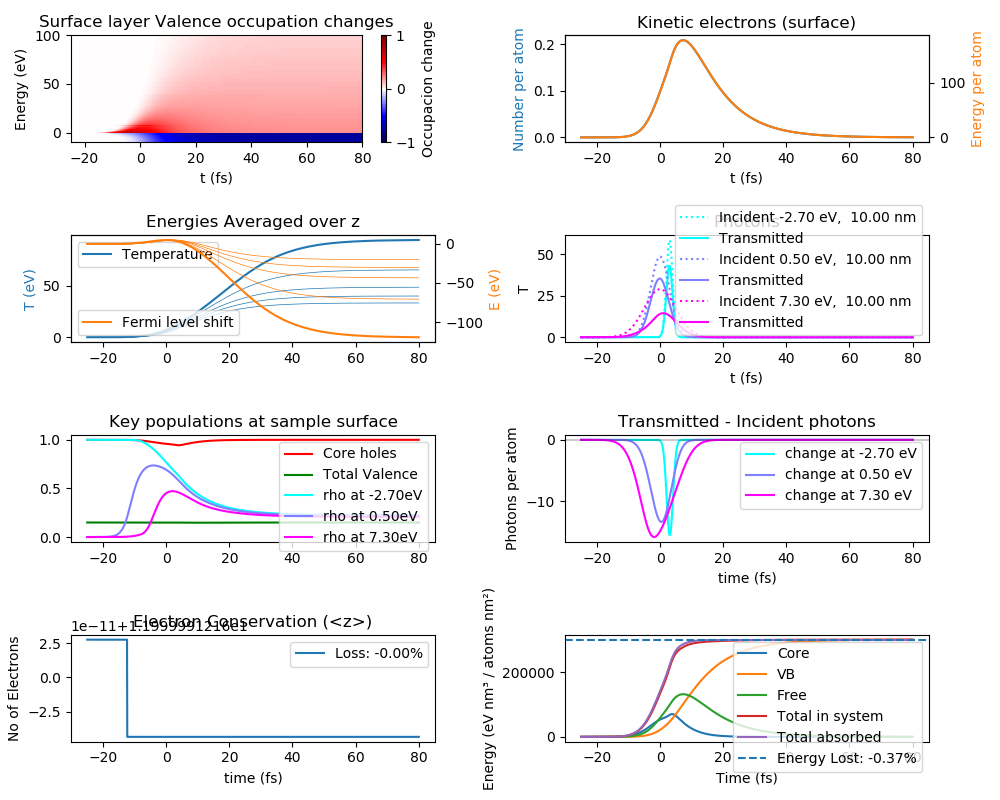

Done
Transmission:  [73.44506325 70.51740314 43.77488862]  %
CPU times: user 8min 34s, sys: 15.3 s, total: 8min 49s
Wall time: 8min 35s


In [7]:
%%time
sim_options = dict(t_span=[-25, 80],
                   method='RK45',
                   rtol=1e-5, atol=1e-8, 
                   plot = True,
                   return_full_solution = True)

incident, transmitted, sol = sim.run(**sim_options)

print('Transmission: ', 100 * transmitted/incident, ' %')


<IPython.core.display.Javascript object>


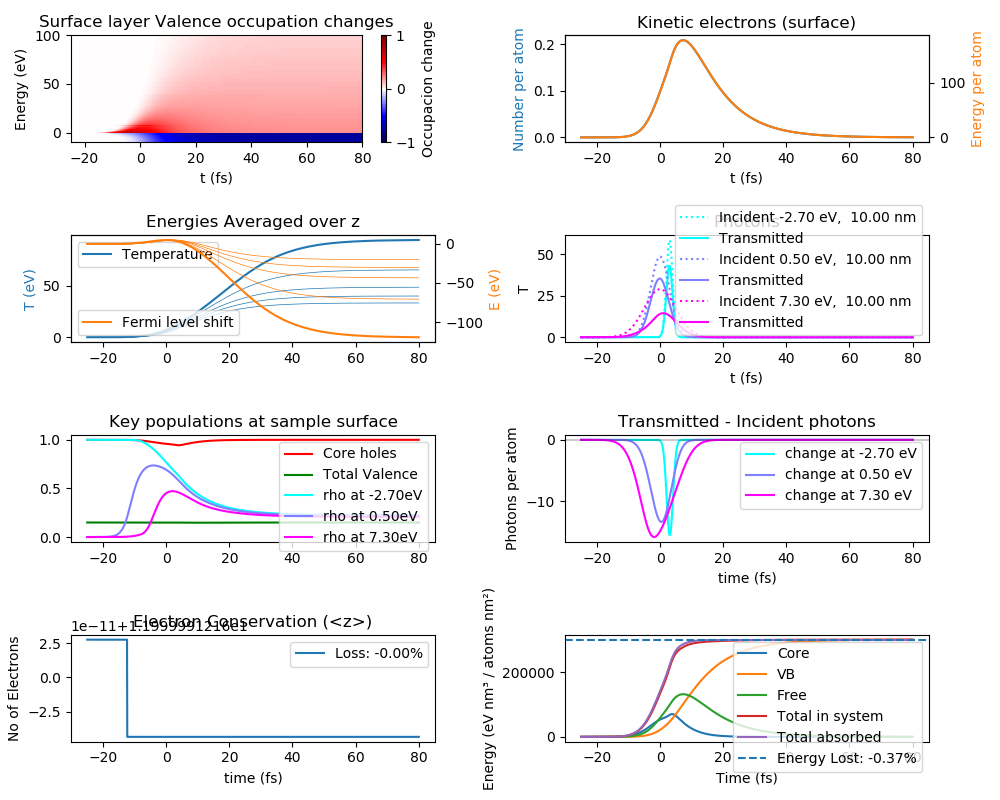

Done


In [8]:

sim.plot_results(sol, sol.photon_densities)

In [9]:
self = sim
inner_energies = np.zeros((len(sol.t),self.par.Nsteps_z))
for it, t in enumerate(sol.t):
    for iz in range(self.par.Nsteps_z):
        U = np.sum(sol.rho_j[iz, :, it] * self.par.E_j)
        R = sol.R_VB[iz, it]
        T, mu_chem = self.par.FermiSolver.solve(U, R)
        if np.isnan(T):
            T, mu_chem = self.par.FermiSolver.save_lookup_Tmu_from_UR(U, R)
        # if self.DEBUG and (iz==0):
        #    print(U,R,'->',T, mu_chem)
        sol.temperatures[it, iz], sol.chemical_potentials[it, iz] = (T, mu_chem)
        inner_energies[it,iz] = U # This is needed later to check the energy conservation

In [10]:

## Integrat energy for each timestepsol.chemical_potentials+
absorbed_energy_dt = np.sum((sol.photon_densities[0]-sol.photon_densities[-1]).T*(self.par.E_i+self.par.E_f),1)
absorbed_energy = np.array([np.trapz(absorbed_energy_dt[:i],sol.t[:i]) for i in range(len(absorbed_energy_dt))])
factor = self.par.atomic_density * self.par.zstepsize # From energy per atom to energy per nm²
total_free = np.sum(sol.E_free[:,:],0) * factor#*1.01
#total_free_simple = np.sum(sol.R_free[:,:]*(self.par.E_f),0) * factor
total_inner = (np.sum(inner_energies[:,:],1)-np.sum(inner_energies[0,:])) * factor#*0.9
#total_inner = total_inner - total_inner[0]
total_core = np.sum((self.par.M_core- sol.core[:,:])*self.par.E_f,0) * factor#*1.13
#total_core = np.sum(self.par.M_core * (self.par.M_core/sol.core[:,:])*self.par.E_f,0) * factor

total_energies = total_free + total_inner + total_core
#total_energies_simple = total_free_simple + total_inner + total_core


<IPython.core.display.Javascript object>


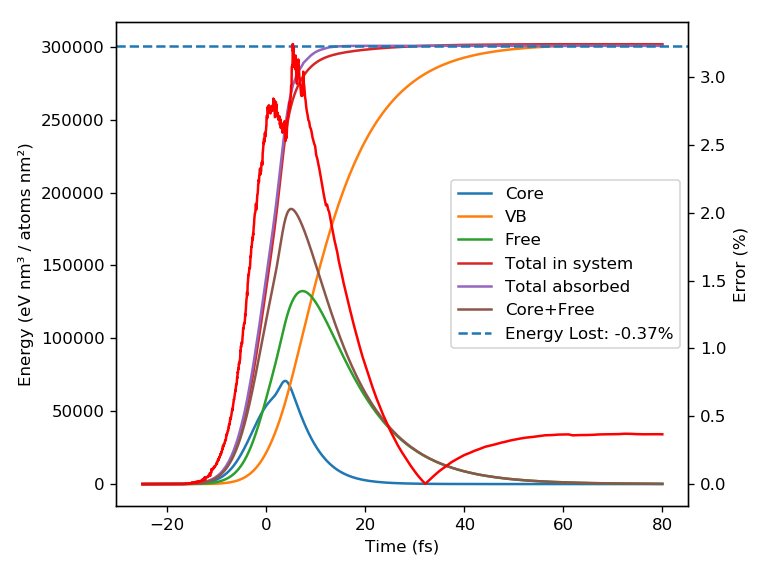

Done


In [11]:

plt.figure()
ax1 = plt.gca()
plt.plot(sol.t, total_core, label = 'Core')
plt.plot(sol.t, total_inner, label = 'VB')
plt.plot(sol.t, total_free, label = 'Free')
#plt.plot(sol.t, total_free_simple, label = 'Free simple')
plt.plot(sol.t, total_energies, label = 'Total in system')
#plt.plot(sol.t, total_energies_simple, label = 'Total in system simple')
plt.plot(sol.t, absorbed_energy, label = 'Total absorbed')
plt.plot(sol.t, total_free+total_core, label = 'Core+Free')



plt.axhline(absorbed_energy[-1], ls='--', label=f'Energy Lost: {100*(absorbed_energy[-1]-total_energies[-1])/absorbed_energy[-1]:.2f}%')
plt.legend()

plt.xlabel('Time (fs)')
plt.ylabel('Energy (eV nm³ / atoms nm²)')

ax2 = ax1.twinx()
err = np.abs(absorbed_energy-total_energies)/np.max(absorbed_energy)
#err[absorbed_energy< 1e-2*np.max(absorbed_energy)]=0
ax2.plot(sol.t, 100*err,  color='red')
ax2.set_ylabel('Error (%)')

plt.tight_layout()
plt.show()
#plt.pause(20)

print('Done')

<IPython.core.display.Javascript object>


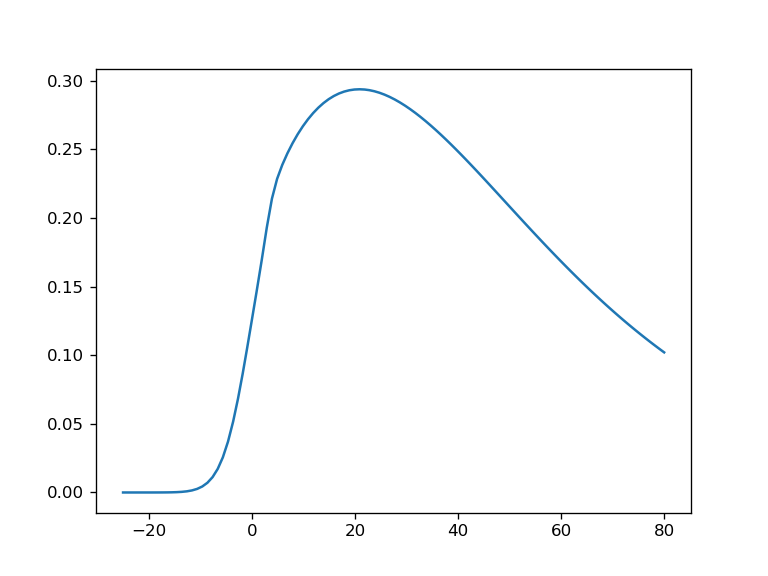

In [15]:
plt.figure()
plt.plot(sol.t, sol.R_free[0])

<IPython.core.display.Javascript object>


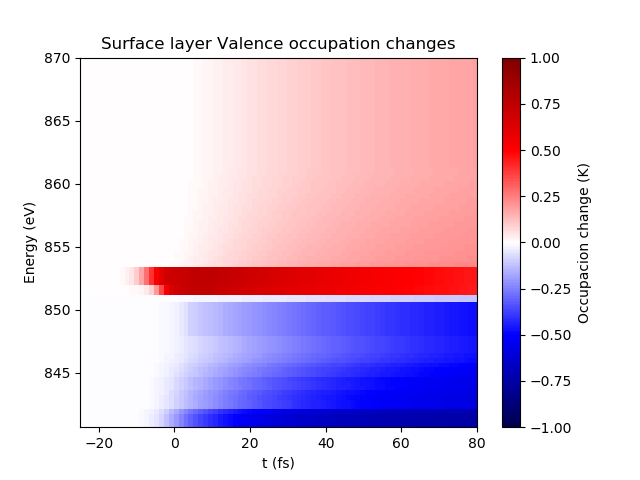

(840.7, 870)

In [13]:
plt.figure()
plt.pcolormesh(sol.t, PAR.E_j +PAR.E_f,
               (sol.rho_j[0]-np.outer(PAR.rho_j_0,np.ones(sol.t.shape)))/np.outer(PAR.m_j,np.ones(sol.t.shape)),
               cmap = plt.cm.seismic, vmin = -1, vmax = 1, shading = 'nearest')#
plt.colorbar(label = 'Occupacion change (K)')
plt.xlabel('t (fs)')
plt.ylabel('Energy (eV)')
plt.title('Surface layer Valence occupation changes')
plt.ylim(None, 870)

<IPython.core.display.Javascript object>


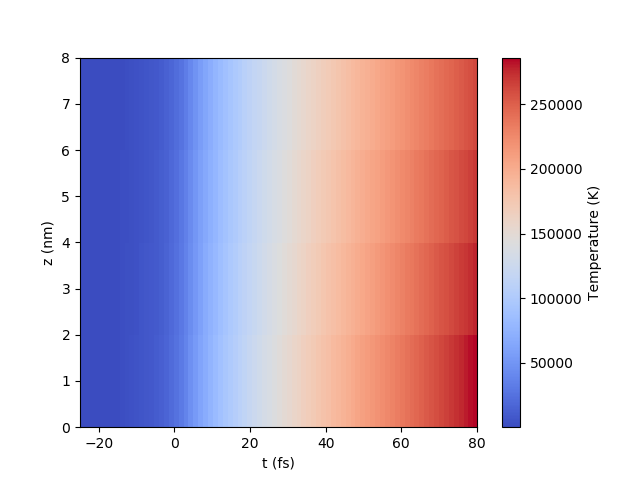

Text(0, 0.5, 'z (nm)')

In [14]:
plt.figure()
plt.pcolormesh(sol.t, PAR.zaxis, sol.temperatures.T, cmap = plt.cm.coolwarm)
plt.colorbar(label = 'Temperature (K)')
plt.xlabel('t (fs)')
plt.ylabel('z (nm)')

<IPython.core.display.Javascript object>


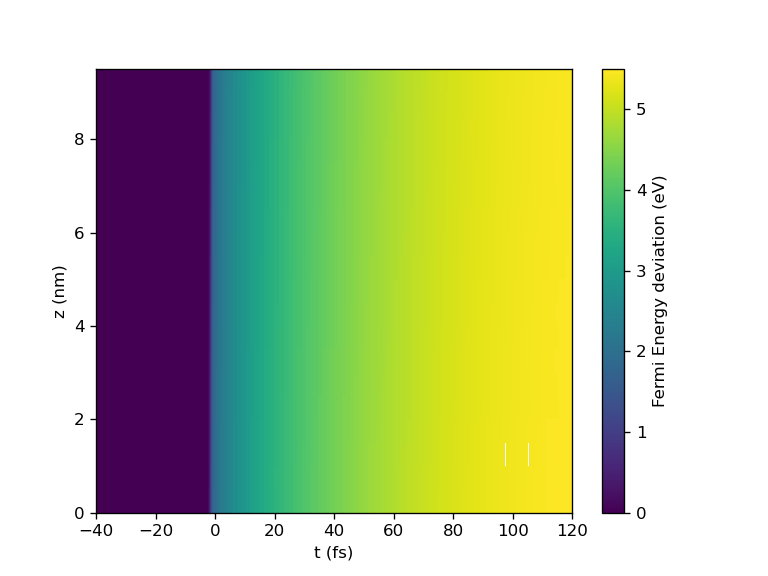

/tmp/ipykernel_186854/203480434.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(sol.t, PAR.zaxis, sol.fermi_energies.T)


Text(0, 0.5, 'z (nm)')

In [35]:
plt.figure()
plt.pcolormesh(sol.t, PAR.zaxis, sol.fermi_energies.T)
plt.colorbar(label = 'Fermi Energy deviation (eV)')
plt.xlabel('t (fs)')
plt.ylabel('z (nm)')

<IPython.core.display.Javascript object>


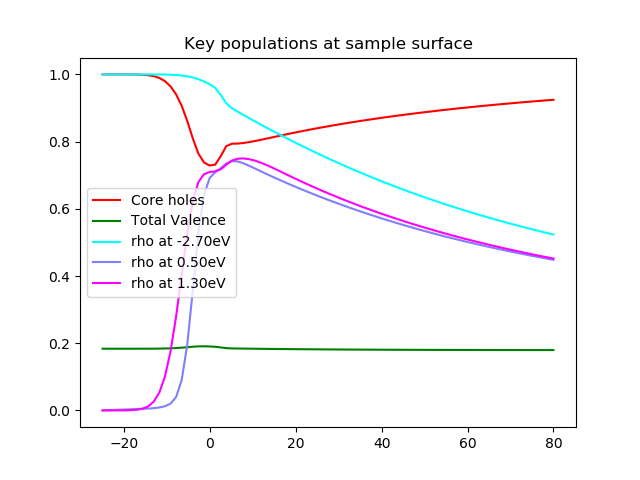

In [15]:
plt.figure()
plt.title('Key populations at sample surface')
plt.plot(sol.t,sol.core[0]/PAR.M_core, c='red', label = 'Core holes')
plt.plot(sol.t,(sol.R_VB[0])/PAR.M_VB, c='green',label = 'Total Valence')
cols = plt.cm.cool(np.linspace(0,1,PAR.N_photens))
for iE,E in enumerate(PAR.E_i):
    plt.plot(sol.t,sol.rho_j[0,PAR.resonant,:][iE].T/PAR.m_j[PAR.resonant][iE],c = cols[iE], label = f'rho at {E:.2f}eV')
plt.legend()


<IPython.core.display.Javascript object>


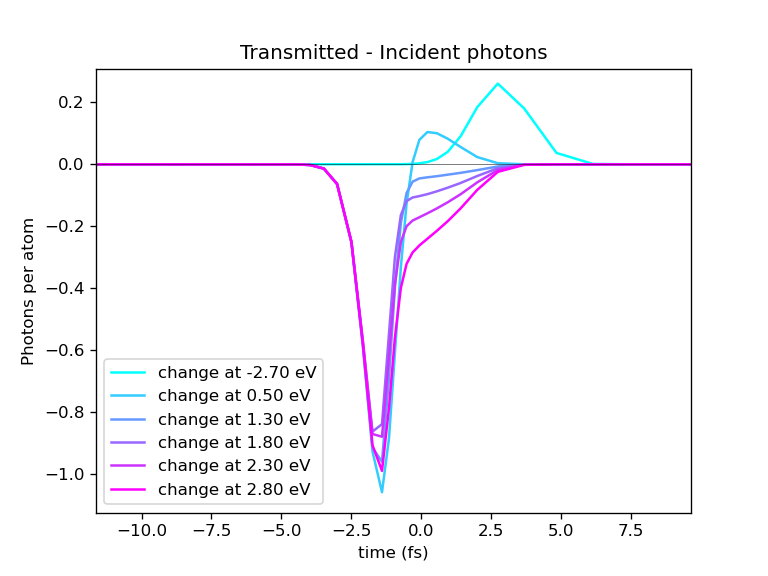

Text(0, 0.5, 'Photons per atom')

In [13]:
T = (sol.photon_densities[-1]-sol.photon_densities[0])#/np.max(sol.photon_densities[0],1)

plt.figure()
for iE,E in enumerate(PAR.E_i):
    plt.plot(sol.t,T[iE],c = cols[iE], label = f'change at {E:.2f} eV')
plt.axhline(c='k', lw = 0.3)
plt.legend()

plt.title('Transmitted - Incident photons')
plt.xlabel('time (fs)')
plt.ylabel('Photons per atom')

In [24]:
PAR.M_core

2

<IPython.core.display.Javascript object>


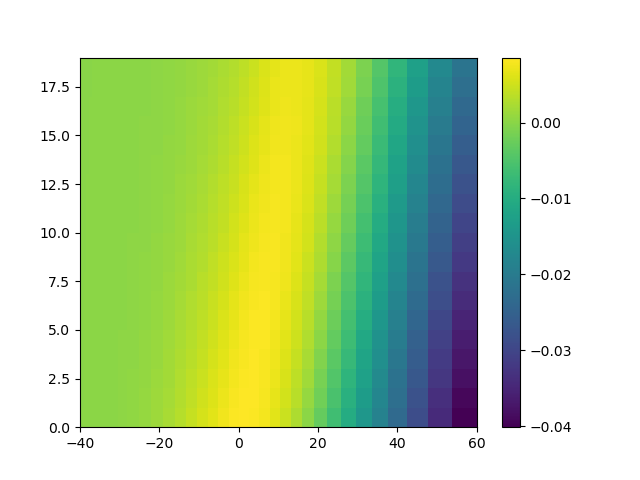

/tmp/ipykernel_121456/52012410.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(sol.t, PAR.zaxis, (sol.R_VB-PAR.R_VB_0)/PAR.M_VB)


In [34]:
plt.figure()
plt.pcolormesh(sol.t, PAR.zaxis, (sol.R_VB-PAR.R_VB_0)/PAR.M_VB)
plt.colorbar()

In [21]:
sol.t.shape

(40,)

In [77]:
def make_valence_energy_axis(self, N_j: int, min=-6, finemax=10, max=50):
        """
        Creates an energy axis for the valence band, namely
            self.E_j
        and its edgepoints
            self.enax_j_edges
        Energies are relative to the fermi-level. 3/4 of all points fall into the range (min, finemax)
        Makes sure that the energies E_i correspond to a point in E_j and
        drops the closest points to keep the number N_j.
        :param N_j:
        :param min:
        :param finemax:
        :param max:
        :return:
        """
        N_j_fine = int(N_j * 3 / 4)
        N_j_coarse = int(N_j - N_j_fine)

        def fill_biggest_gap(pointlist):
            """
            This function takes a list of points and appends a point in the middle of the biggest gap
            """
            pointlist = np.array(np.sort(pointlist))
            gaps = pointlist[1:]-pointlist[:-1]
            biggest_gap_index = np.argsort(gaps)[-1]
            biggest_gap = gaps[biggest_gap_index]
            list_before = pointlist[:biggest_gap_index+1]
            new_value = pointlist[biggest_gap_index] + 0.5*biggest_gap
            list_after = pointlist[biggest_gap_index+1:]
            return np.concatenate((list_before, [new_value,], list_after))
        
        # The energies E_i and 0 must be in the axis
        enax_j_fine = [min, 0, finemax]+list(self.E_i[self.E_i<=finemax])
        # Fill up the gaps
        while len(enax_j_fine)<N_j_fine:
            enax_j_fine = fill_biggest_gap(enax_j_fine)
        
        dE = np.mean(enax_j_fine[1:]-enax_j_fine[:-1])
        #The same for the coarse part
        enax_j_coarse = [finemax+dE, max]+list(self.E_i[self.E_i>finemax])
        while len(enax_j_coarse)<N_j_coarse:
            enax_j_coarse = fill_biggest_gap(enax_j_coarse)
            
        enax_j = np.concatenate((enax_j_fine, enax_j_coarse))

        if not len(enax_j) == N_j:
            warnings.warn(
                'Energy Axis turned out longer or shorter than planned. What went wrong?')
            self.N_j = len(enax_j)
            
        def edgepoints(middles):
            """ Opposite of midpoints """
            edges = np.empty(middles.shape[0] + 1)
            edges[1:-1] = (middles[1:] + middles[:-1]) / 2
            edges[0] = middles[0] - (middles[1] - middles[0]) / 2
            edges[-1] = middles[-1] + (middles[-1] - middles[-2]) / 2
            return edges

        return enax_j, edgepoints(enax_j)

In [55]:
sim.plot_derivatives?

<IPython.core.display.Javascript object>


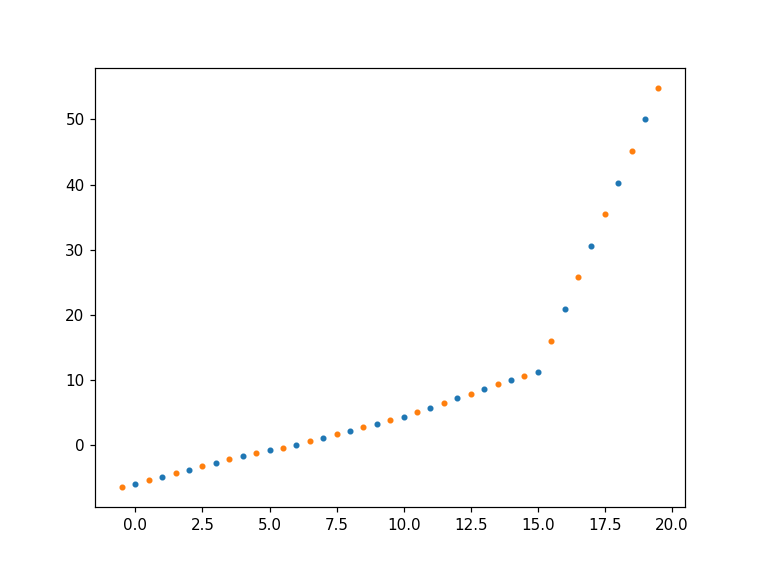

In [82]:
enax, enax_edges = make_valence_energy_axis(PAR, 20, min=-6, finemax=10, max=50)
plt.figure()
plt.plot(np.arange(len(enax)),enax,'.')
plt.plot(np.arange(len(enax_edges))-0.5,enax_edges,'.')